# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_ID12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write justifications for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
**Please keep the whole code in a single notebook**. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 10 March, 2025, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the California Department of Forestry and Fire Protection [(CAL FIRE)](https://www.fire.ca.gov). CAL FIRE provides fire prevention and protection, emergency response, and natural resource protection services in the USA. 

In this analysis, we focus on using the data collected by CAL FIRE to build a data analytics solution for structure damage risk prediction. 
The full database represents structures impacted to different extents by wildland fire. The dataset we work with is a sample of the public data released by CAL FIRE, where the outcome for the target feature Damage is known and is only in the category "No Damage" or "Destroyed (>50%)").
https://data.ca.gov/dataset/cal-fire-damage-inspection-dins-data

Each student will work with a different subset of the data. The CSV file is named using the format: **cal-wildfires-[your-student-number].csv**, e.g., **cal-wildfires-12345.csv** is the data file for a student with number 12345. You need to work with the CSV file corresponding to your student number, available from this [[link]](https://drive.google.com/drive/folders/1pJYeBIHYj-2lFTGYSxHym3l_85jkJAyT?usp=share_link). There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B (see first lecture slides for marks to grade mapping scale).


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them (max 5 pages of text). Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps and analysis with code, while the report is a summary of findings and contains no Python code.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Analyse all features and mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [7]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from datetime import datetime

import re

from geopy.distance import geodesic

In [8]:
df = pd.read_csv('cal-wildfires-24220492.csv', keep_default_na=True, skipinitialspace=True, delimiter=",", encoding="Windows-1252")

df.shape

(10000, 33)

In [9]:
pd.set_option("display.precision", 0)
pd.set_option('display.float_format', '{:.0f}'.format)


Displaying the head of the dataset

In [10]:
df.head(5)

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,State,Zip Code,* CAL FIRE Unit,County,...,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
0,40861,Destroyed (>50%),609,Bille,Road,Paradise Northwest B,CA,NaN,BTU,Butte,...,No Deck/Porch,Combustible,No Fence,NaN,<30',82695,1956,609 BILLE RD PARADISE CA 95969,40,-122
1,124543,No Damage,1148,Las Pulgas,Road,Pacific Palisades,CA,90272,LAC,Los Angeles,...,No Deck/Porch,No Patio Cover/Carport,Non Combustible,NaN,NaN,403821,1960,"1148 LAS PULGAS RD, PACIFIC PALISADES, CA 90272",34,-119
2,129444,Destroyed (>50%),1101,Chautauqua,Boulevard,Pacific Palisades,CA,90272,LAC,Los Angeles,...,Masonry/Concrete,Combustible,No Fence,NaN,NaN,2459718,2016,"1101 CHAUTAUQUA BLVD, PACIFIC PALISADES, CA 90272",34,-119
3,6617,Destroyed (>50%),42679,Grey Squirrel,Lane,NaN,CA,0,FKU,Fresno,...,Wood,No Patio Cover/Carport,No Fence,NaN,NaN,30827,1961,42679 GREY SQUIRREL LN AUBERRY CA 93602,37,-119
4,84711,Destroyed (>50%),202,Crescent,Street,Greenville,CA,95947,LMU,Plumas,...,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,88261,NaN,202 CRESCENT ST GREENVILLE CA 95947,40,-121


Displaying the tail of the dataset

In [11]:
df.tail(5)

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,State,Zip Code,* CAL FIRE Unit,County,...,* Deck/Porch Elevated,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Assessed Improved Value (parcel),Year Built (parcel),Site Address (parcel),Latitude,Longitude
9995,20568,No Damage,0,Rana creek,Other,NaN,CA,NaN,BEU,Monterey,...,No Deck/Porch,Combustible,No Fence,>30,NaN,34056,1930,GONZALES CA 93926,36,-122
9996,59723,Destroyed (>50%),12725,Tomki,Road,Unincorporated,CA,0,MEU,Mendocino,...,NaN,NaN,NaN,NaN,NaN,270000,0,12725 TOMKI RD,39,-123
9997,90351,Destroyed (>50%),33410,Valerio,Road,Hemet,CA,92544,RRU,Riverside,...,No Deck/Porch,No Patio Cover/Carport,No Fence,NaN,NaN,140743,2005,33410 VALERIO RD HEMET 92544 CA,34,-117
9998,57949,Destroyed (>50%),53,Ursuline,Road,Unincorporated,CA,0,LNU,Sonoma,...,NaN,NaN,NaN,NaN,NaN,279593,NaN,53 URSULINE RD SANTA ROSA CA 95403,38,-123
9999,34847,Destroyed (>50%),4008,Neal,Road,Paradise Central Southwest A,CA,NaN,BTU,Butte,...,Wood,Combustible,Non Combustible,NaN,NaN,115000,0,4008 NEAL RD PARADISE CA 95969,40,-122


Checking the data types and null value counts

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   OBJECTID                                                      10000 non-null  int64  
 1   * Damage                                                      10000 non-null  object 
 2   * Street Number                                               9640 non-null   float64
 3   * Street Name                                                 9550 non-null   object 
 4   * Street Type (e.g. road, drive, lane, etc.)                  8884 non-null   object 
 5   * City                                                        7562 non-null   object 
 6   State                                                         10000 non-null  object 
 7   Zip Code                                                      5947 n

Cleaning the column names

In [13]:
df.columns = df.columns.str.replace("* ", "")
df.columns = df.columns.str.replace("# ", "")
df.columns = df.columns.str.replace(" (parcel)", "")
df.columns = df.columns.str.replace(" (e.g. road, drive, lane, etc.)", "")
df.columns = df.columns.str.replace(" (if multi unit)", "")
df.columns

Index(['OBJECTID', 'Damage', 'Street Number', 'Street Name', 'Street Type',
       'City', 'State', 'Zip Code', 'CAL FIRE Unit', 'County', 'Community',
       'Incident Start Date', 'Hazard Type', 'Structure Defense Actions Taken',
       'Structure Type', 'Structure Category', 'Units in Structure',
       'Roof Construction', 'Eaves', 'Vent Screen', 'Exterior Siding',
       'Window Pane', 'Deck/Porch On Grade', 'Deck/Porch Elevated',
       'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
       'Assessed Improved Value', 'Year Built', 'Site Address', 'Latitude',
       'Longitude'],
      dtype='object')

In [14]:
#Taking the numeric values

numeric_columns = df.select_dtypes(['int64', 'float64']).columns
numeric_columns

Index(['OBJECTID', 'Street Number', 'Zip Code', 'Units in Structure',
       'Assessed Improved Value', 'Year Built', 'Latitude', 'Longitude'],
      dtype='object')

In [15]:
for i in numeric_columns:
    print(i, len(df[i].unique()))

OBJECTID 10000
Street Number 5597
Zip Code 147
Units in Structure 14
Assessed Improved Value 7562
Year Built 137
Latitude 9992
Longitude 9996


It doesnt makes sense to keep street number and zip code as a continous feature. Changing to categorical

Units in structure also has to be categorical feature.


In [16]:
df["Zip Code"] = df["Zip Code"].astype('object')
df["Street Number"] = df["Street Number"].astype('object')
df["Units in Structure"] = df["Units in Structure"].astype('object')
df["Incident Start Date"] = pd.to_datetime(df["Incident Start Date"])

df.dtypes

C:\Users\luthe\AppData\Local\Temp\ipykernel_6176\2444193956.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Incident Start Date"] = pd.to_datetime(df["Incident Start Date"])


OBJECTID                                                                 int64
Damage                                                                  object
Street Number                                                           object
Street Name                                                             object
Street Type                                                             object
City                                                                    object
State                                                                   object
Zip Code                                                                object
CAL FIRE Unit                                                           object
County                                                                  object
Community                                                               object
Incident Start Date                                             datetime64[ns]
Hazard Type                                         

In [17]:
object_columns = df.select_dtypes(['object']).columns
object_columns

Index(['Damage', 'Street Number', 'Street Name', 'Street Type', 'City',
       'State', 'Zip Code', 'CAL FIRE Unit', 'County', 'Community',
       'Hazard Type', 'Structure Defense Actions Taken', 'Structure Type',
       'Structure Category', 'Units in Structure', 'Roof Construction',
       'Eaves', 'Vent Screen', 'Exterior Siding', 'Window Pane',
       'Deck/Porch On Grade', 'Deck/Porch Elevated',
       'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
       'Site Address'],
      dtype='object')

In [18]:
for column in object_columns:
    df[column] = df[column].astype('category')
df.dtypes

OBJECTID                                                                 int64
Damage                                                                category
Street Number                                                         category
Street Name                                                           category
Street Type                                                           category
City                                                                  category
State                                                                 category
Zip Code                                                              category
CAL FIRE Unit                                                         category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Hazard Type                                         

In [19]:
df["OBJECTID"] = df["OBJECTID"].astype('object')
df.dtypes

OBJECTID                                                                object
Damage                                                                category
Street Number                                                         category
Street Name                                                           category
Street Type                                                           category
City                                                                  category
State                                                                 category
Zip Code                                                              category
CAL FIRE Unit                                                         category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Hazard Type                                         

In [20]:
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64[ns]']).columns
numeric_columns

Index(['Incident Start Date', 'Assessed Improved Value', 'Year Built',
       'Latitude', 'Longitude'],
      dtype='object')

In [21]:
category_columns = df.select_dtypes(['category']).columns
category_columns

Index(['Damage', 'Street Number', 'Street Name', 'Street Type', 'City',
       'State', 'Zip Code', 'CAL FIRE Unit', 'County', 'Community',
       'Hazard Type', 'Structure Defense Actions Taken', 'Structure Type',
       'Structure Category', 'Units in Structure', 'Roof Construction',
       'Eaves', 'Vent Screen', 'Exterior Siding', 'Window Pane',
       'Deck/Porch On Grade', 'Deck/Porch Elevated',
       'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
       'Site Address'],
      dtype='object')

Checking duplicate rows

In [22]:
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


Checking duplicate columns

In [23]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


Since there are no duplicate rows and columns, we can move on to making the statistical tables for the continous and categorical feature

In [24]:
df.to_csv("cal-wildfires-24220492-round1-cleaned.csv", index=False)

# Next we finalise the data quality report and add columns on %missing and cardinality of features.

In [25]:
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64[ns]']).columns
numeric_columns

Index(['Incident Start Date', 'Assessed Improved Value', 'Year Built',
       'Latitude', 'Longitude'],
      dtype='object')

In [26]:
df[numeric_columns].describe().T

,count,mean,min,25%,50%,75%,max,std
Incident Start Date,10000,2021-03-11 14:38:56.215699712,2013-08-07 00:00:00,2018-11-08 00:00:00,2020-09-07 00:00:00,2024-09-09 00:00:00,2025-01-09 00:50:35,NaN
Assessed Improved Value,9490,692676,0,68760,160000,337982,387443017,7401385
Year Built,7598,1740,0,1939,1961,1982,2022,627
Latitude,10000,37,33,34,38,40,42,2
Longitude,10000,-121,-124,-122,-121,-119,-117,2


In [27]:
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
Incident Start Date,0
Assessed Improved Value,5
Year Built,24
Latitude,0
Longitude,0


In [28]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Incident Start Date,151
Assessed Improved Value,7561
Year Built,136
Latitude,9992
Longitude,9996


In [29]:
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.

df_numeric_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card
Incident Start Date,10000,2021-03-11 14:38:56.215699712,2013-08-07 00:00:00,2018-11-08 00:00:00,2020-09-07 00:00:00,2024-09-09 00:00:00,2025-01-09 00:50:35,NaN,0,151
Assessed Improved Value,9490,692676,0,68760,160000,337982,387443017,7401385,5,7561
Year Built,7598,1740,0,1939,1961,1982,2022,627,24,136
Latitude,10000,37,33,34,38,40,42,2,0,9992
Longitude,10000,-121,-124,-122,-121,-119,-117,2,0,9996


In [30]:
df_numeric_columns_data_quality_report_table.to_csv("continuous descriptive statistics.csv")

# First look analysis of continous features

Looking at the stats table for continous features, we can see few issues. 

1. The feature "Units in structure" has very large amount of missing values.
2. Year built has some missing values and most importantly, has minimum value as "0" which a clear error


# Same steps for preparing the data quality report table for the categorical features

We need to remove certain stuff from our analysis. Make those feature as objects so they wont bother with our plots.

In [31]:
category_columns = df.select_dtypes("category").columns
category_columns

Index(['Damage', 'Street Number', 'Street Name', 'Street Type', 'City',
       'State', 'Zip Code', 'CAL FIRE Unit', 'County', 'Community',
       'Hazard Type', 'Structure Defense Actions Taken', 'Structure Type',
       'Structure Category', 'Units in Structure', 'Roof Construction',
       'Eaves', 'Vent Screen', 'Exterior Siding', 'Window Pane',
       'Deck/Porch On Grade', 'Deck/Porch Elevated',
       'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
       'Site Address'],
      dtype='object')

In [32]:
df[category_columns].describe().T

,count,unique,top,freq
Damage,10000,2,Destroyed (>50%),5720
Street Number,9640,5596,0,547
Street Name,9550,4036,Pacific Coast,65
Street Type,8884,20,Road,3484
City,7562,256,Unincorporated,1272
State,10000,1,CA,10000
Zip Code,5947,146,0,1912
CAL FIRE Unit,10000,26,LAC,2517
County,9997,47,Los Angeles,2517
Community,4266,430,Paradise,632


In [33]:
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Damage,0
Street Number,4
Street Name,4
Street Type,11
City,24
State,0
Zip Code,41
CAL FIRE Unit,0
County,0
Community,57


In [34]:
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
Damage,2
Street Number,5596
Street Name,4036
Street Type,20
City,256
State,1
Zip Code,146
CAL FIRE Unit,26
County,47
Community,430


In [35]:
df_table_categ = df[category_columns].describe().T

df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_perc_missing, df_category_card], axis=1)

# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.

df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
Damage,10000,2,Destroyed (>50%),5720,0,2
Street Number,9640,5596,0,547,4,5596
Street Name,9550,4036,Pacific Coast,65,4,4036
Street Type,8884,20,Road,3484,11,20
City,7562,256,Unincorporated,1272,24,256
State,10000,1,CA,10000,0,1
Zip Code,5947,146,0,1912,41,146
CAL FIRE Unit,10000,26,LAC,2517,0,26
County,9997,47,Los Angeles,2517,0,47
Community,4266,430,Paradise,632,57,430


In [36]:
df_category_columns_data_quality_report_table.to_csv("categorical descriptive statistics.csv")

# First look analysis of categorical features

Look at our stats table for categorical data, We can see a number of issues mainly with missing values and the cardinality.
Few features have either, Very high cardinality which will affect our analysis or very low cardinality which is not useful at all. On top of that, some features have high amount of missing values. 

## Data Quality Report: Visualisations

In this section we plot histograms and boxplots for numeric features and barplots for categorical features. This is a visual approach to exploring the distribution of values for each feature.

array([[<Axes: title={'center': 'Incident Start Date'}>,
        <Axes: title={'center': 'Assessed Improved Value'}>],
       [<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

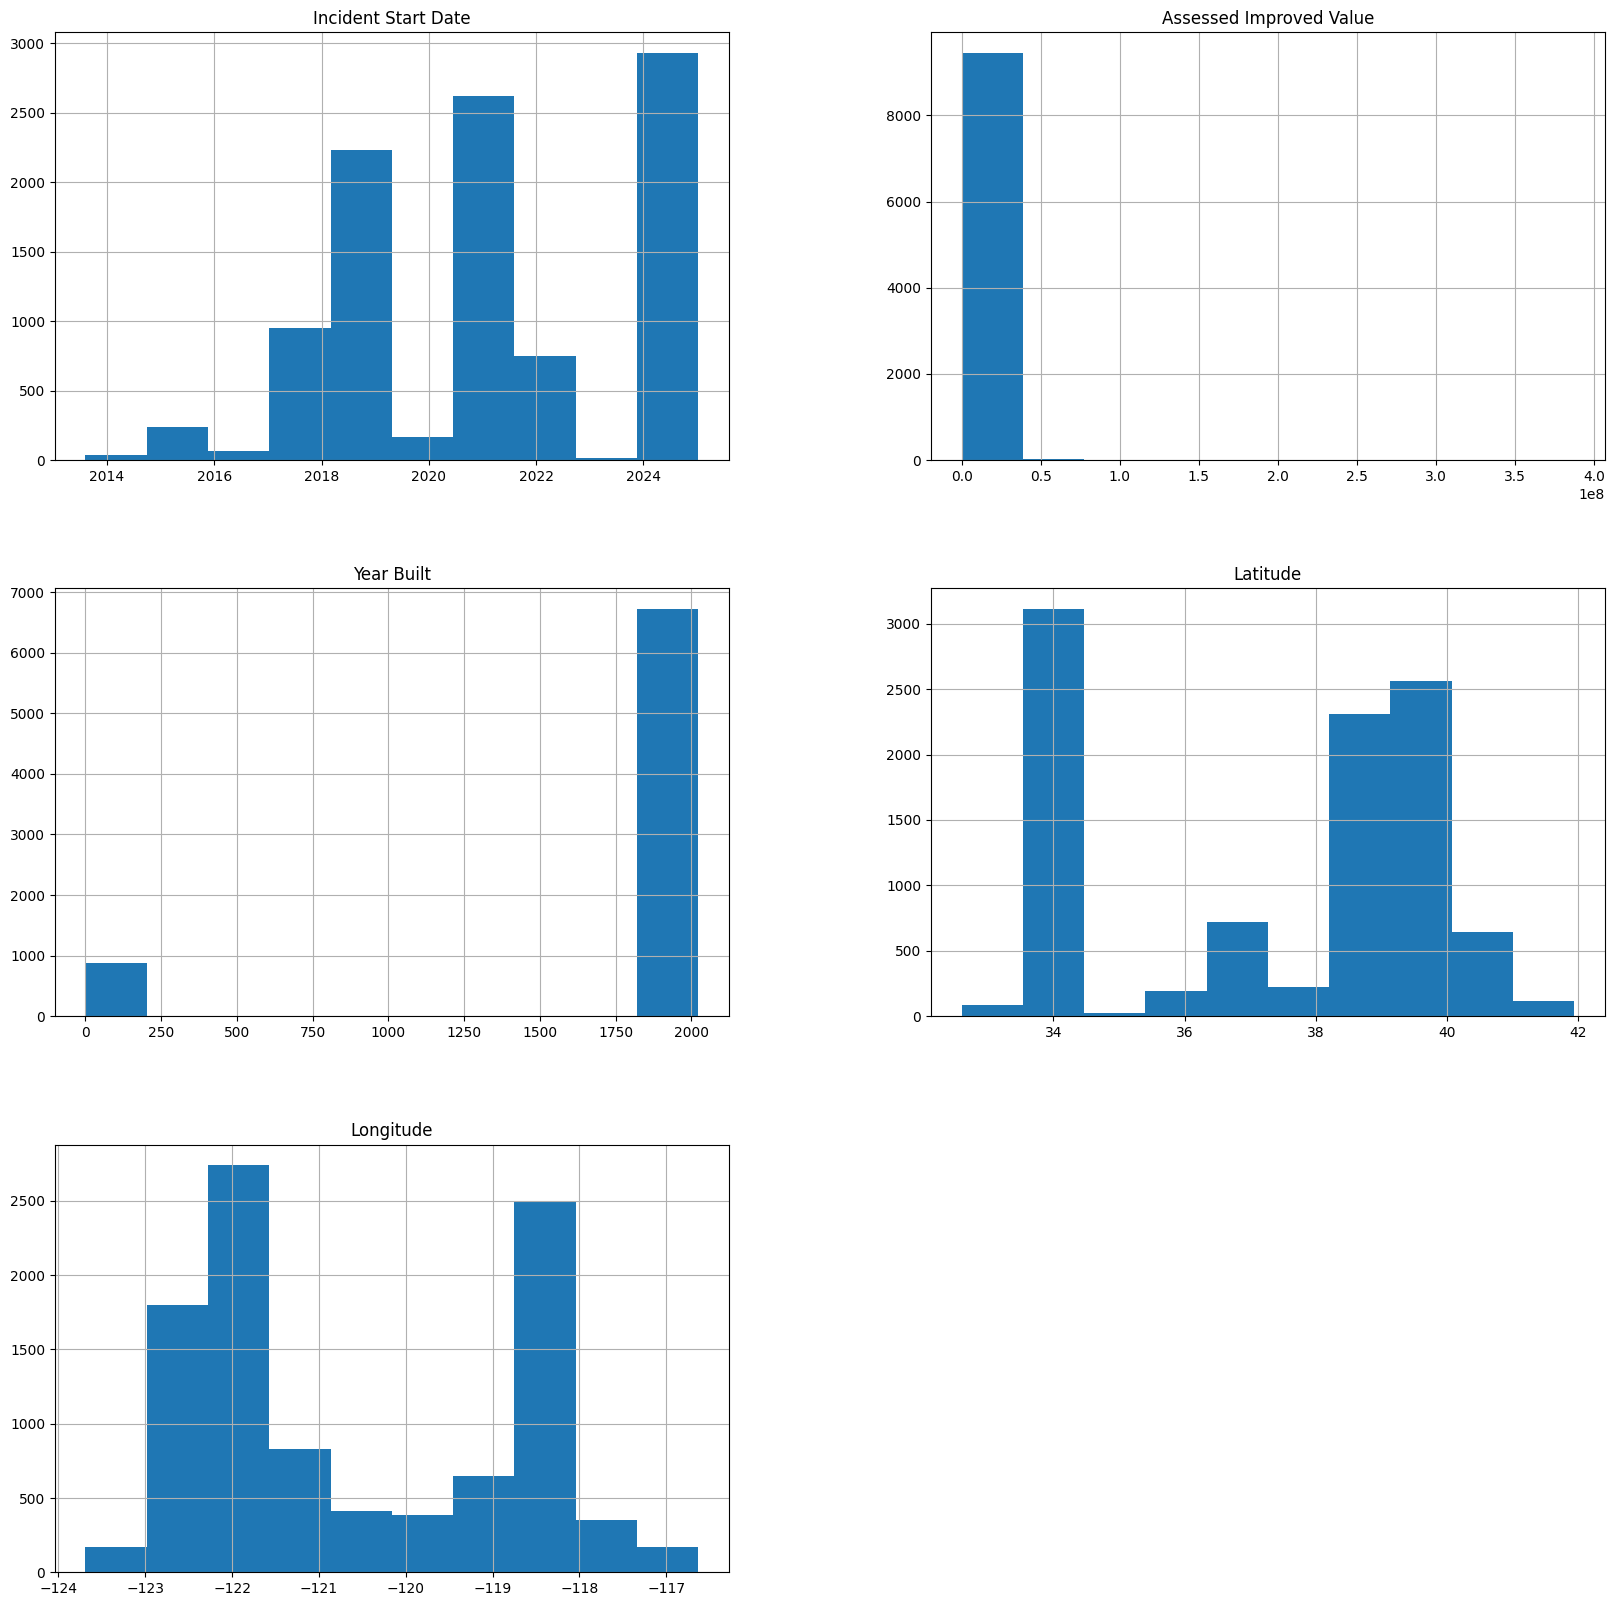

In [37]:
plt.figure()
df.hist(figsize=(20, 20))

# Plot analysis - Histograms of continous features

1. We can see Assessed improved value has many outliers.
2. Year built has some values that are 0.
3. We can see from the Incident start date plot that incidents only occur after few years.
4. Latitude and Longitude plots define the spread of incidents across the california.

Assessed Improved Value       Axes(0.125,0.653529;0.227941x0.226471)
Year Built                 Axes(0.398529,0.653529;0.227941x0.226471)
Latitude                   Axes(0.672059,0.653529;0.227941x0.226471)
Longitude                     Axes(0.125,0.381765;0.227941x0.226471)
dtype: object

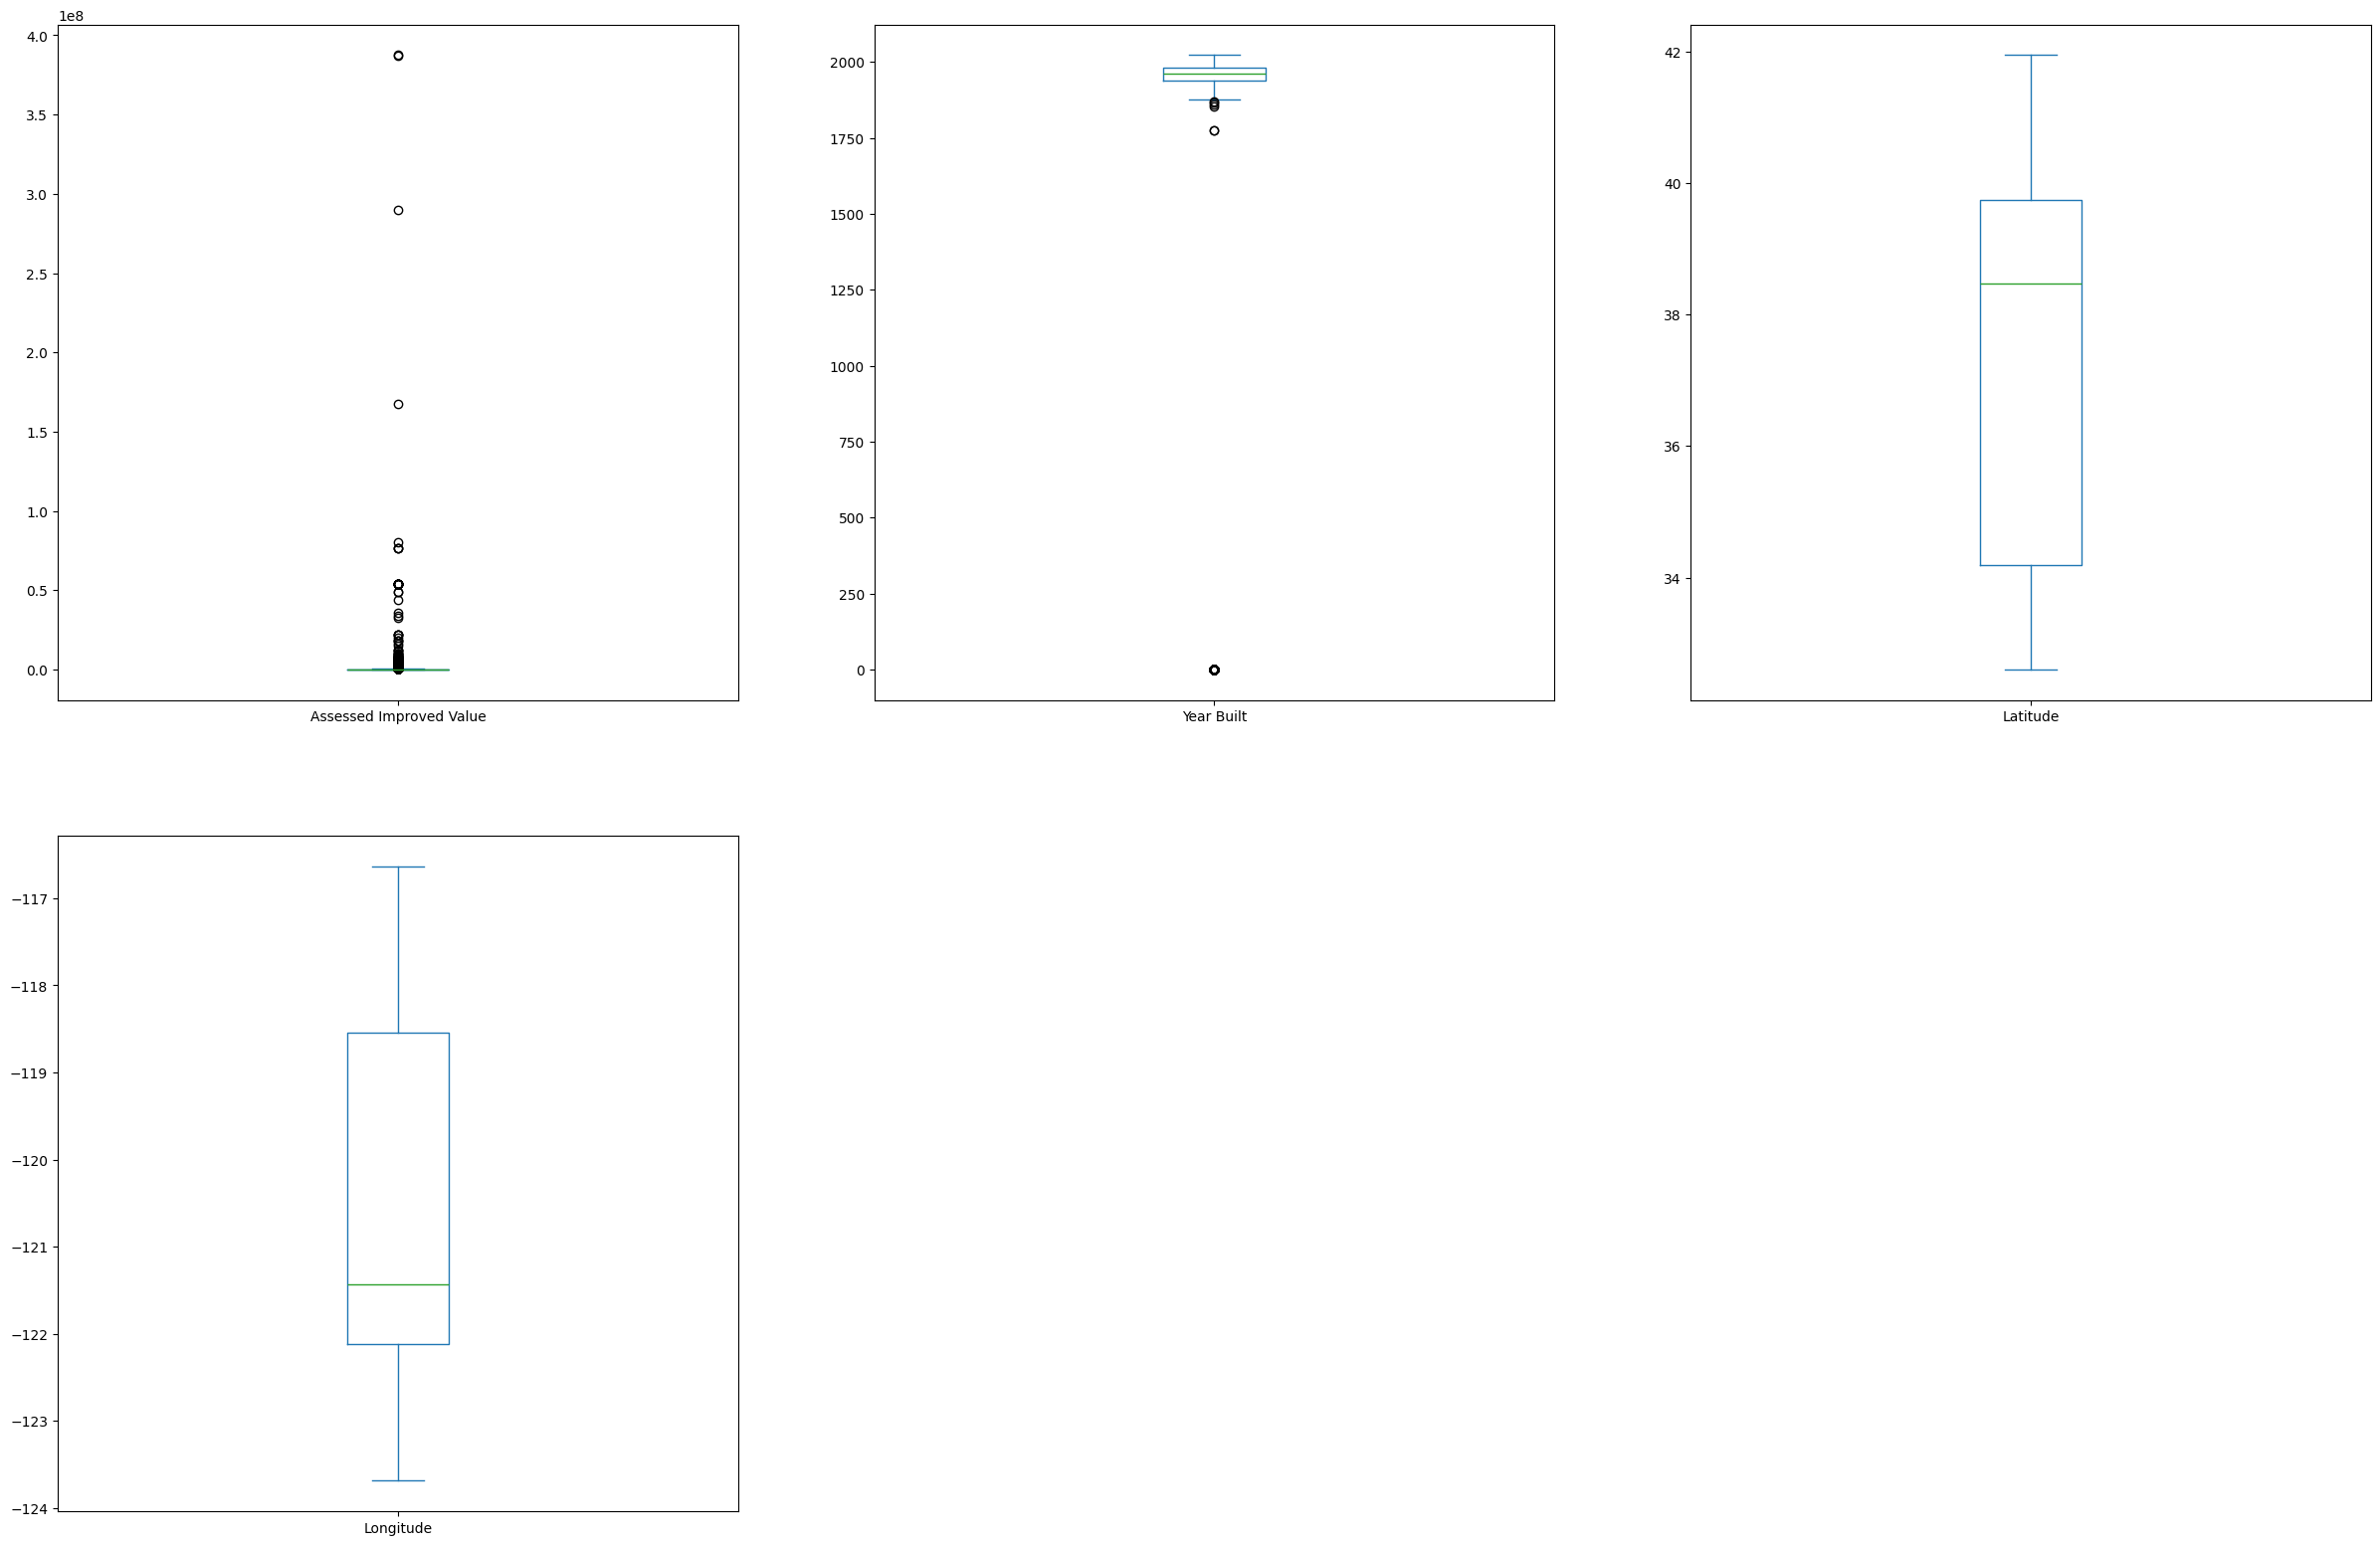

In [38]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)

# Plot analysis - Bar plots of continous features

1. We can see from Assessed improved value's bar plot that there may be significant outliers that we may have to deal with. We can also see value spread when we remove the outliers.
2. Again, similar to our observation from the plot, Year has few values that are 0, which must be dealt with.

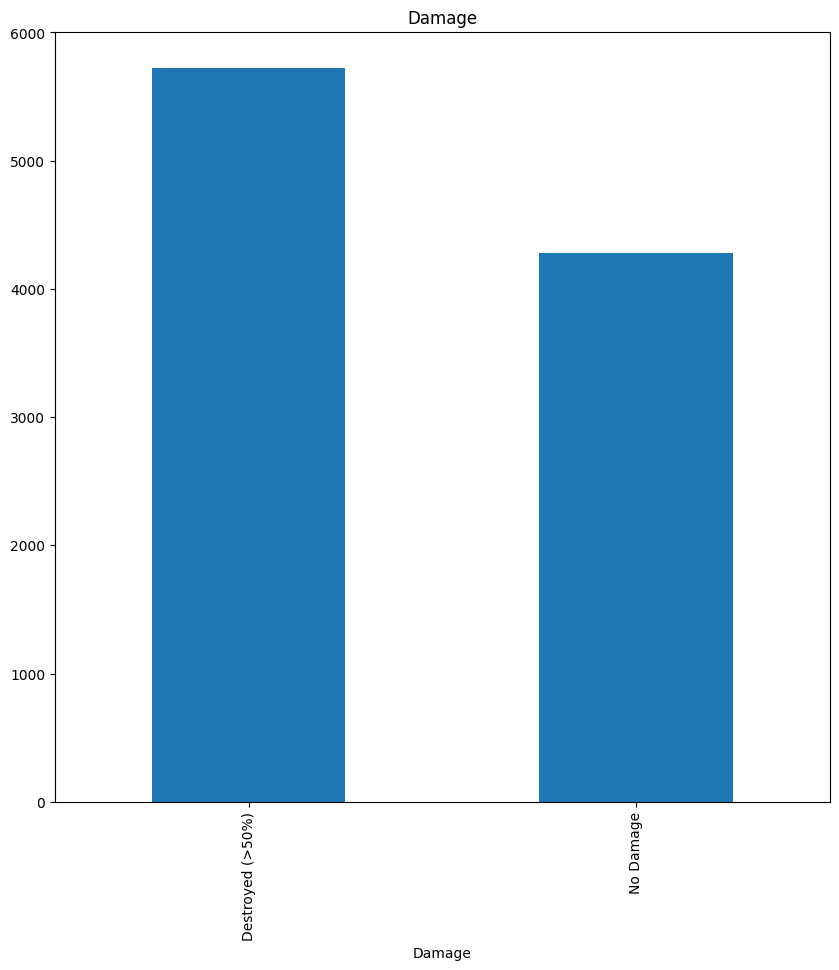

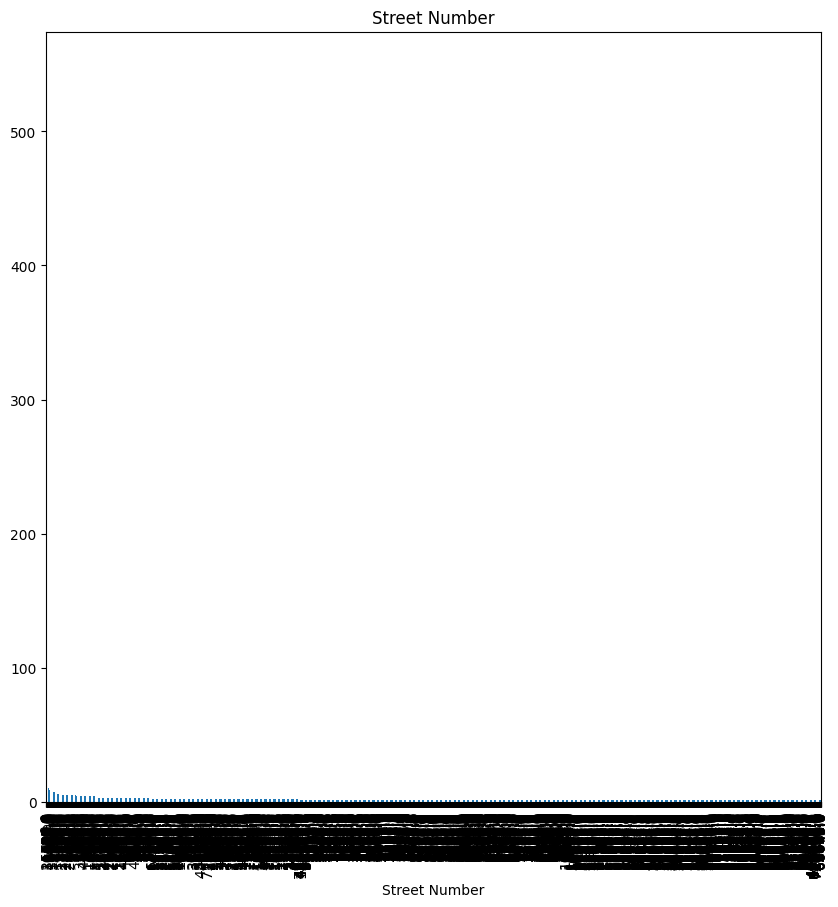

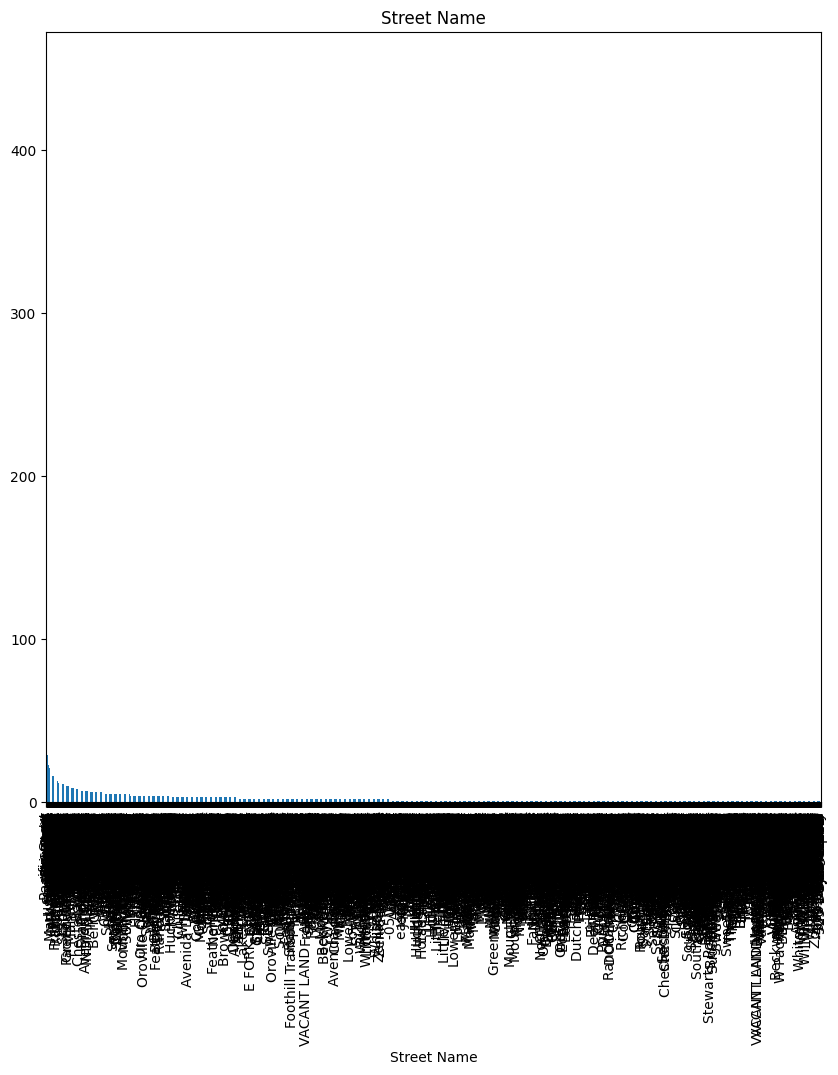

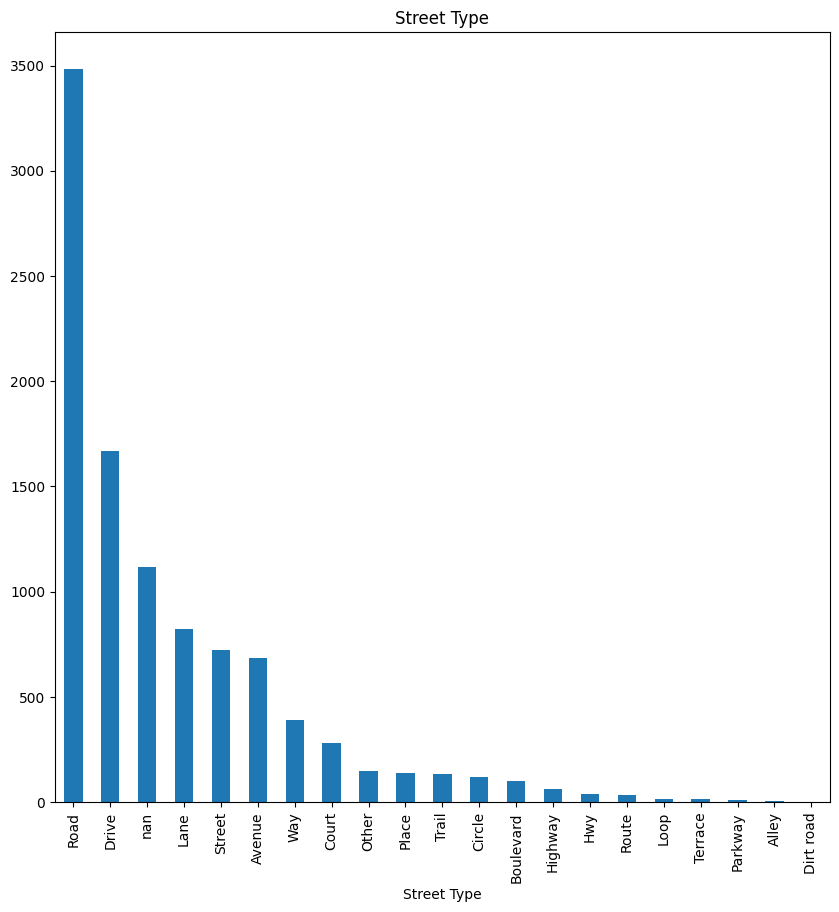

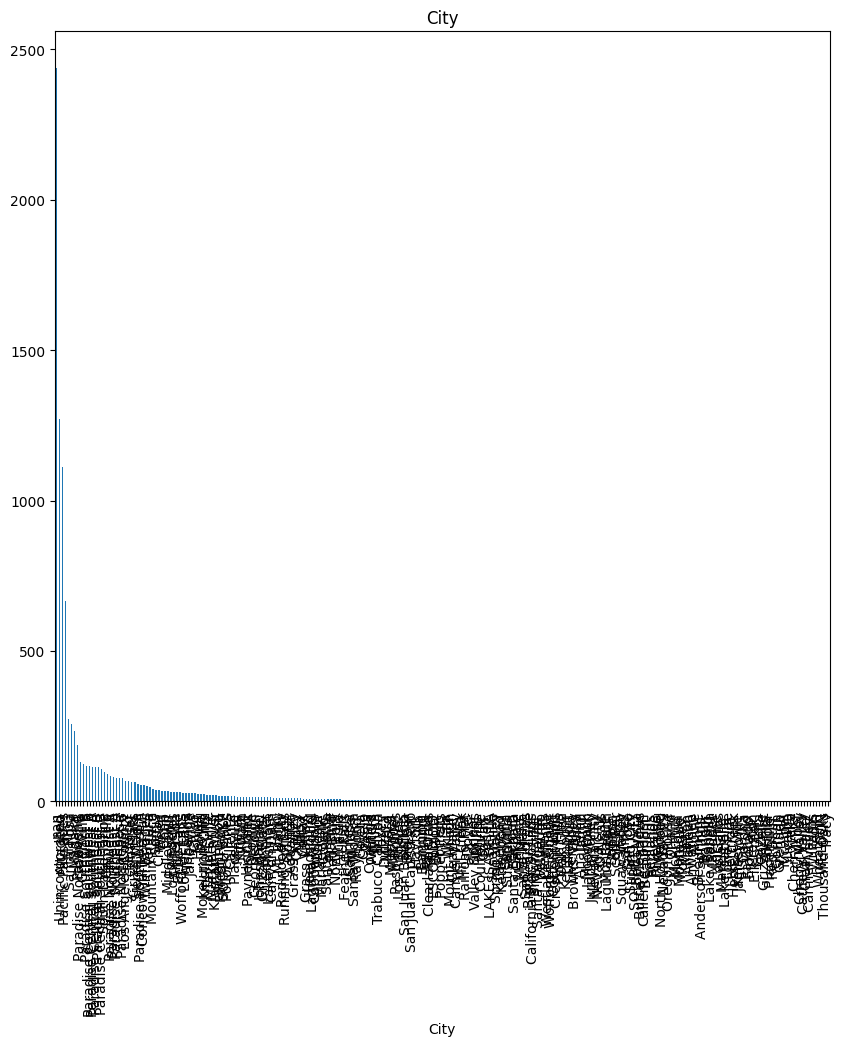

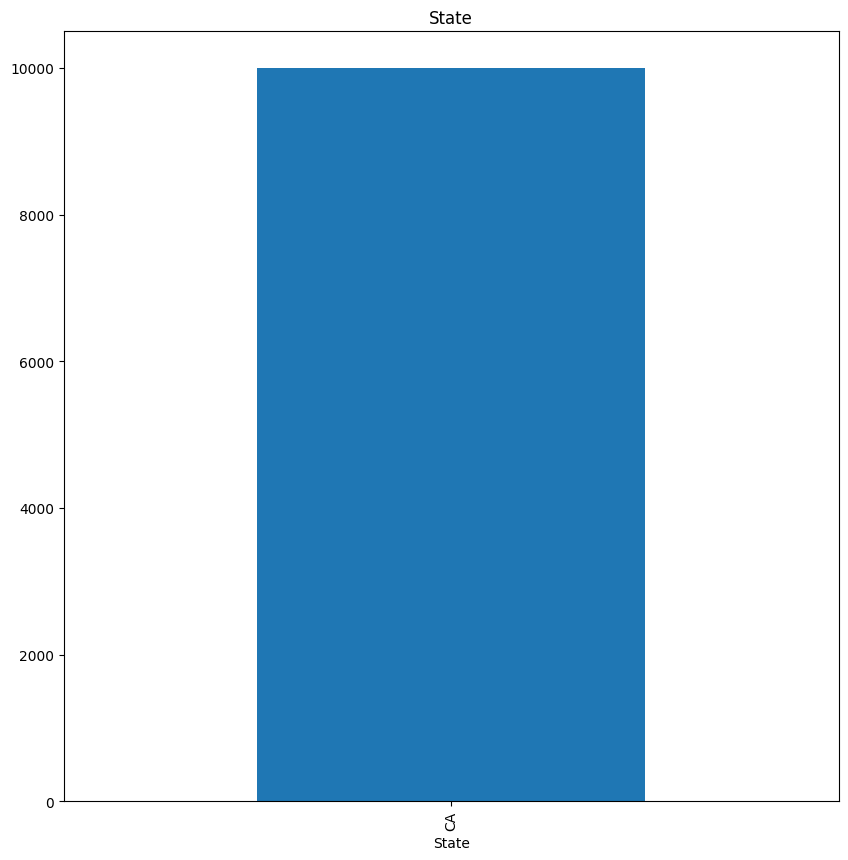

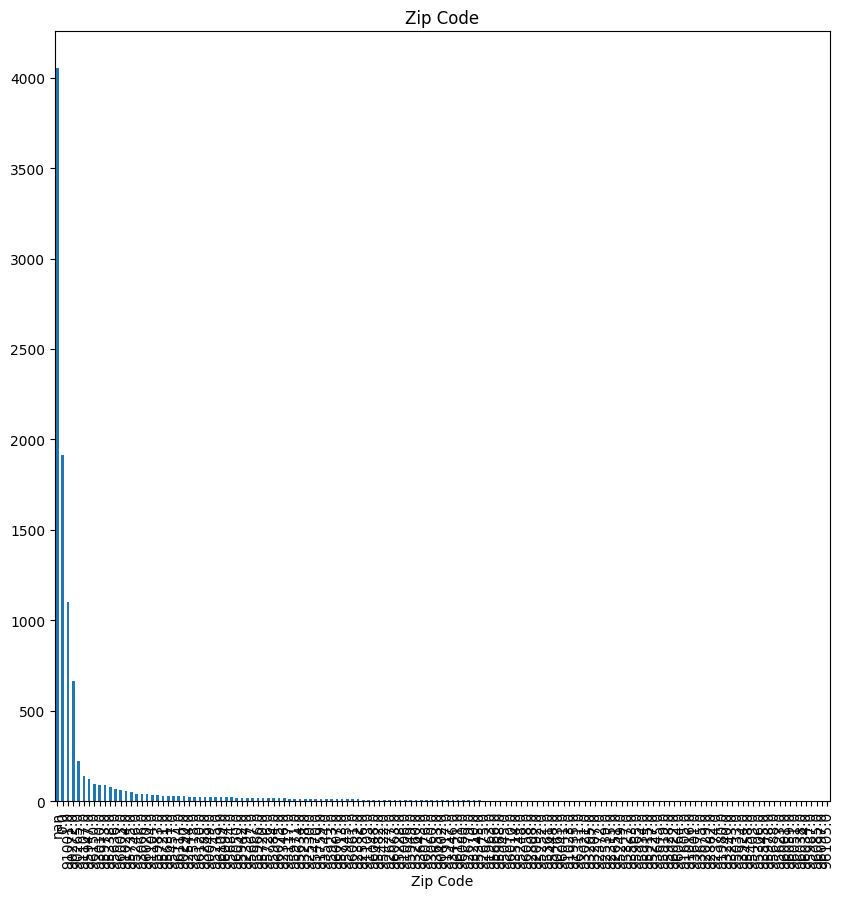

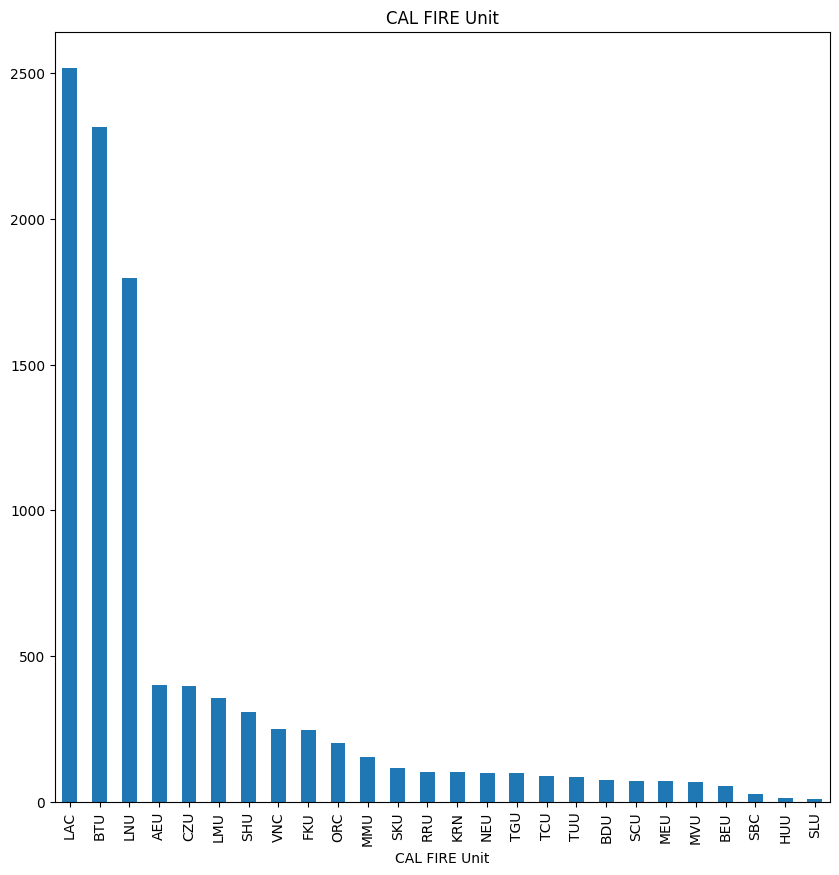

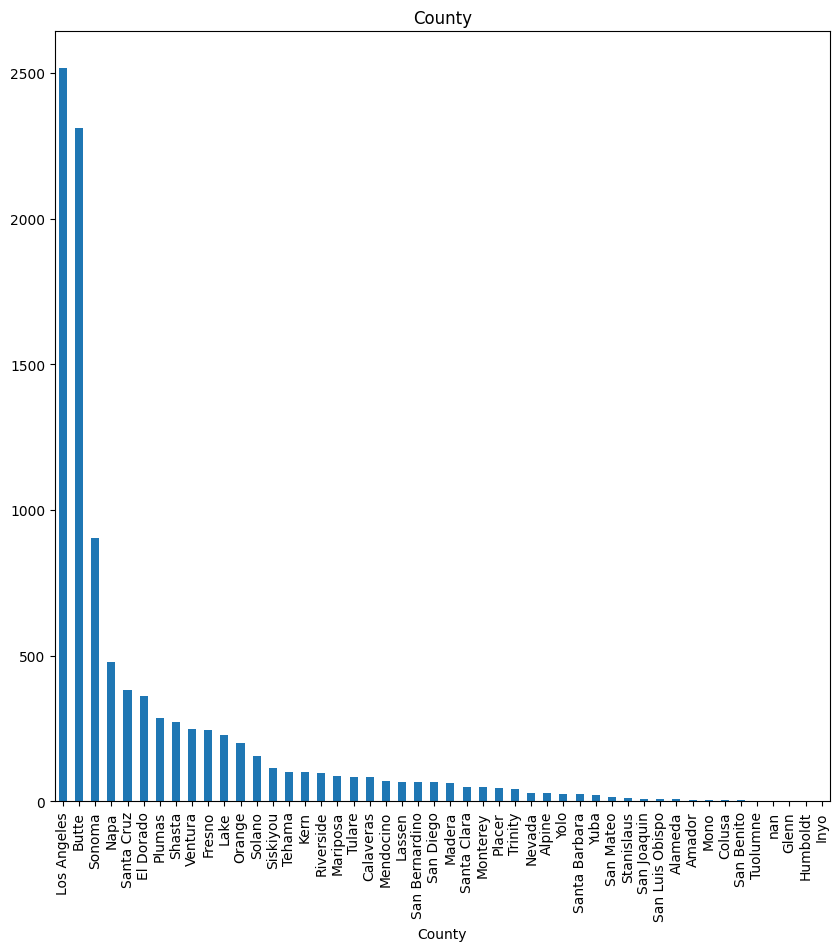

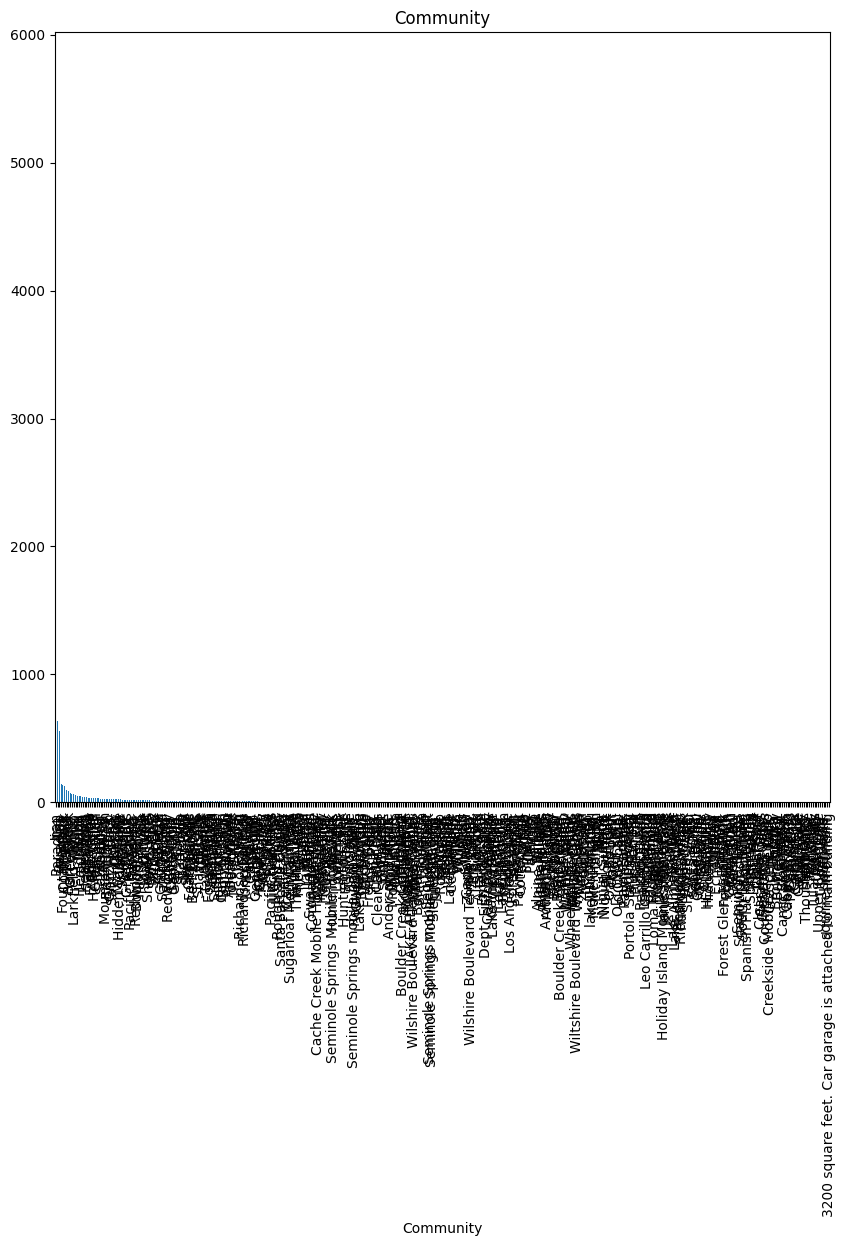

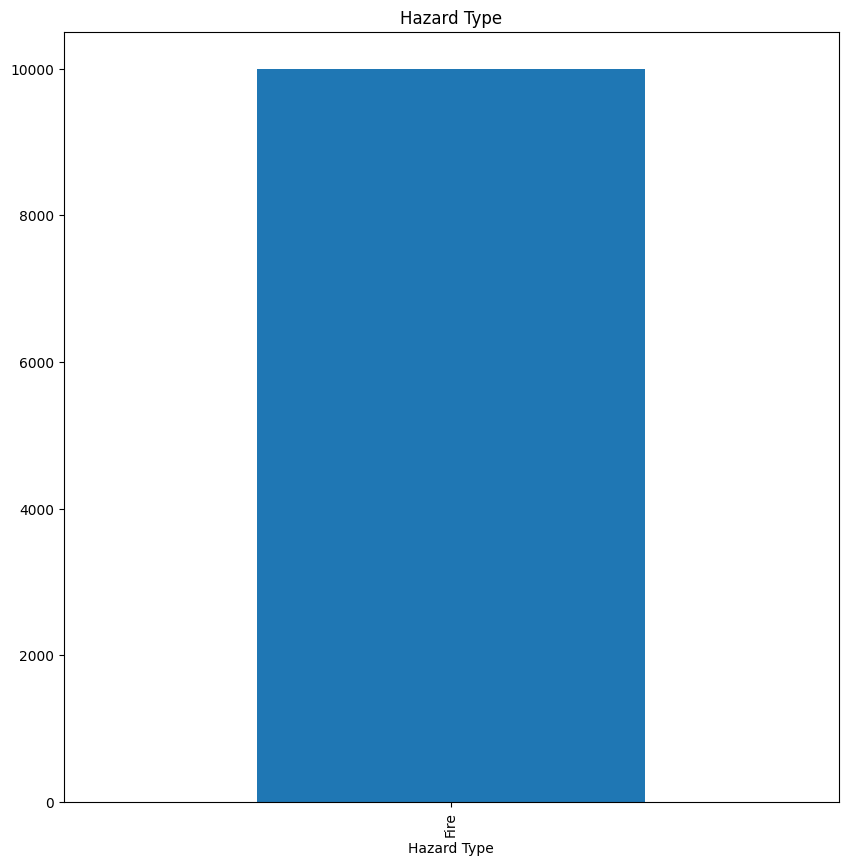

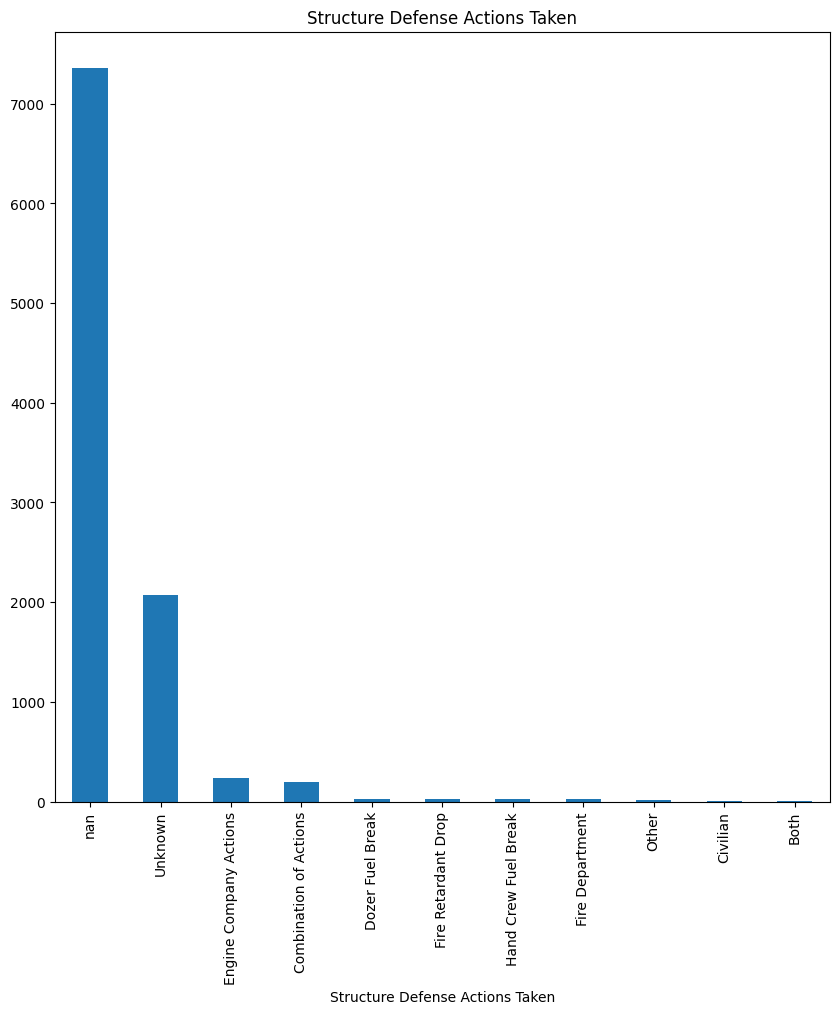

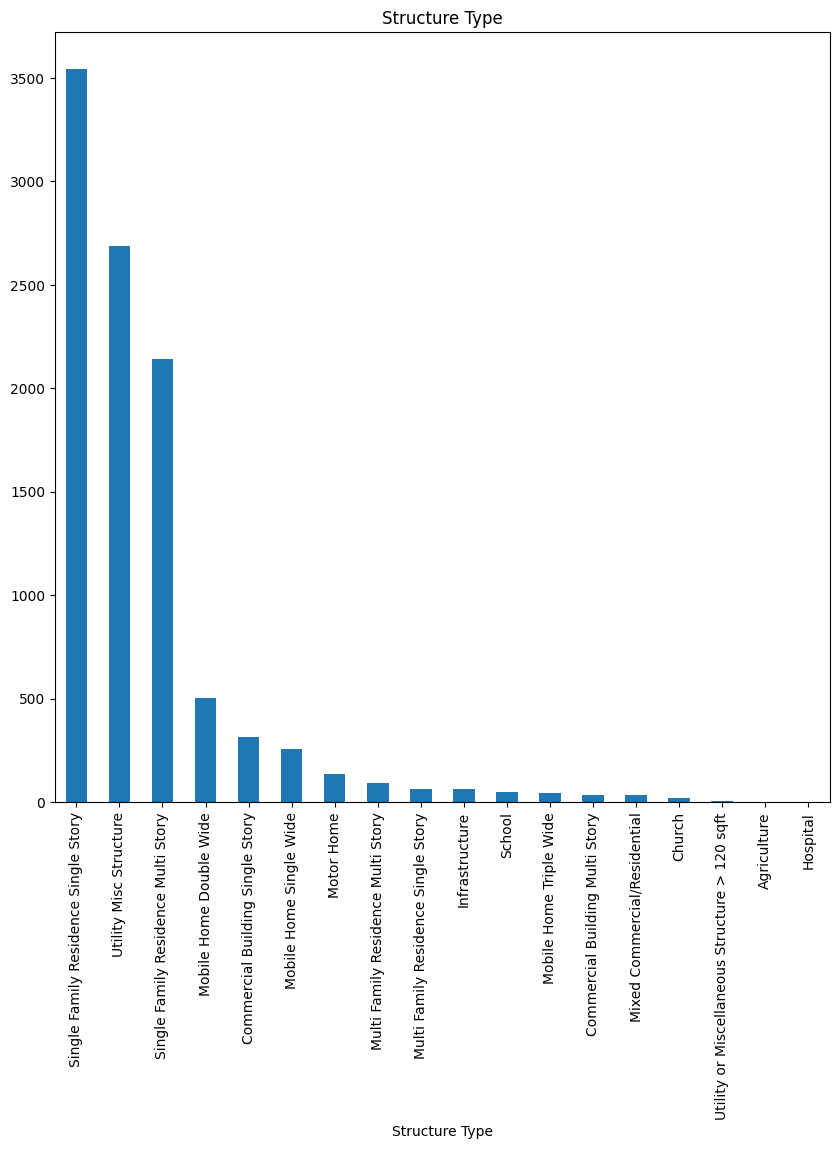

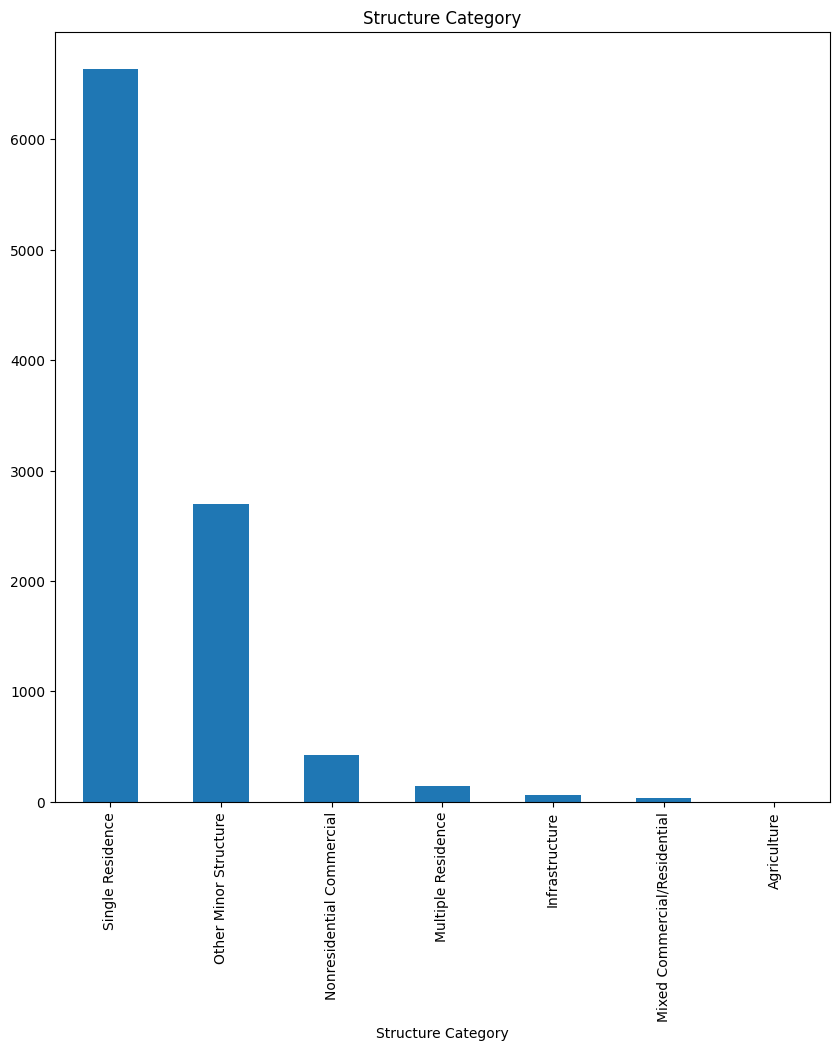

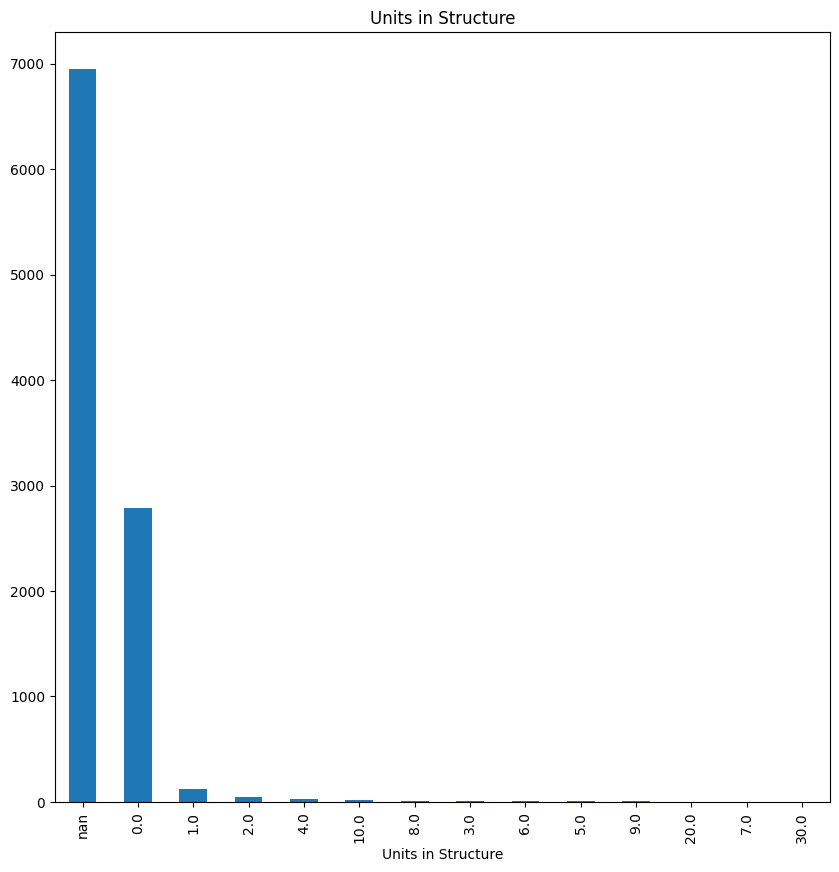

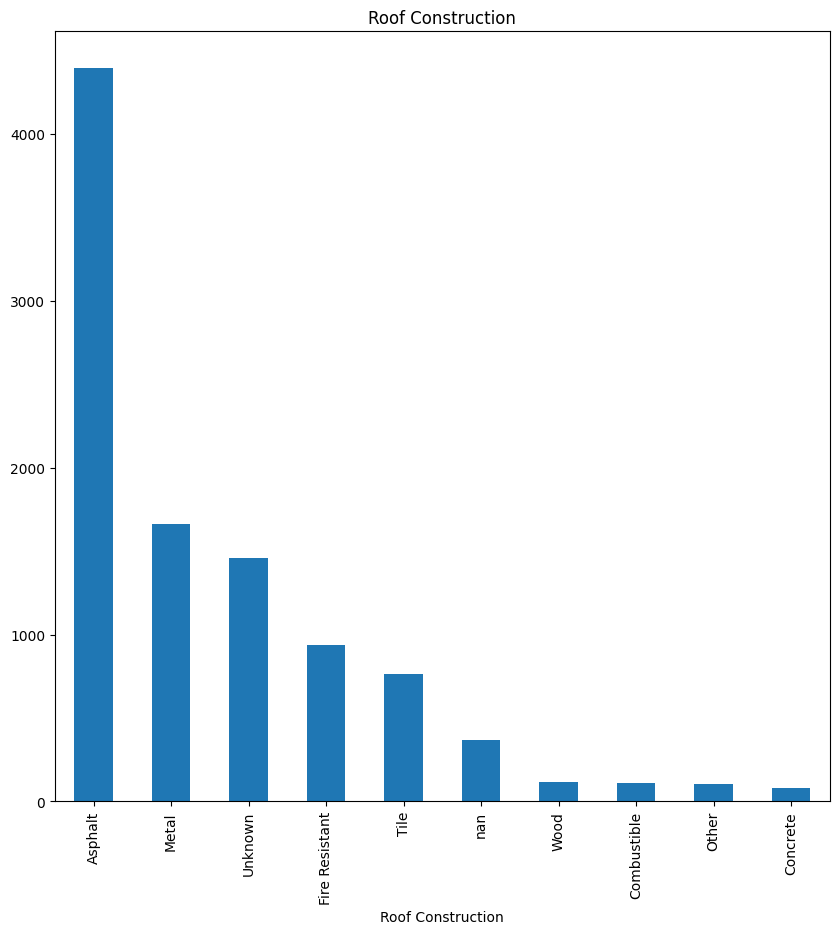

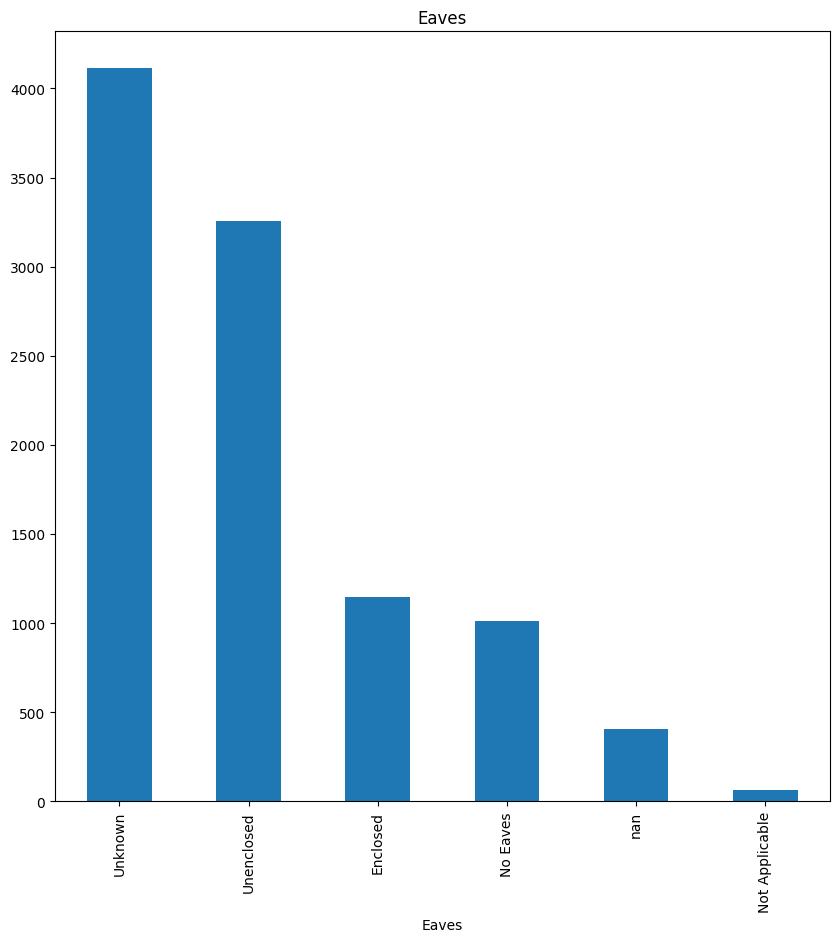

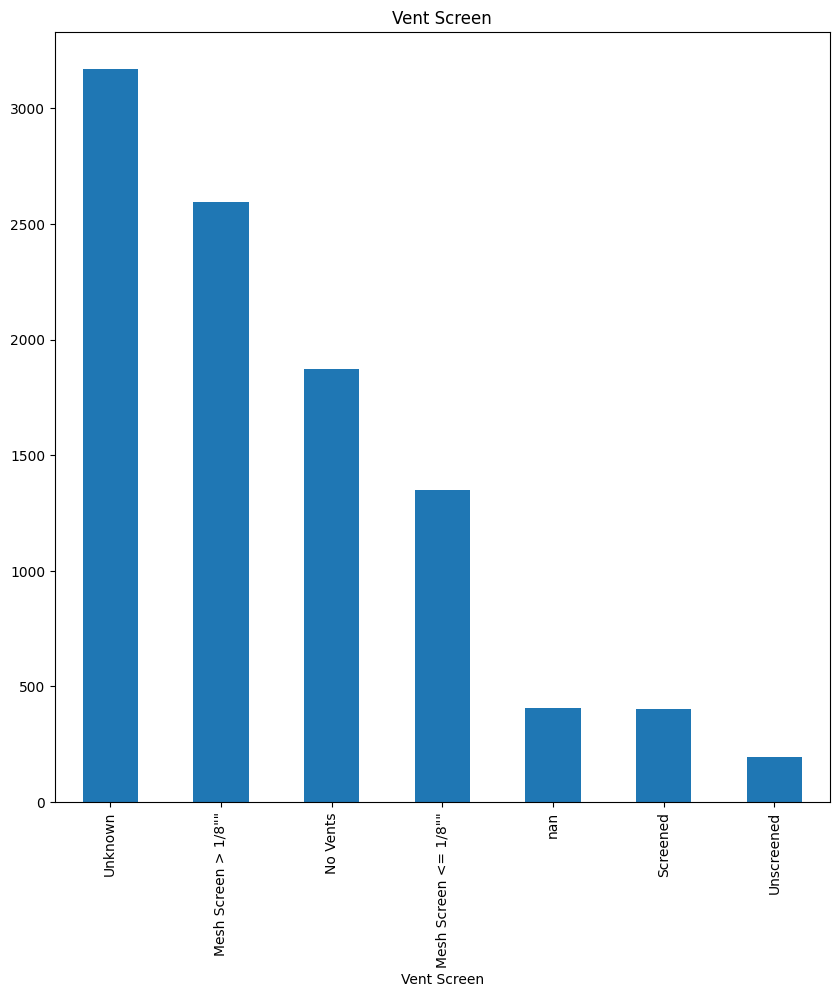

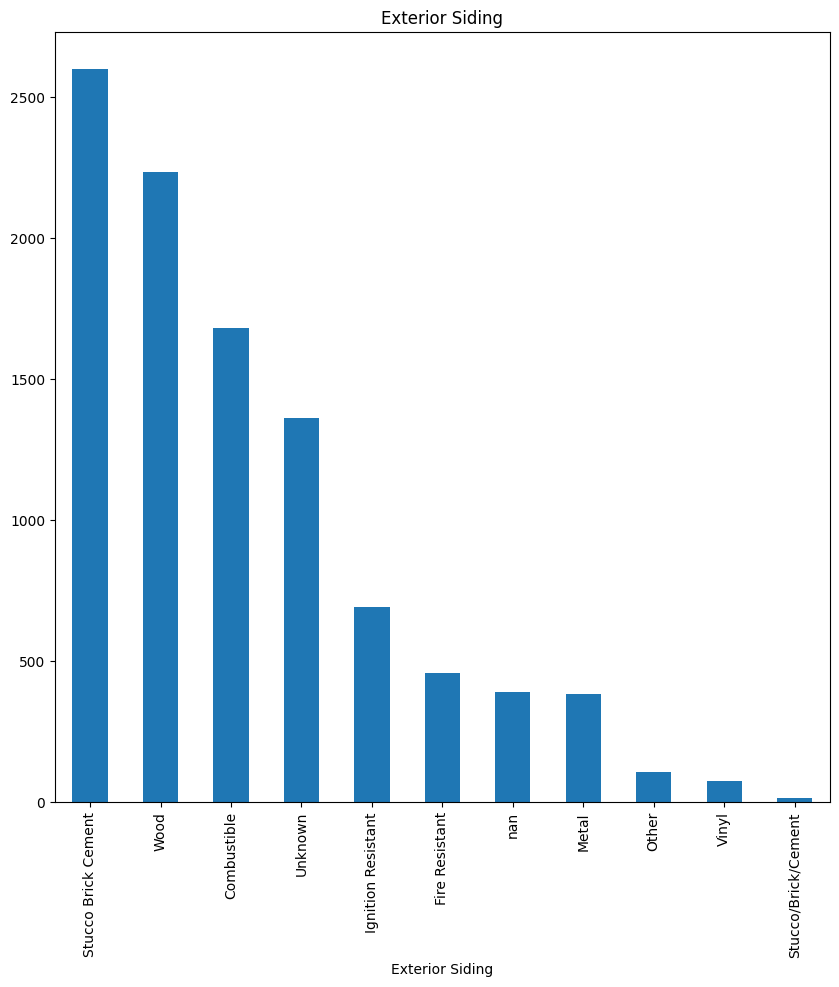

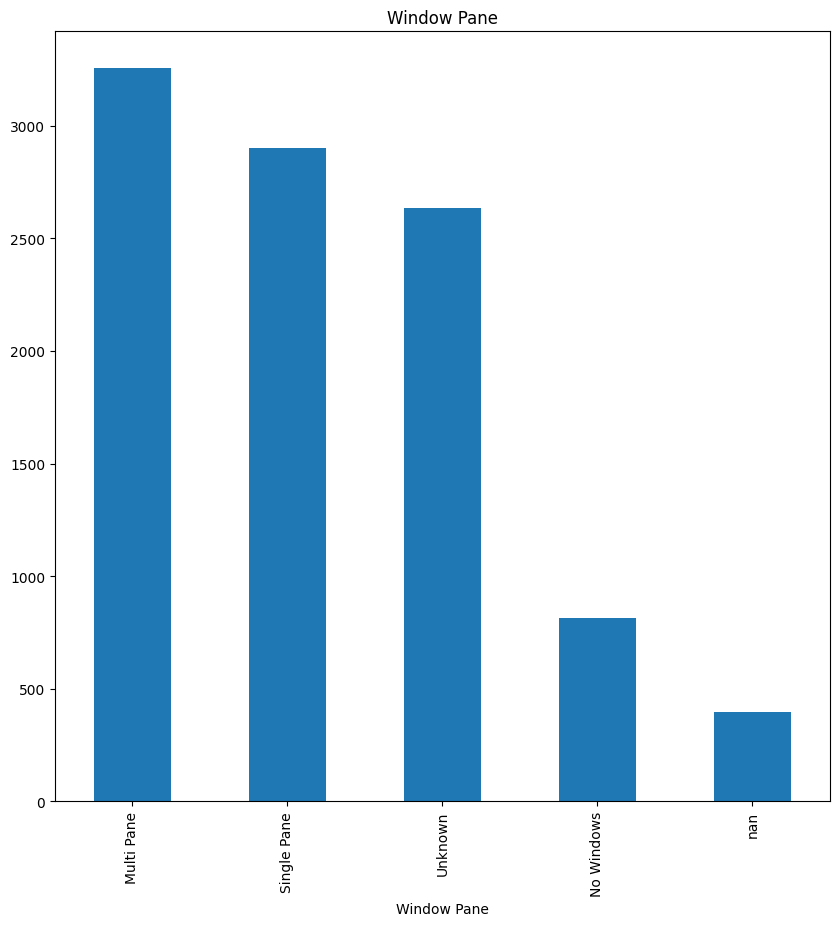

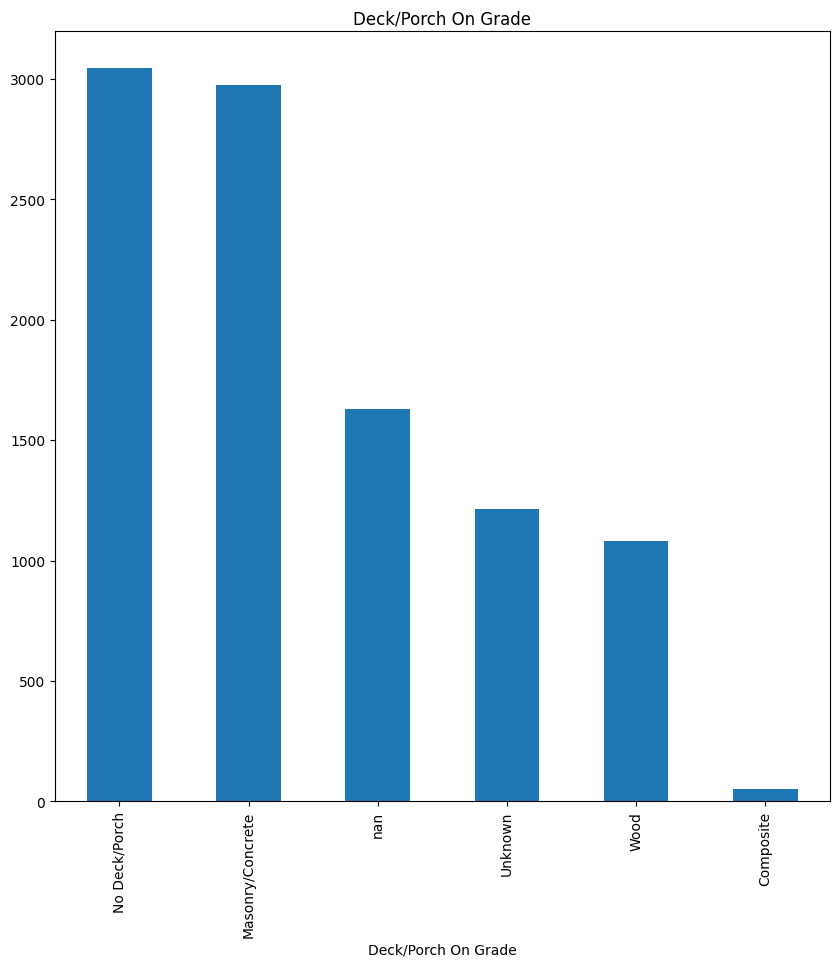

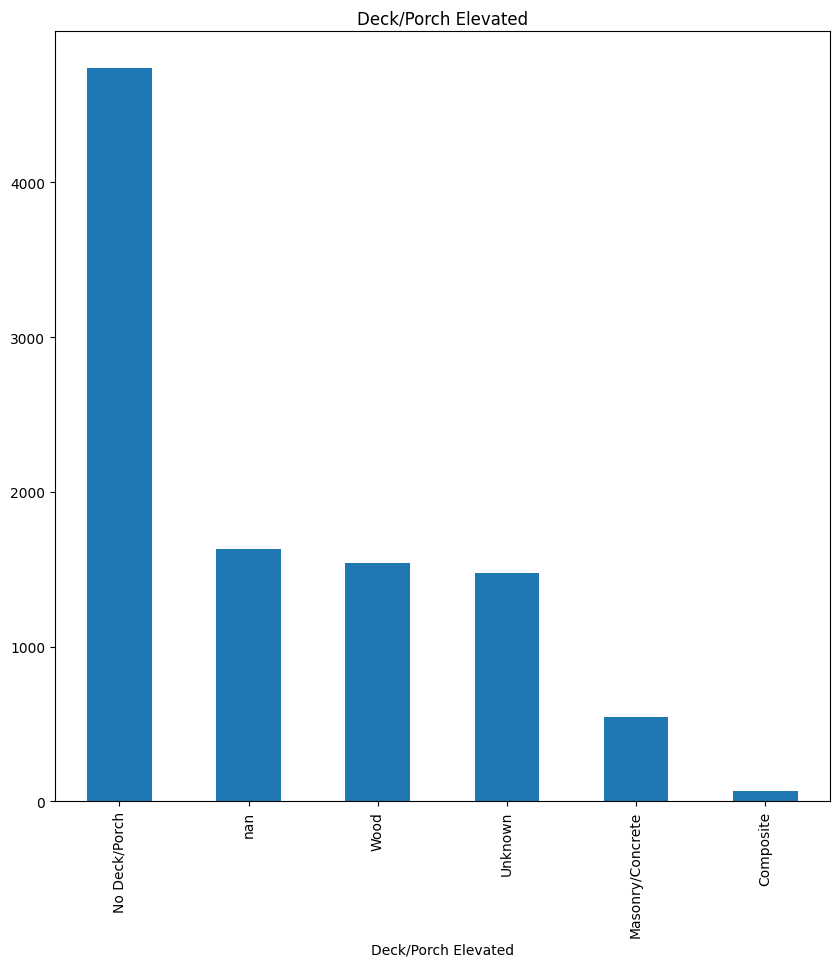

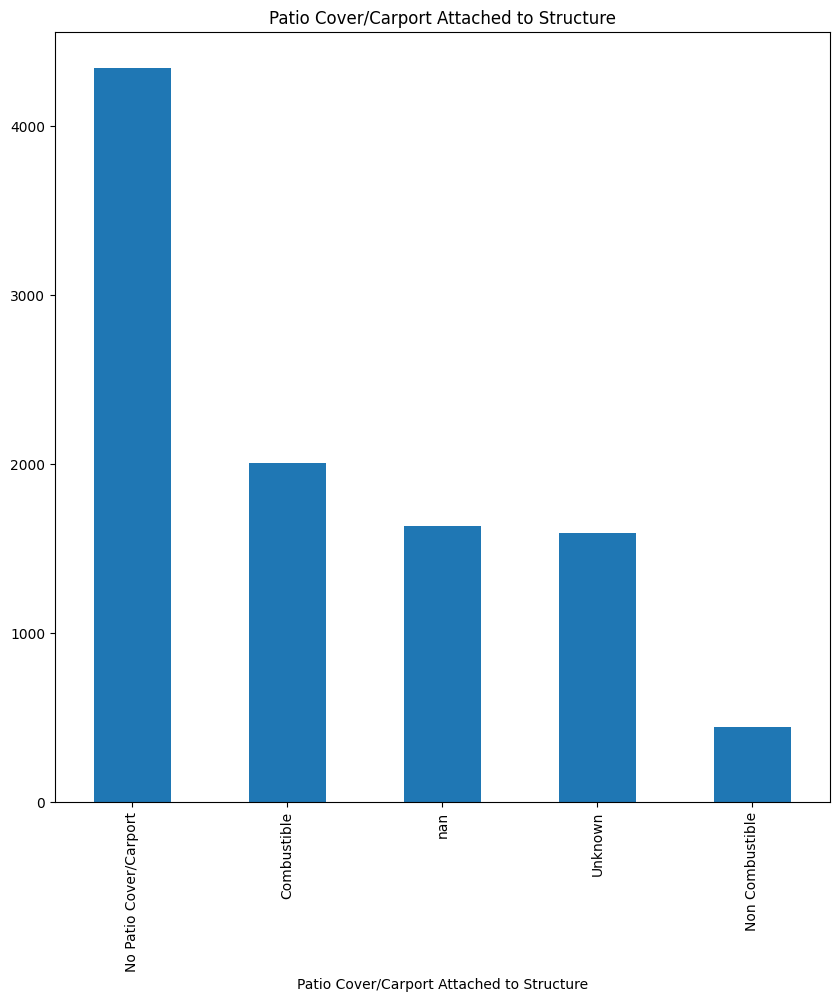

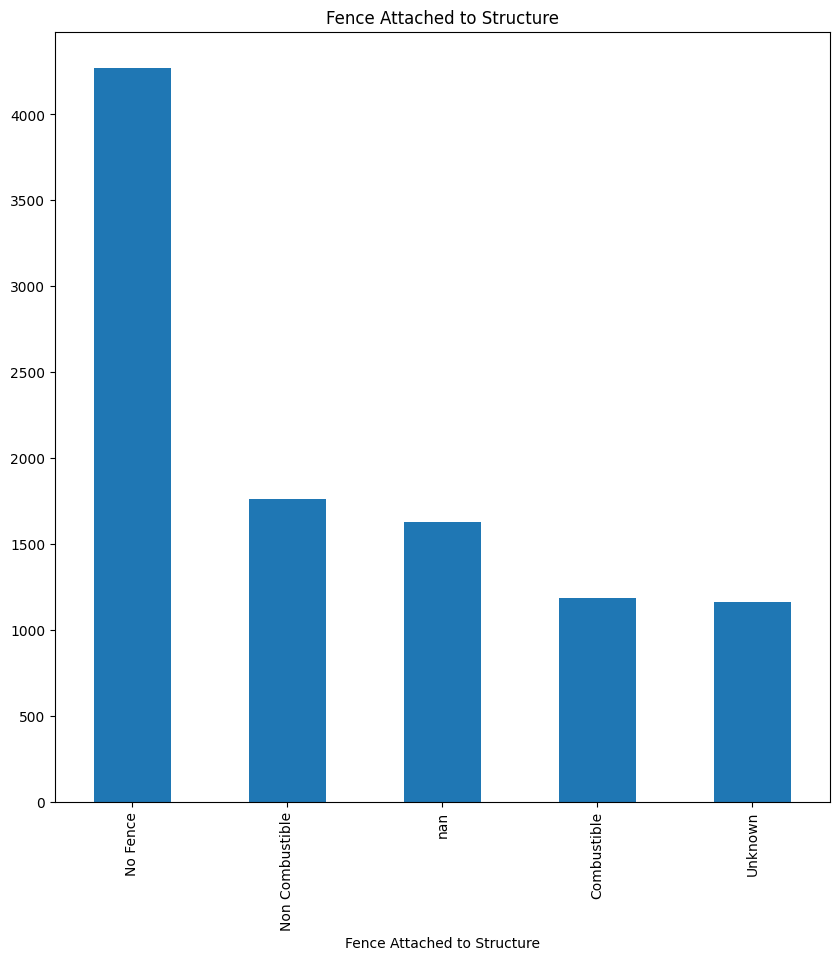

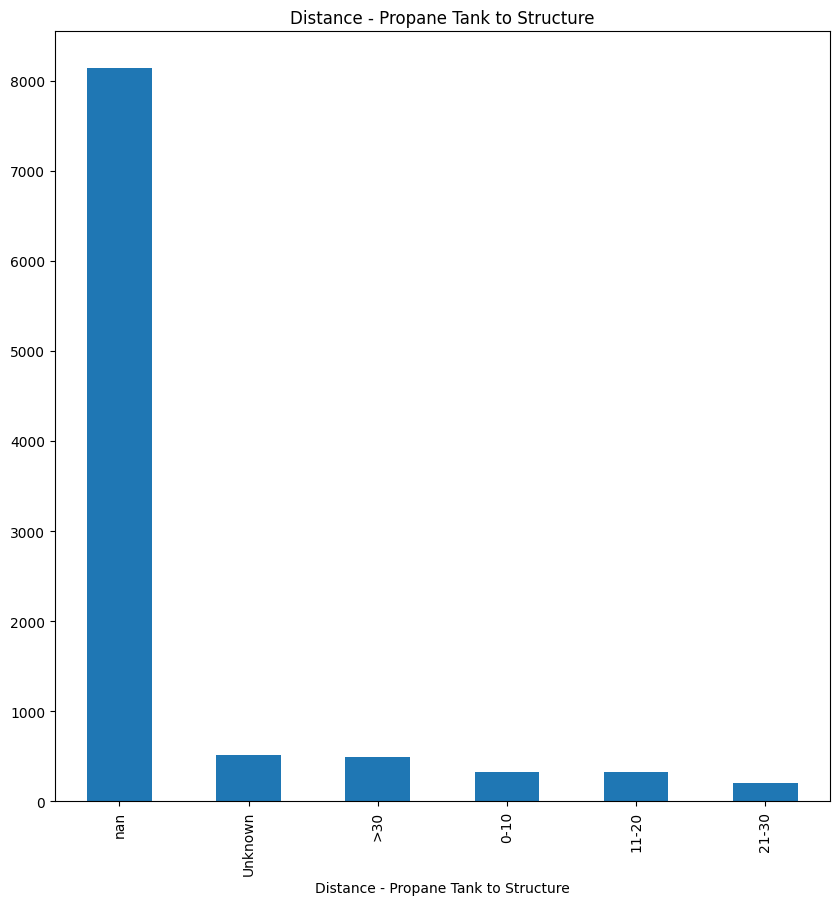

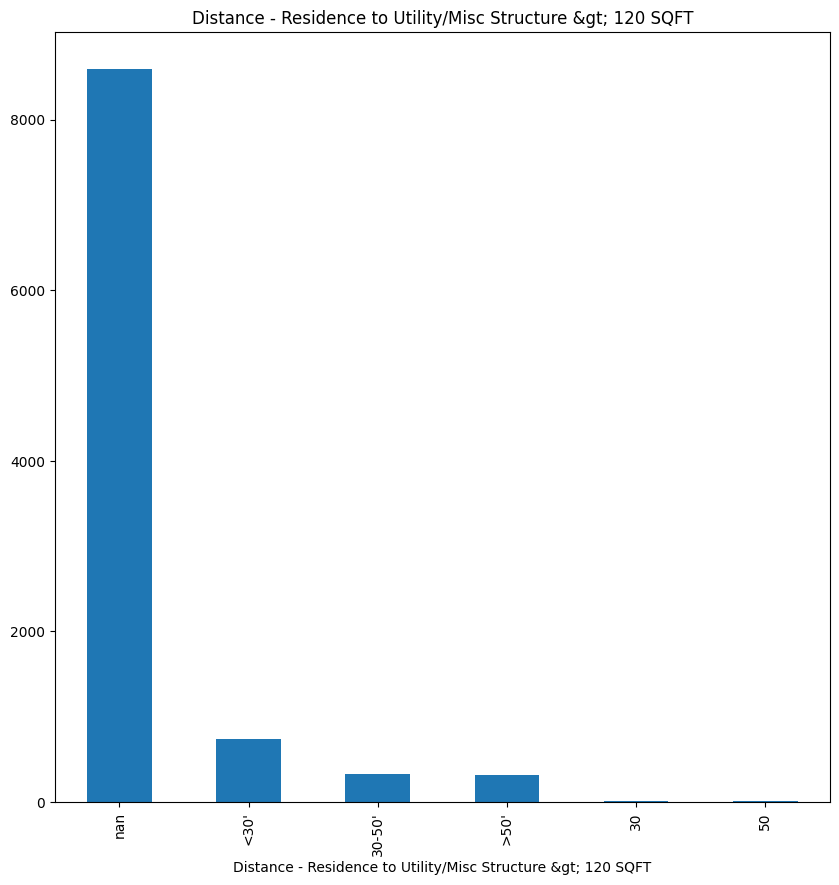

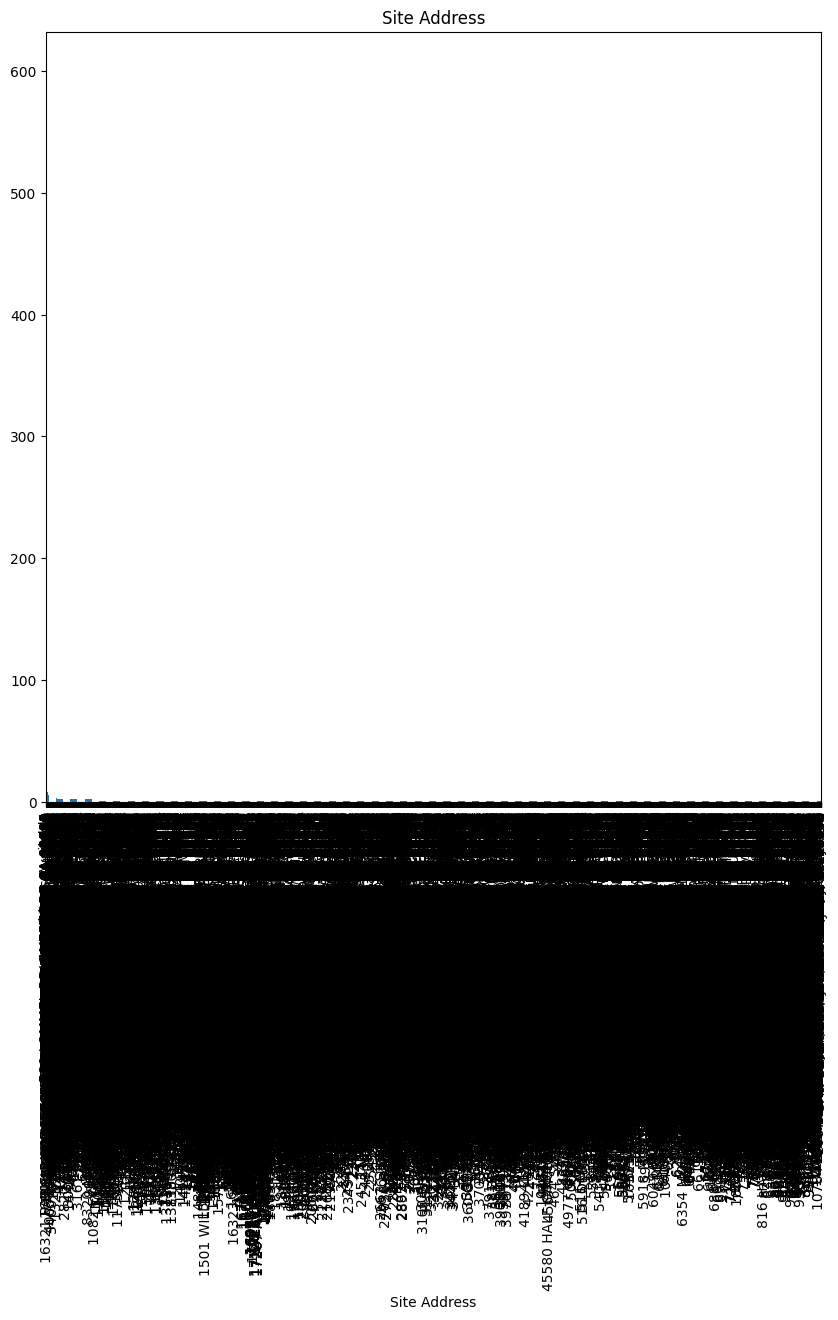

In [39]:
for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(10,10))
    plt.show()

# Plot analysis - Bar plots for categorical feature

First look at the bar plots, We can clearly see that many features have High cardinality and 2 features have very low cardinality. Similar to our observations from stats table, many columns have missing values. We have to decide between fixing the feature with imputation or by removing the rows or by removing the feature altogether

## Data Understanding: Data Quality Plan
In this section we list all features and the observations and actions involving those features, as a step towards obtaining a cleaner dataset.

In [40]:
df.nunique()

OBJECTID                                                        10000
Damage                                                              2
Street Number                                                    5596
Street Name                                                      4036
Street Type                                                        20
City                                                              256
State                                                               1
Zip Code                                                          146
CAL FIRE Unit                                                      26
County                                                             47
Community                                                         430
Incident Start Date                                               151
Hazard Type                                                         1
Structure Defense Actions Taken                                    10
Structure Type      

In [41]:
df.dtypes



OBJECTID                                                                object
Damage                                                                category
Street Number                                                         category
Street Name                                                           category
Street Type                                                           category
City                                                                  category
State                                                                 category
Zip Code                                                              category
CAL FIRE Unit                                                         category
County                                                                category
Community                                                             category
Incident Start Date                                             datetime64[ns]
Hazard Type                                         

## Data Understanding: Data Quality Plan

| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|OBJECTID| This is a unique identifier | Drop feature|
|Damage|No issues|Keep as is|
|Street Number|The cardinality is very high considering we changed it to a categorical feature|Drop feature|
|Street Name|The cardinality is very high (4036)| Drop feature |
|Street Type|Few missing values (11%)|Consider imputation with mode value|
|City|Has higher cardinality (256)|Drop feature|
|State|Single valued feature|Drop feature|
|Zip Code|Very high missing values (41%)|Try getting it from site address column, If it has high cardinality after filling the missing rows, Drop feature|
|CAL FIRE unit|No issues|Keep as is|
|County|Has very low missing values (3 rows)|Consider imputation with mode value|
|Community|Very high missing values (57%)|Drop feature|
|Incident Start Date|No issues|Keep as is|
|Hazard type|Single valued feature|Drop feature|
|Structure Defense Actions Taken|It has very high missing values of 73.55% and over that has 2069 values marked as unknown. Which gives us just 576 values out of 10000 to work with.|Drop feature|
|Structure Type|No issues|Keep as is|
|Structure Category|No issues|Keep as is|
|Units in Structure|69.52% missing values. When plotted with the rest, all the quartiles are 0 and very few values for other values.|Drop feature|
|Roof Construction|Low missing values 4%|Consider imputation with mode value|
|Eaves|Low missing values 4%|Consider imputation with mode value|
|Vent Screen|Low missing values 4%|Consider imputation with mode value|
|Exterior Siding|Low missing values 4% and also has annotator inconsistencies for 1 feature value|Consider imputation with mode value and fix the annotator inconsistency|
|Window Pane|Low missing values 4%|Consider imputation with mode value|
|Deck/Porch On Grade|Low missing values 16%|Consider imputation with mode value|
|Deck/Porch Elevated|Low missing values 16%|Consider imputation with mode value|
|Patio Cover/Carport Attached to Structure|Low missing values 16%|Consider imputation with mode value|
|Fence Attached to Structure|Low missing values 16%|Consider imputation with mode value|
|Distance - Propane Tank to Structure|Very high missing values 81%|Drop feature|
|Distance - Residence to Utility/Misc Structure &gt; 120 SQFT|Very high missing values 86%|Drop feature|
|Assessed Improved Value|Outliers|Consider Clampping|
|Year Built|24.02% missing values, on top of that, has 872 values marked as 0 which also be considered as missing. which comes out to overall 32.74% missing values. Also has outliers|Consider imputation with median value and do nothing with outliers|
|Site Address|Very high cardinality for a categorical feature|Drop feature|
|Latitude|No issues|Keep as is|
|Longitude|No issues|Keep as is|

2. **Implementing Data Quality Strategies.** Update your csv file to include the actions noted in your data quality plan (e.g., dropped features, dropped examples, outliers, filling missing data).

Keep a copy of the previously cleaned datasets

In [42]:
df_raw = df.copy()

Drop the feature that we discussed above. Note that we need the site address column to get the zipcode.

In [43]:
df = df.drop(['Street Number', 'City', 'Street Name', 'State', 'Community', 'Hazard Type', 'Structure Defense Actions Taken', 'Units in Structure', 'Distance - Propane Tank to Structure', 'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT'], axis=1)

df.dtypes

OBJECTID                                             object
Damage                                             category
Street Type                                        category
Zip Code                                           category
CAL FIRE Unit                                      category
County                                             category
Incident Start Date                          datetime64[ns]
Structure Type                                     category
Structure Category                                 category
Roof Construction                                  category
Eaves                                              category
Vent Screen                                        category
Exterior Siding                                    category
Window Pane                                        category
Deck/Porch On Grade                                category
Deck/Porch Elevated                                category
Patio Cover/Carport Attached to Structur

We now do a logical integrity test on assessed improved value. We can see that the minimum value in the feature is 0. Logically, the feature value cannot be 0. Investigate this further. The main thing we are going to do with this feature is investigate the outliers. 

We cant just remove all the outliers that we saw in the box plots. This is the value that is assessed for a certain property and it can be a really high value aswell. However, there are certain values that are really high. But there are really few rows that has value higher than 10000000. I have decided to just keep it. Because there can be properties that can have such higher values.

As far as the rows that contain 0, I suspect that these buildings are old buildings that are demolished. We can check this with a histogram plot of the year feature for the values that are 0

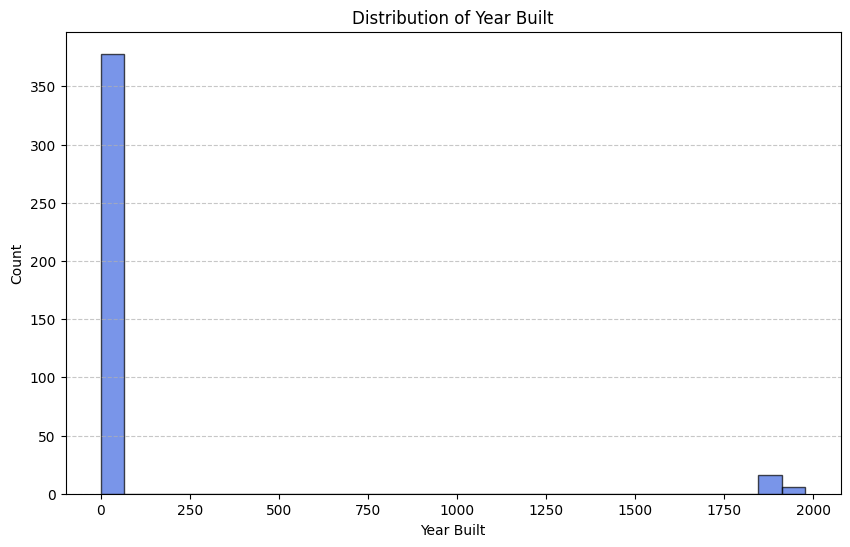

In [44]:
year_integrity_test = df[(df["Assessed Improved Value"] == 0)]

plt.figure(figsize=(10, 6))
plt.hist(year_integrity_test["Year Built"].dropna(), bins=30, color="royalblue", edgecolor="black", alpha=0.7)

plt.title("Distribution of Year Built")
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


We can see that the year built of the most of the buildings that have the assessed improved values 0 are 0 aswell. This is probably a data error. We can remove these rows where assessed improved value is 0.

In [45]:
df = df[(df["Assessed Improved Value"] > 0)]

Since we have already removed few rows with Year built = 0, We can now use imputation on the remaining rows with the median value.

Year Built    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

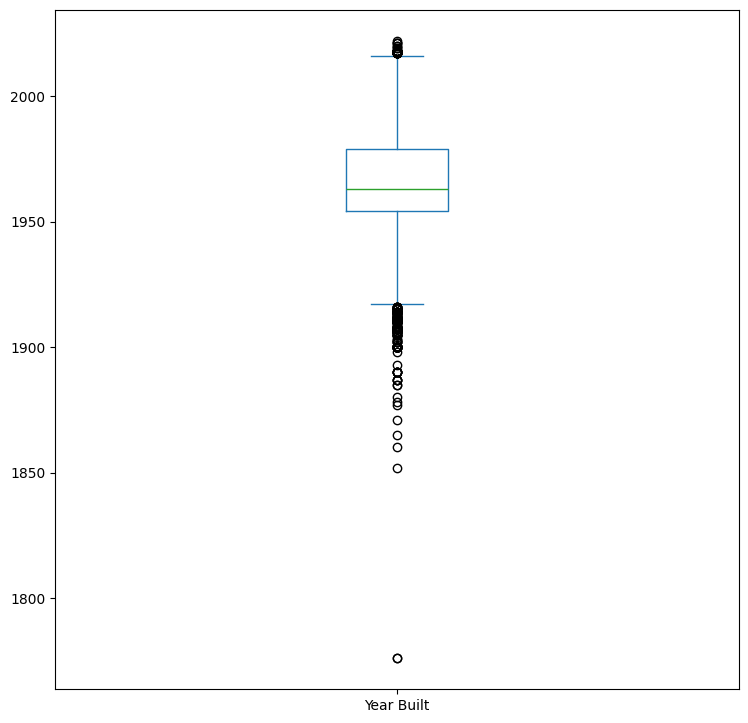

In [46]:
df.fillna({"Year Built" : df["Year Built"].median()}, inplace=True)
df.loc[df["Year Built"] == 0, "Year Built"] = df["Year Built"].median()


df["Year Built"].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)

Get the zipcode from the siteaddress column. Check the cardinality. If its very high, drop the feature. We already have a County feature for location based analysis.

In [47]:
def extract_zip(address):
    if pd.isna(address):
        return None
    match = re.search(r"\b\d{5}\b", str(address))
    return float(match.group(0)) if match else None

df['Zip Code'] = df['Zip Code'].astype('float64')
df.fillna({"Zip Code" : df["Site Address"].apply(extract_zip)}, inplace=True)
df.loc[df["Zip Code"] == 0, "Zip Code"] = df["Site Address"].apply(extract_zip)

zipcode_filter = df[(df["Zip Code"].isnull() != True) & df["Zip Code"] != 0]
df['Zip Code'] = df['Zip Code'].astype('category')


zipcode_filter["Zip Code"] = zipcode_filter["Zip Code"].astype("category")
zipcode_filter["Zip Code"].describe().T


C:\Users\luthe\AppData\Local\Temp\ipykernel_6176\2356104433.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zipcode_filter["Zip Code"] = zipcode_filter["Zip Code"].astype("category")


count     8589
unique    1173
top      95969
freq      1356
Name: Zip Code, dtype: float64

We can see that the zipcode has 1204 unique values. We can drop the feature.

In [48]:
df = df.drop(['Zip Code', 'Site Address'], axis=1)

# Imputation with mode

The following features contains missing values which are to be imputed with the mode value

In [49]:
filtered = df[df["Street Type"] != "Unknown"]
df.fillna({"Street Type" : df["Street Type"].mode()[0]}, inplace=True)
df["Street Type"].describe().T

count     9042
unique      20
top       Road
freq      4006
Name: Street Type, dtype: object

We could see even after getting the value from site address, The zip code column has just too many unique values. We can drop this feature and just make our predication with location only based on the country field, which has considerable cardinality.

In [50]:
df.fillna({"County" : df["County"].mode()[0]}, inplace=True)

df["County"].describe().T

count            9042
unique             47
top       Los Angeles
freq             2419
Name: County, dtype: object

In [51]:
df.fillna({"Roof Construction" : df["Roof Construction"].mode()[0]}, inplace=True)

df["Roof Construction"].describe().T

count        9042
unique          9
top       Asphalt
freq         4531
Name: Roof Construction, dtype: object

In [52]:
filtered = df[df["Eaves"] != "Unknown"]
df.fillna({"Eaves" : df["Eaves"].mode()[0]}, inplace=True)
df["Eaves"] = df["Eaves"].replace("Not Applicable", "Unknown")
df["Eaves"].describe().T

C:\Users\luthe\AppData\Local\Temp\ipykernel_6176\687897772.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Eaves"] = df["Eaves"].replace("Not Applicable", "Unknown")


count        9042
unique          4
top       Unknown
freq         4166
Name: Eaves, dtype: object

In [53]:
filtered = df[df["Vent Screen"] != "Unknown"]
df.fillna({"Vent Screen" : df["Vent Screen"].mode()[0]}, inplace=True)
df["Vent Screen"].describe().T

count        9042
unique          6
top       Unknown
freq         3188
Name: Vent Screen, dtype: object

We also have to fix the annotator inconsistency for Exteriro siding

One feature value, Stucco/Brick/Cement is also given as Stucco Brick Cement
We will keep Stucco/Brick/Cement

In [54]:
filtered = df[df["Exterior Siding"] != "Unknown"]
df.fillna({"Exterior Siding" : df["Exterior Siding"].mode()[0]}, inplace=True)
df["Exterior Siding"] = df["Exterior Siding"].replace("Stucco Brick Cement", "Stucco/Brick/Cement")
df["Exterior Siding"].describe().T

C:\Users\luthe\AppData\Local\Temp\ipykernel_6176\2121188646.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Exterior Siding"] = df["Exterior Siding"].replace("Stucco Brick Cement", "Stucco/Brick/Cement")


count                    9042
unique                      9
top       Stucco/Brick/Cement
freq                     2826
Name: Exterior Siding, dtype: object

In [55]:
filtered = df[df["Window Pane"] != "Unknown"]
df.fillna({"Window Pane" : df["Window Pane"].mode()[0]}, inplace=True)
df["Window Pane"].describe().T

count           9042
unique             4
top       Multi Pane
freq            3421
Name: Window Pane, dtype: object

In [56]:
filtered = df[df["Deck/Porch On Grade"] != "Unknown"]
df.fillna({"Deck/Porch On Grade" : df["Deck/Porch On Grade"].mode()[0]}, inplace=True)  
df["Deck/Porch On Grade"].describe().T

count                 9042
unique                   5
top       Masonry/Concrete
freq                  4350
Name: Deck/Porch On Grade, dtype: object

In [57]:
filtered = df[df["Deck/Porch Elevated"] != "Unknown"]
df.fillna({"Deck/Porch Elevated" : df["Deck/Porch Elevated"].mode()[0]}, inplace=True)
df["Deck/Porch Elevated"].describe().T

count              9042
unique                5
top       No Deck/Porch
freq               5819
Name: Deck/Porch Elevated, dtype: object

In [58]:
filtered = df[df["Patio Cover/Carport Attached to Structure"] != "Unknown"]
df.fillna({"Patio Cover/Carport Attached to Structure" : df["Patio Cover/Carport Attached to Structure"].mode()[0]}, inplace=True)
df["Patio Cover/Carport Attached to Structure"].describe().T

count                       9042
unique                         4
top       No Patio Cover/Carport
freq                        5416
Name: Patio Cover/Carport Attached to Structure, dtype: object

In [59]:
filtered = df[df["Fence Attached to Structure"] != "Unknown"]
df.fillna({"Fence Attached to Structure" : df["Fence Attached to Structure"].mode()[0]}, inplace=True)
df["Fence Attached to Structure"].describe().T

count         9042
unique           4
top       No Fence
freq          5281
Name: Fence Attached to Structure, dtype: object

We have done everything that we marked in the Data quality plan. We can now check the stats table again to see if we still have any missing values

In [60]:
numeric_columns = df.select_dtypes(['int64', 'float64', 'datetime64[ns]']).columns
numeric_columns

Index(['Incident Start Date', 'Assessed Improved Value', 'Year Built',
       'Latitude', 'Longitude'],
      dtype='object')

In [61]:
df[numeric_columns].describe().T

,count,mean,min,25%,50%,75%,max,std
Incident Start Date,9042,2021-03-13 01:18:21.103848704,2013-09-09 00:00:00,2018-11-08 00:00:00,2020-09-05 00:00:00,2024-12-09 00:00:00,2025-01-09 00:50:35,NaN
Assessed Improved Value,9042,726995,10,80481,170368,352930,387443017,7580899
Year Built,9042,1965,1776,1954,1963,1979,2022,23
Latitude,9042,37,33,34,38,40,42,2
Longitude,9042,-121,-124,-122,-122,-119,-117,2


In [62]:
numeric_columns_missing  = 100 * (df[numeric_columns].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
Incident Start Date,0
Assessed Improved Value,0
Year Built,0
Latitude,0
Longitude,0


In [63]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Incident Start Date,144
Assessed Improved Value,7560
Year Built,135
Latitude,9037
Longitude,9041


In [64]:
df_table_numeric = df[numeric_columns].describe().T

# Put the columns together to prepare the final table for numeric_columns
df_numeric_columns_data_quality_report_table = pd.concat([df_table_numeric, df_numeric_missing, df_numeric_card], axis=1)

# Print data quality report table for numeric features to a file.

df_numeric_columns_data_quality_report_table

,count,mean,min,25%,50%,75%,max,std,%missing,card
Incident Start Date,9042,2021-03-13 01:18:21.103848704,2013-09-09 00:00:00,2018-11-08 00:00:00,2020-09-05 00:00:00,2024-12-09 00:00:00,2025-01-09 00:50:35,NaN,0,144
Assessed Improved Value,9042,726995,10,80481,170368,352930,387443017,7580899,0,7560
Year Built,9042,1965,1776,1954,1963,1979,2022,23,0,135
Latitude,9042,37,33,34,38,40,42,2,0,9037
Longitude,9042,-121,-124,-122,-122,-119,-117,2,0,9041


Miss % is 0 for all features

In [65]:
category_columns = df.select_dtypes("category").columns
category_columns

Index(['Damage', 'Street Type', 'CAL FIRE Unit', 'County', 'Structure Type',
       'Structure Category', 'Roof Construction', 'Eaves', 'Vent Screen',
       'Exterior Siding', 'Window Pane', 'Deck/Porch On Grade',
       'Deck/Porch Elevated', 'Patio Cover/Carport Attached to Structure',
       'Fence Attached to Structure'],
      dtype='object')

In [66]:
df[category_columns].describe().T

,count,unique,top,freq
Damage,9042,2,Destroyed (>50%),5328
Street Type,9042,20,Road,4006
CAL FIRE Unit,9042,26,LAC,2416
County,9042,47,Los Angeles,2419
Structure Type,9042,18,Single Family Residence Single Story,3332
Structure Category,9042,7,Single Residence,6177
Roof Construction,9042,9,Asphalt,4531
Eaves,9042,4,Unknown,4166
Vent Screen,9042,6,Unknown,3188
Exterior Siding,9042,9,Stucco/Brick/Cement,2826


In [67]:
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Damage,0
Street Type,0
CAL FIRE Unit,0
County,0
Structure Type,0
Structure Category,0
Roof Construction,0
Eaves,0
Vent Screen,0
Exterior Siding,0


In [68]:
category_columns_card = df[category_columns].nunique()
# store the values in a dataframe
df_category_card = pd.DataFrame(category_columns_card, columns=['card'])
df_category_card

,card
Damage,2
Street Type,20
CAL FIRE Unit,26
County,47
Structure Type,18
Structure Category,7
Roof Construction,9
Eaves,4
Vent Screen,6
Exterior Siding,9


In [69]:
df_table_categ = df[category_columns].describe().T

df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_perc_missing, df_category_card], axis=1)

# Print data quality report table for categorical features to a file.
# The file will be created in the current folder where jupyter notebook is run from.

df_category_columns_data_quality_report_table

,count,unique,top,freq,%missing,card
Damage,9042,2,Destroyed (>50%),5328,0,2
Street Type,9042,20,Road,4006,0,20
CAL FIRE Unit,9042,26,LAC,2416,0,26
County,9042,47,Los Angeles,2419,0,47
Structure Type,9042,18,Single Family Residence Single Story,3332,0,18
Structure Category,9042,7,Single Residence,6177,0,7
Roof Construction,9042,9,Asphalt,4531,0,9
Eaves,9042,4,Unknown,4166,0,4
Vent Screen,9042,6,Unknown,3188,0,6
Exterior Siding,9042,9,Stucco/Brick/Cement,2826,0,9


Miss % 0 for categorical features as well

array([[<Axes: title={'center': 'Incident Start Date'}>,
        <Axes: title={'center': 'Assessed Improved Value'}>],
       [<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>, <Axes: >]], dtype=object)

<Figure size 640x480 with 0 Axes>

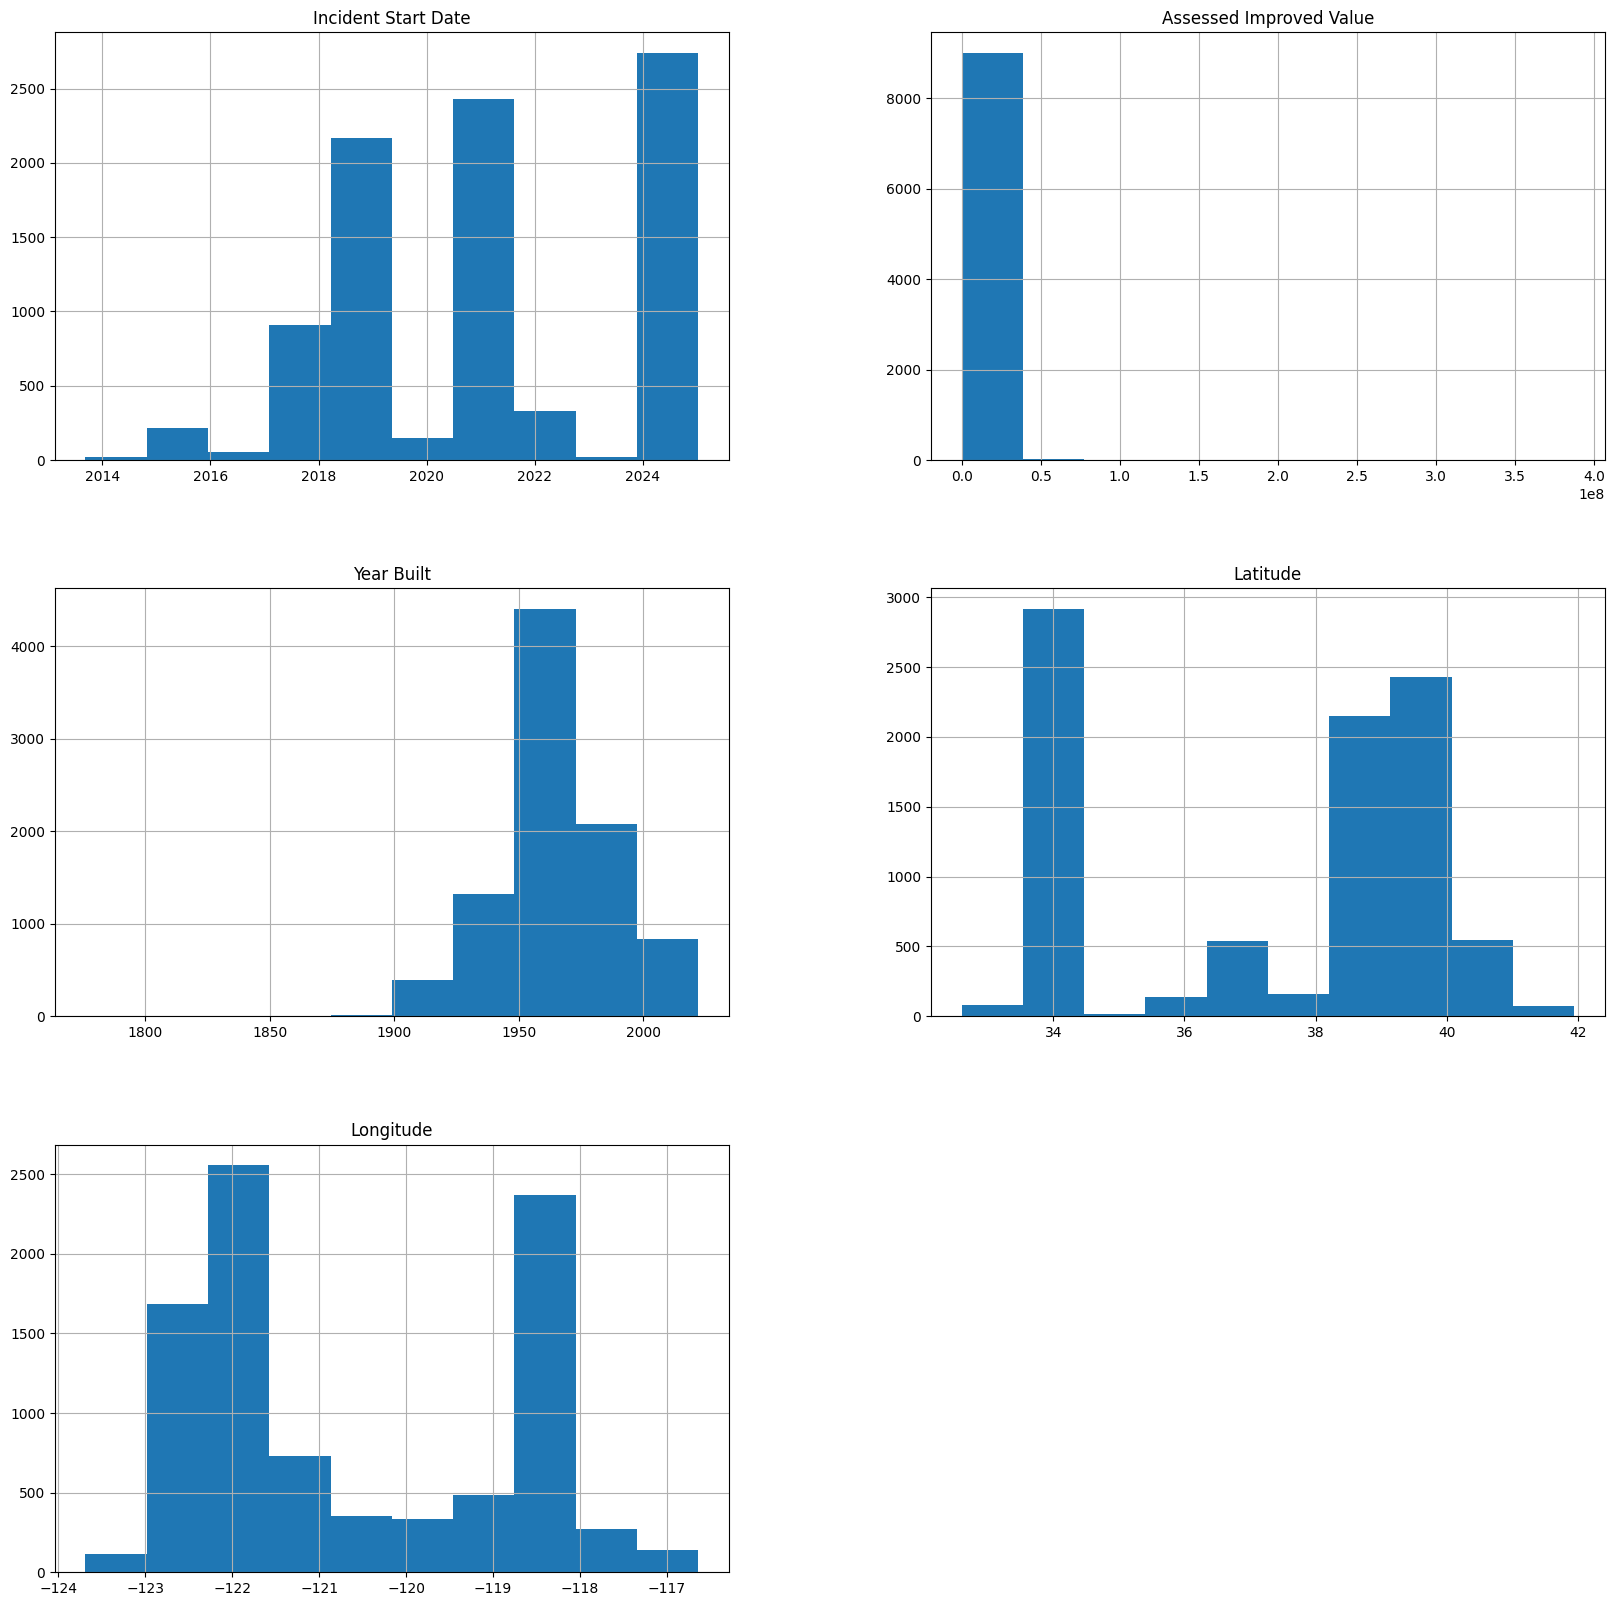

In [70]:
df.dtypes
plt.figure()
df.hist(figsize=(20, 20))

Assessed Improved Value       Axes(0.125,0.653529;0.227941x0.226471)
Year Built                 Axes(0.398529,0.653529;0.227941x0.226471)
Latitude                   Axes(0.672059,0.653529;0.227941x0.226471)
Longitude                     Axes(0.125,0.381765;0.227941x0.226471)
dtype: object

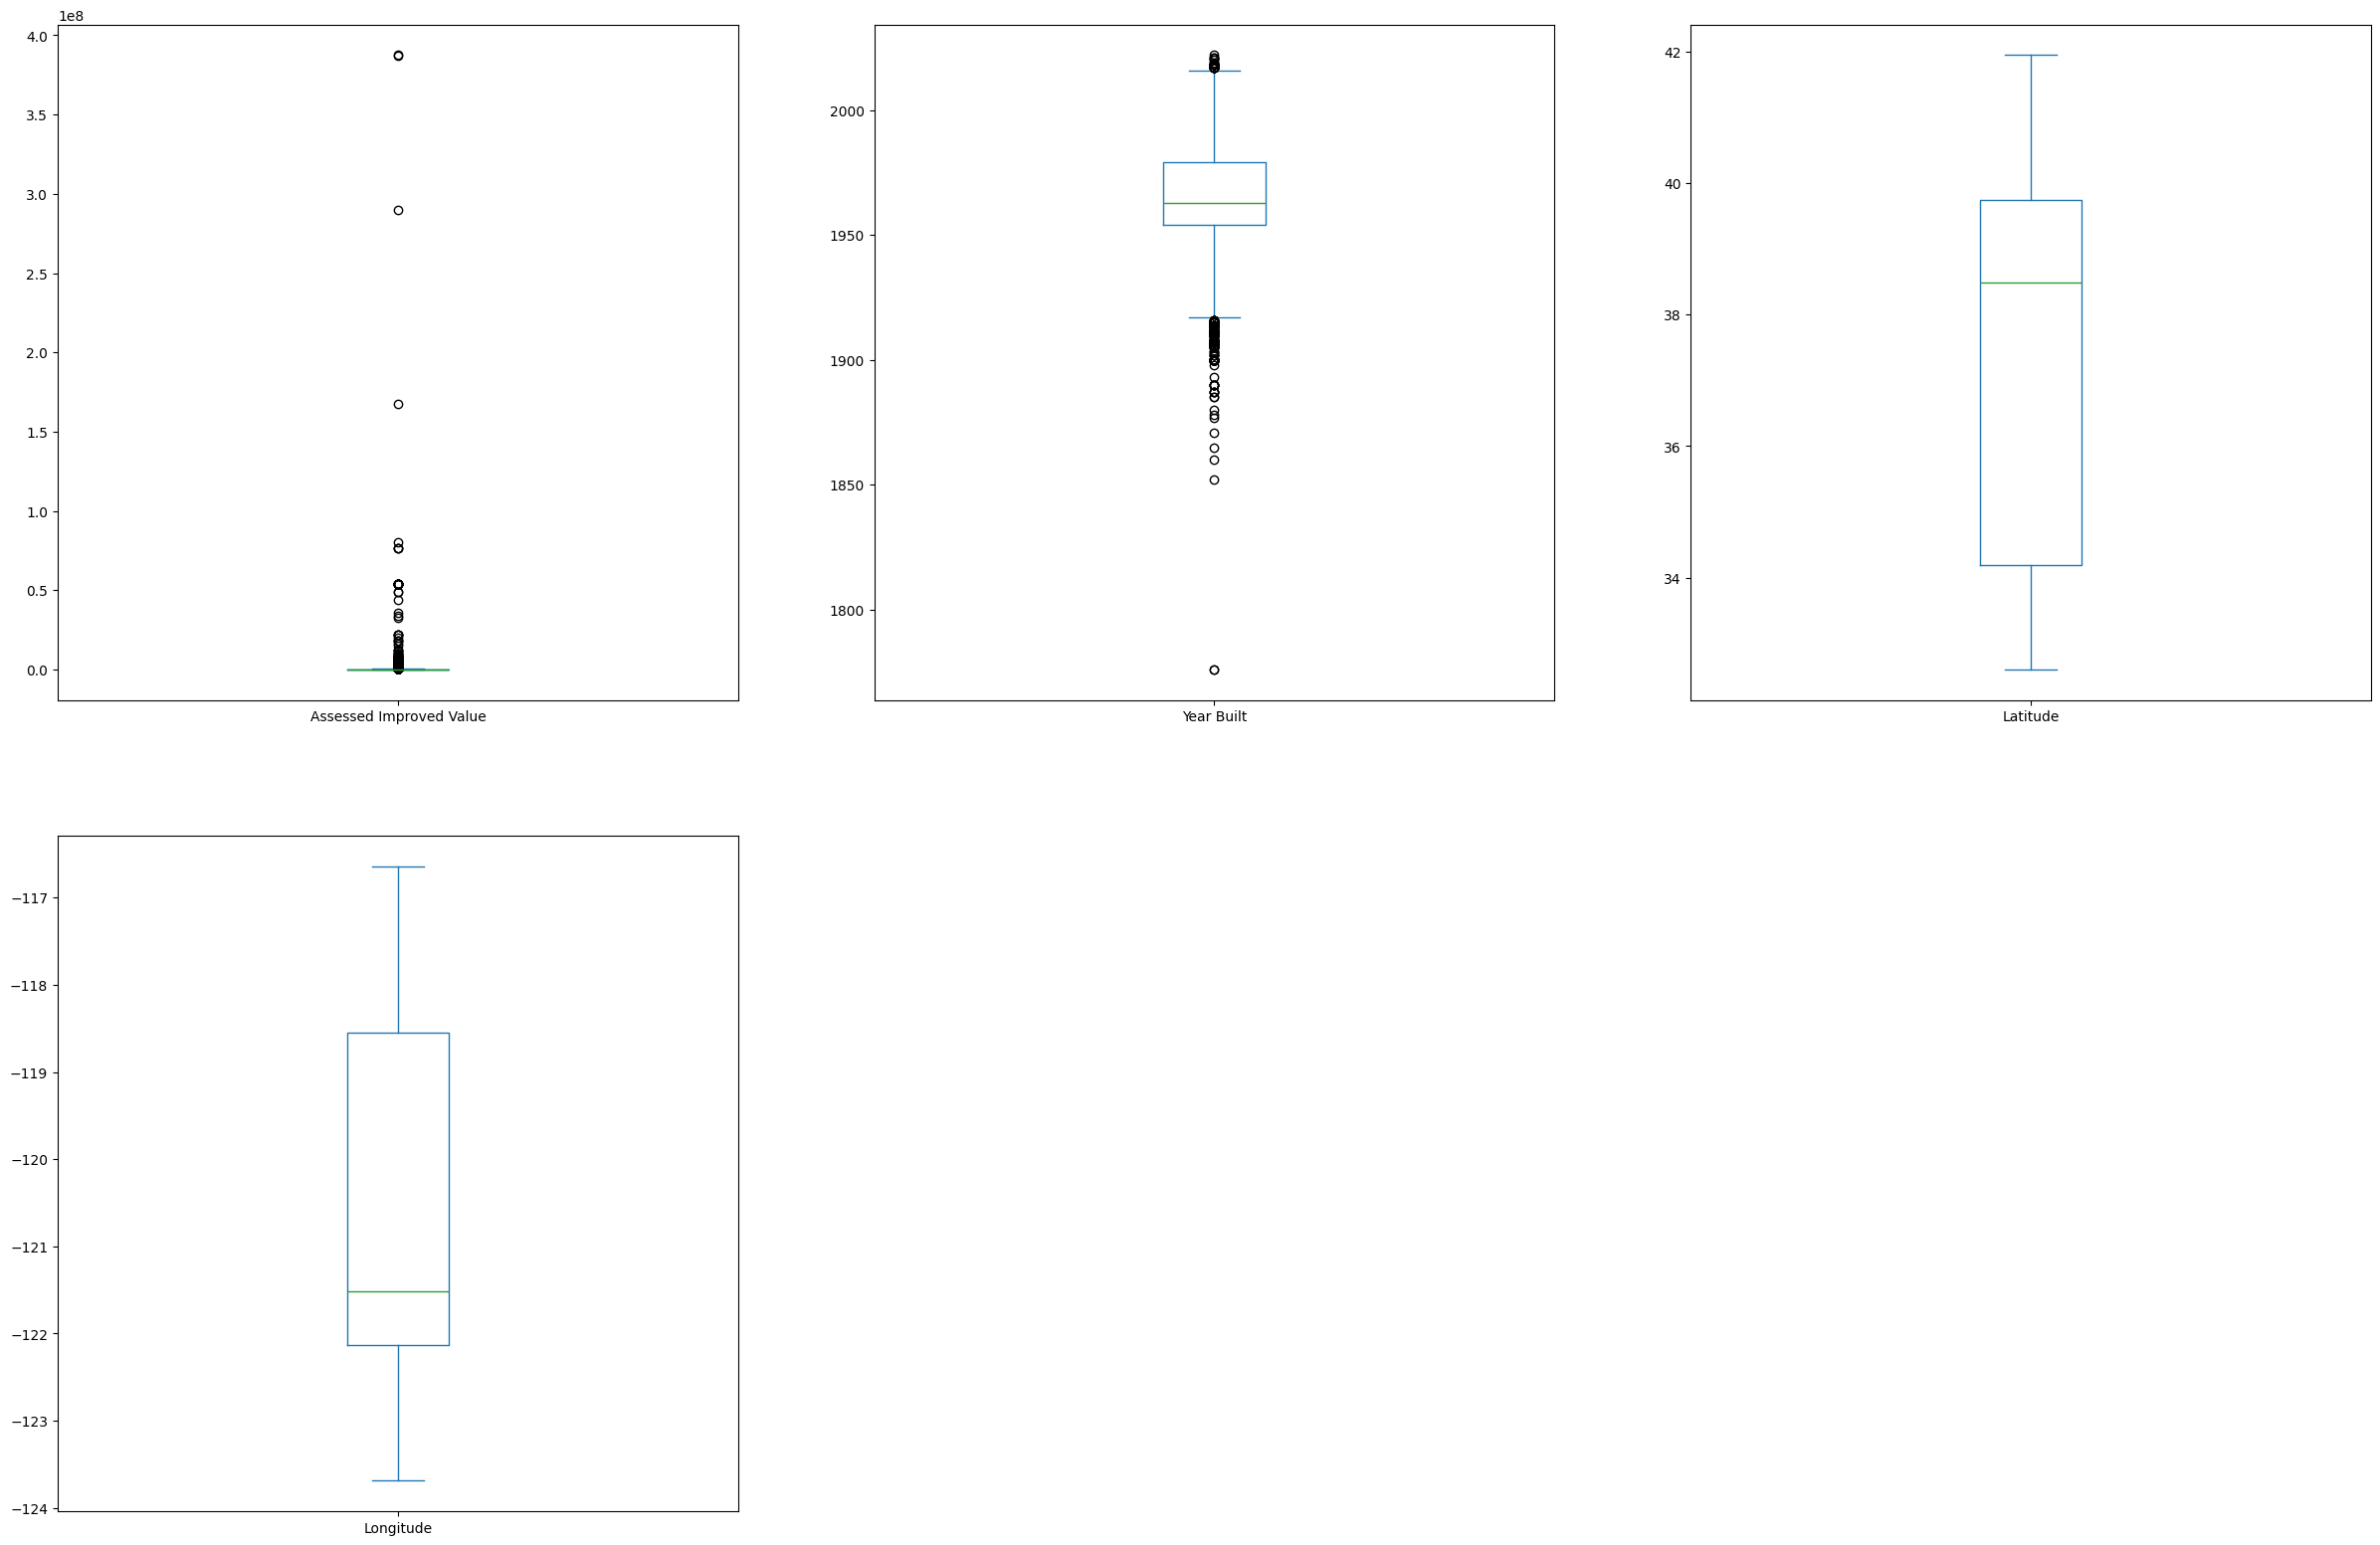

In [71]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)

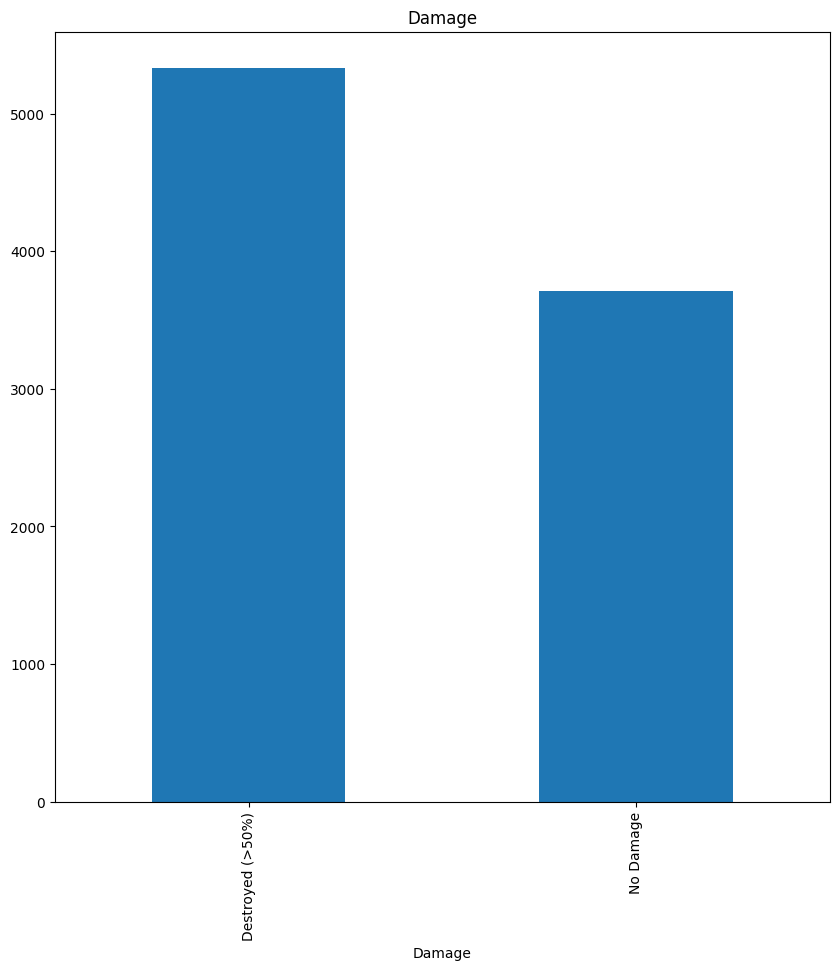

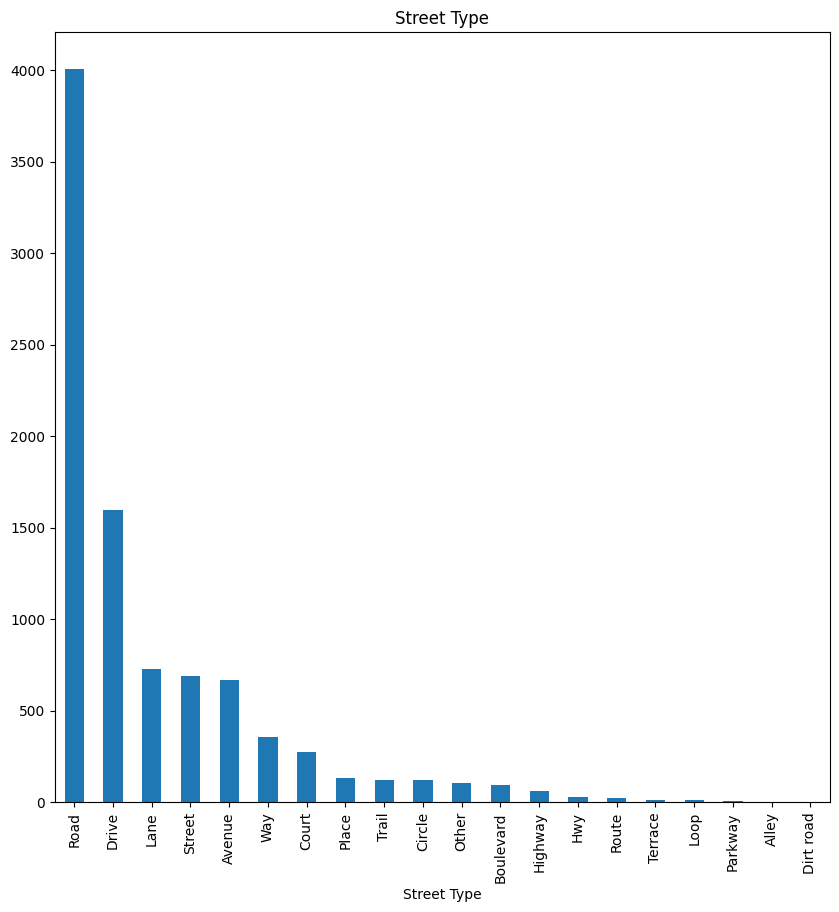

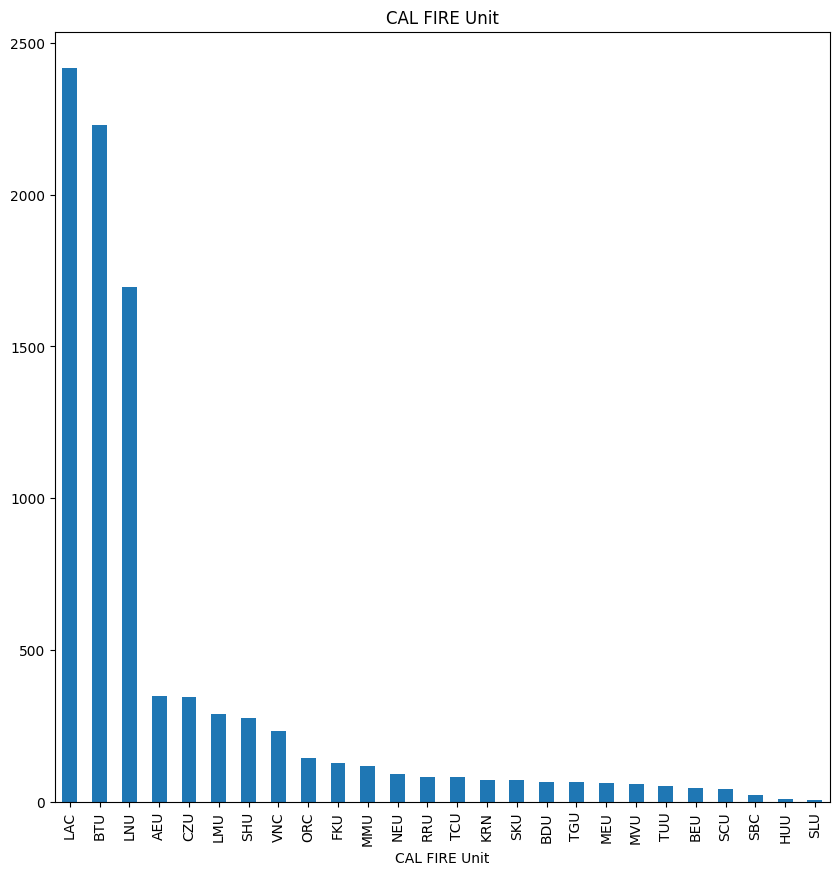

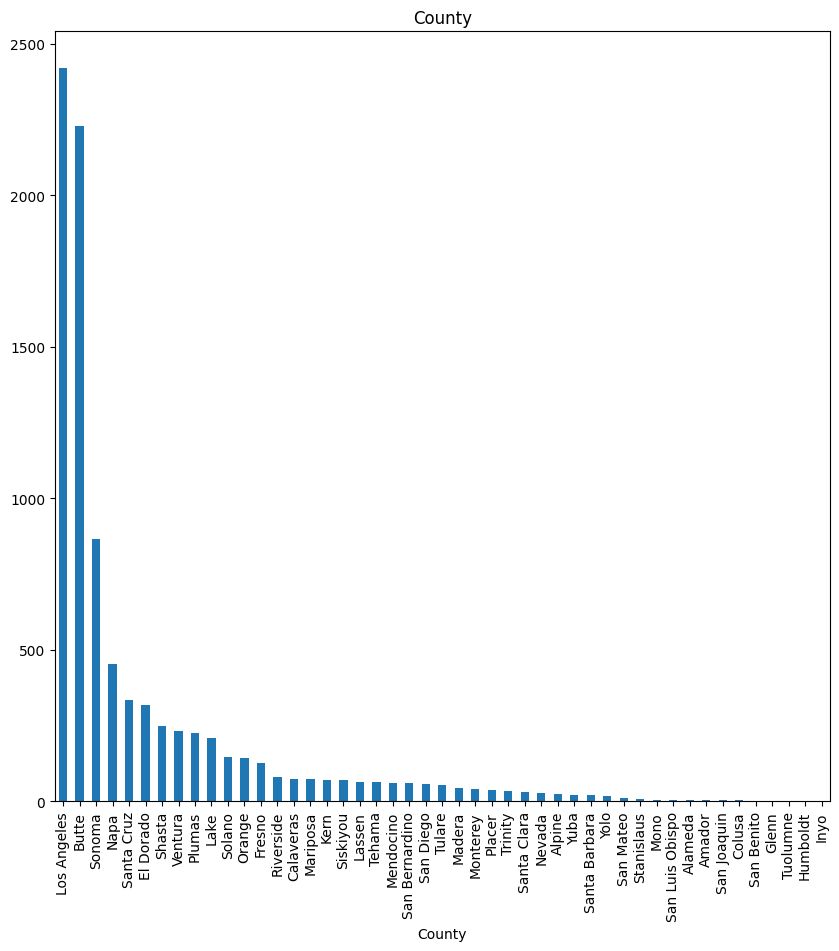

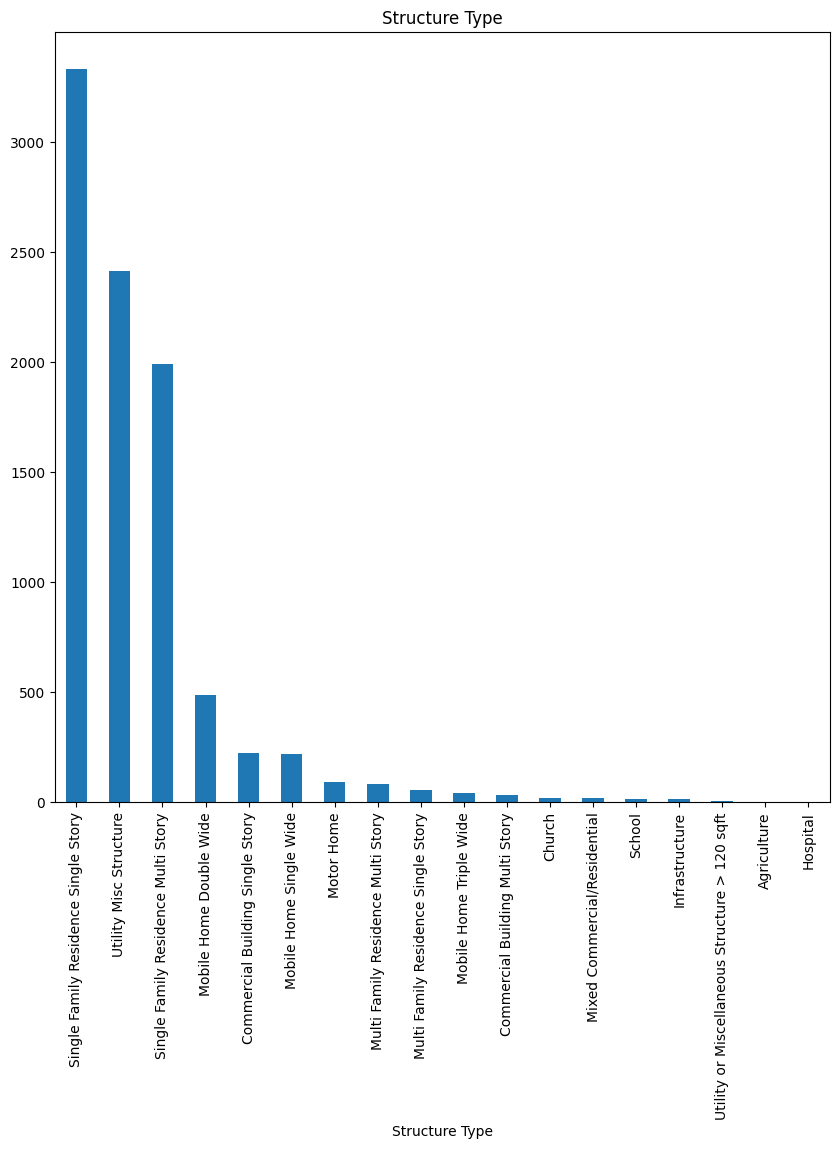

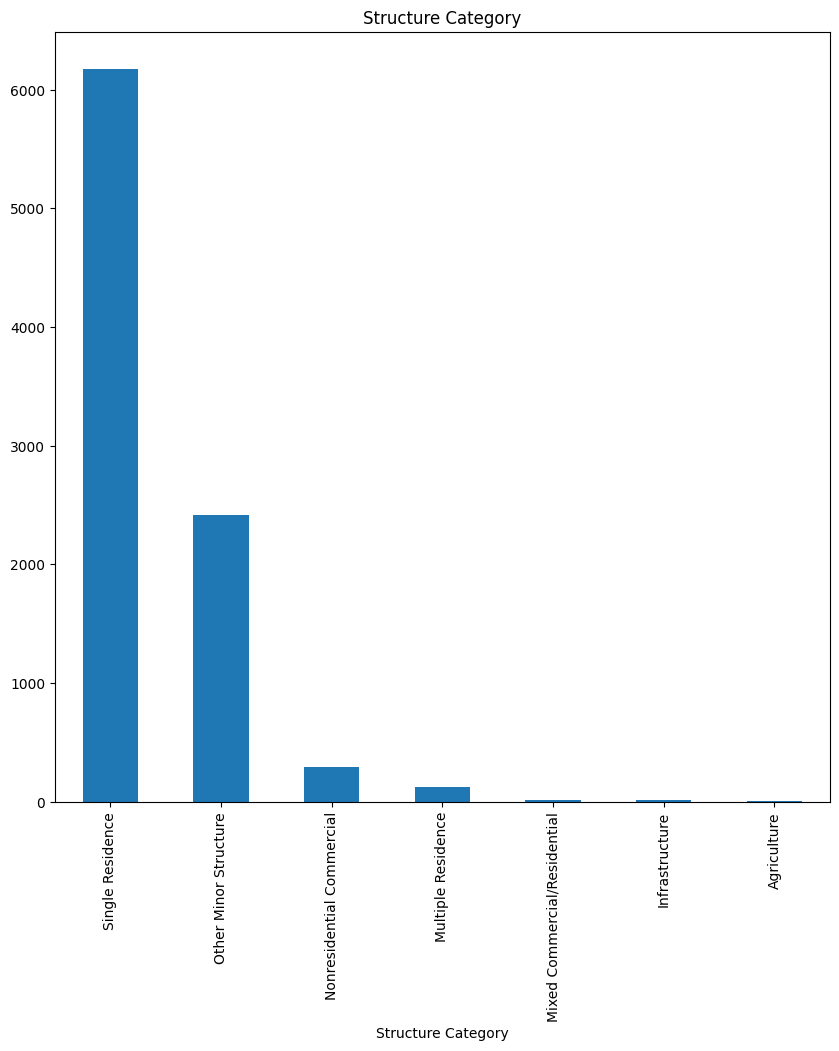

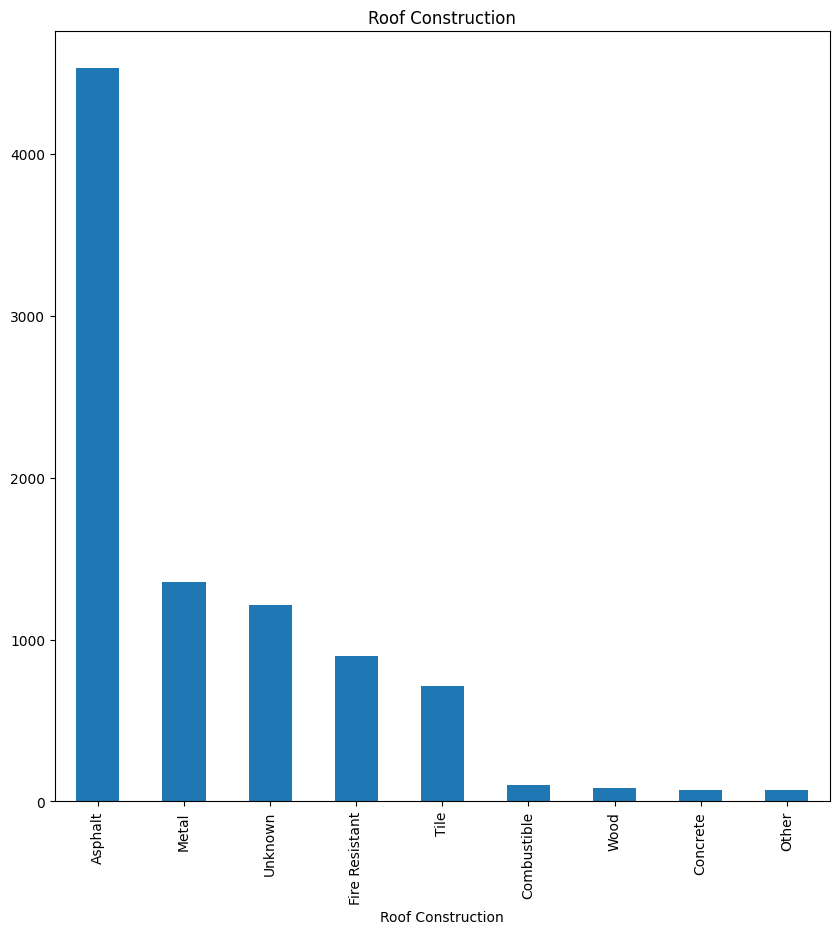

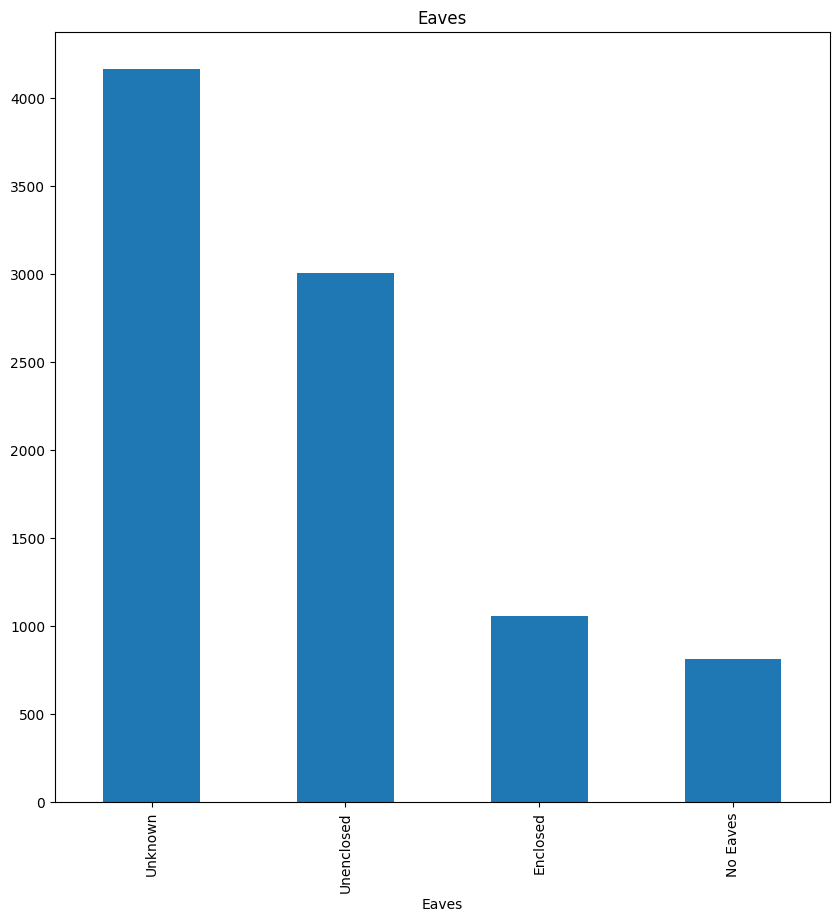

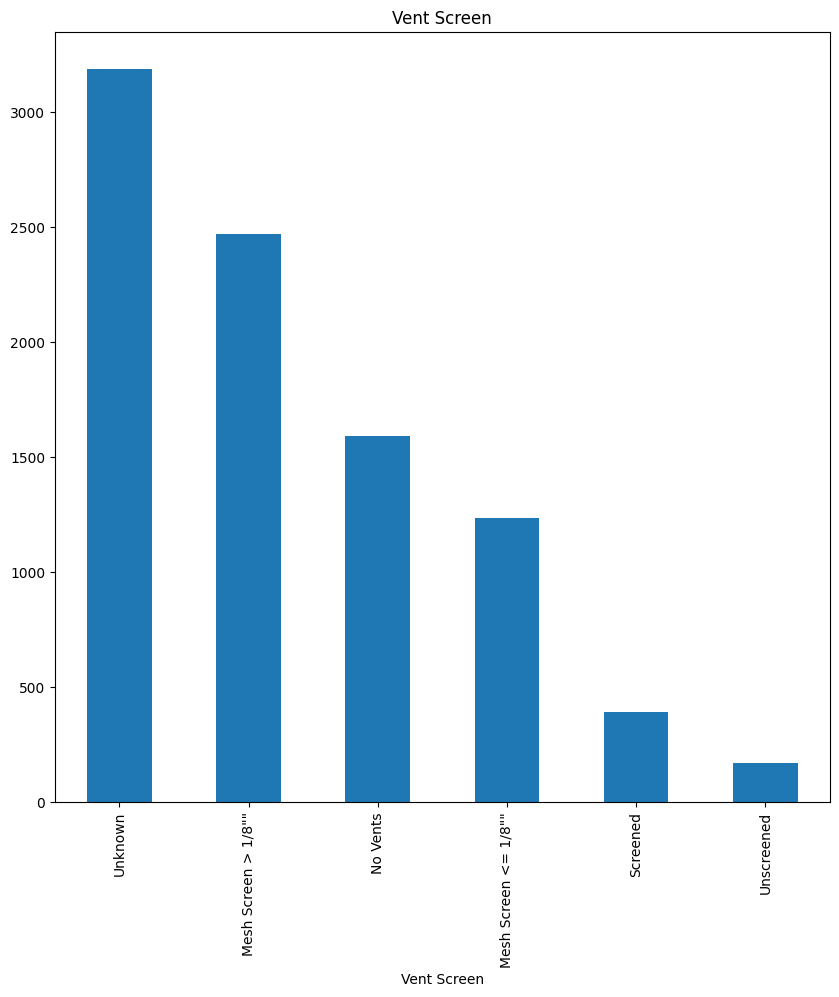

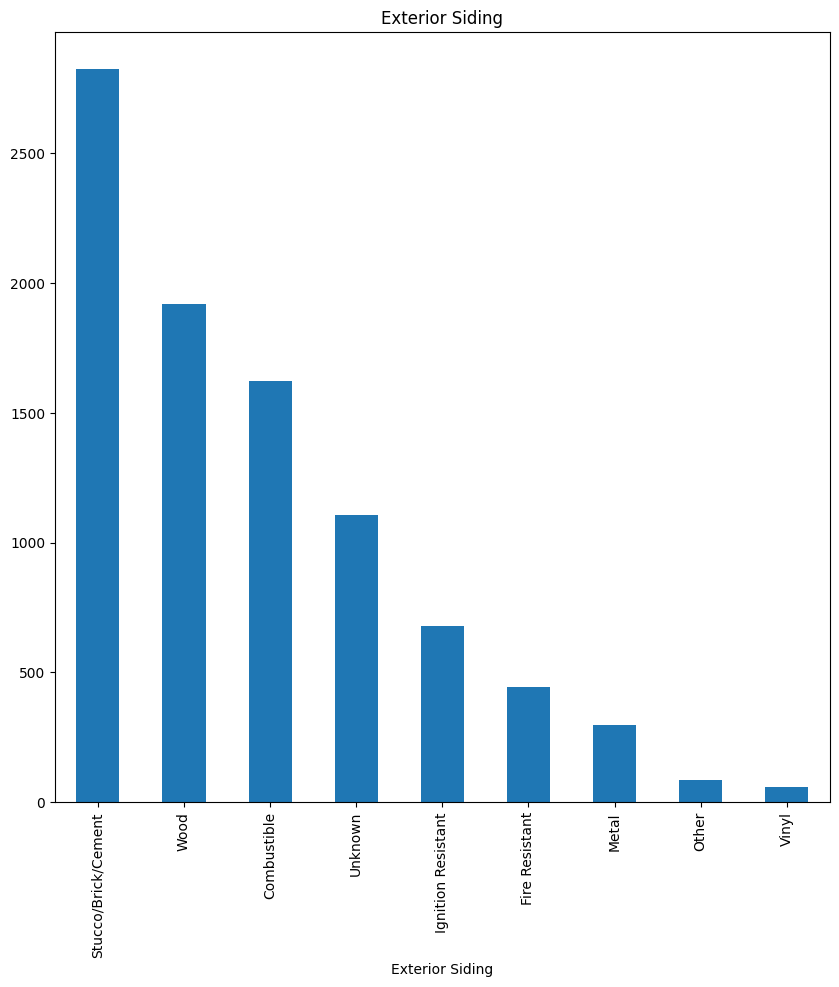

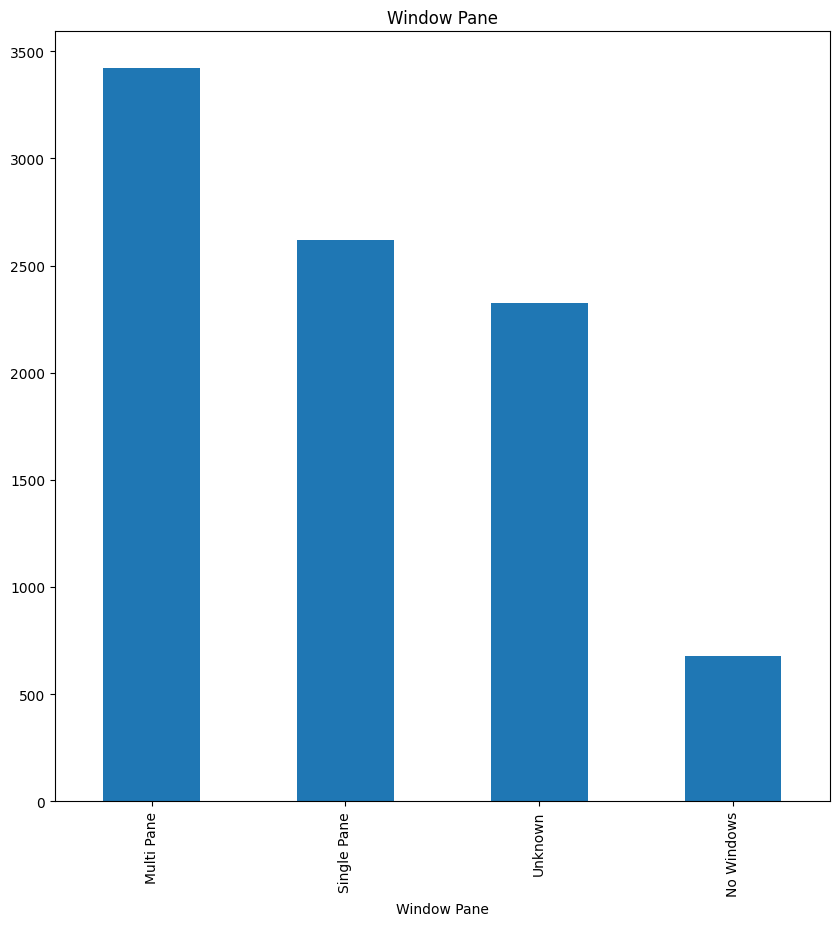

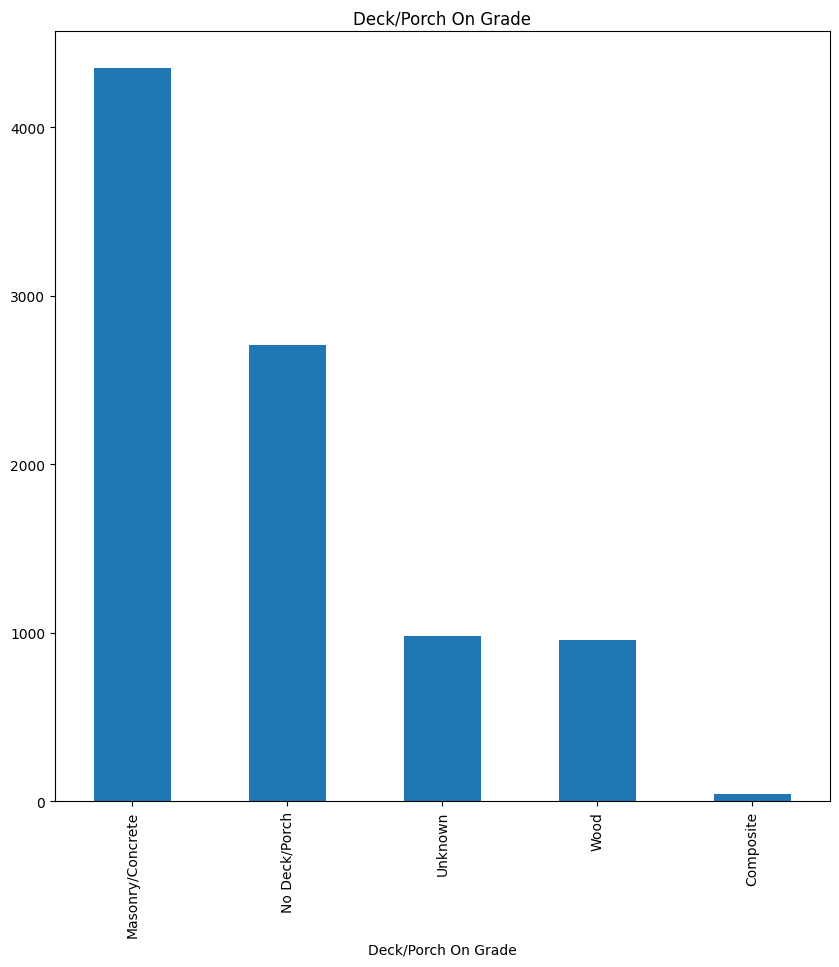

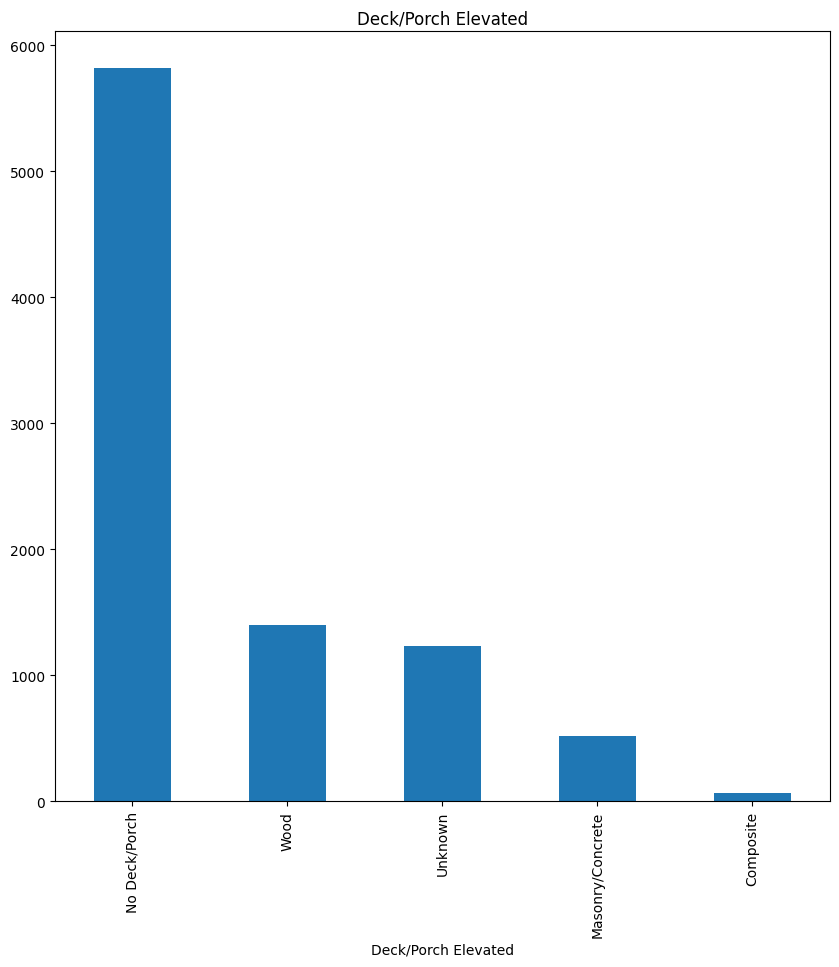

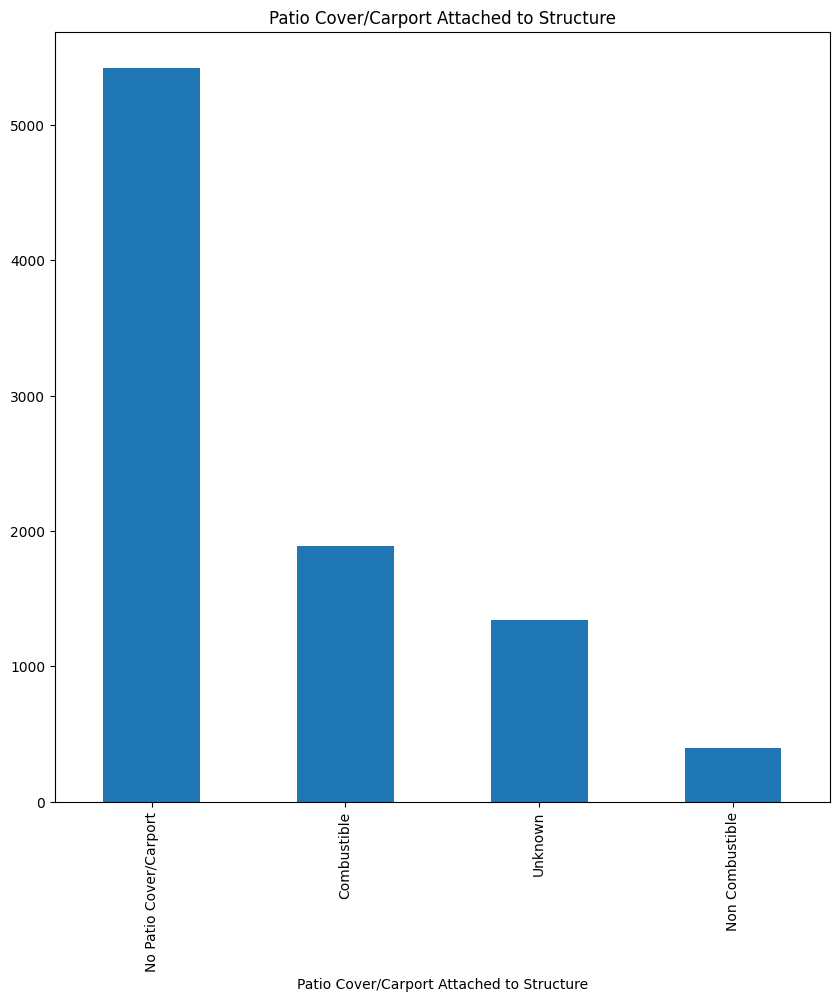

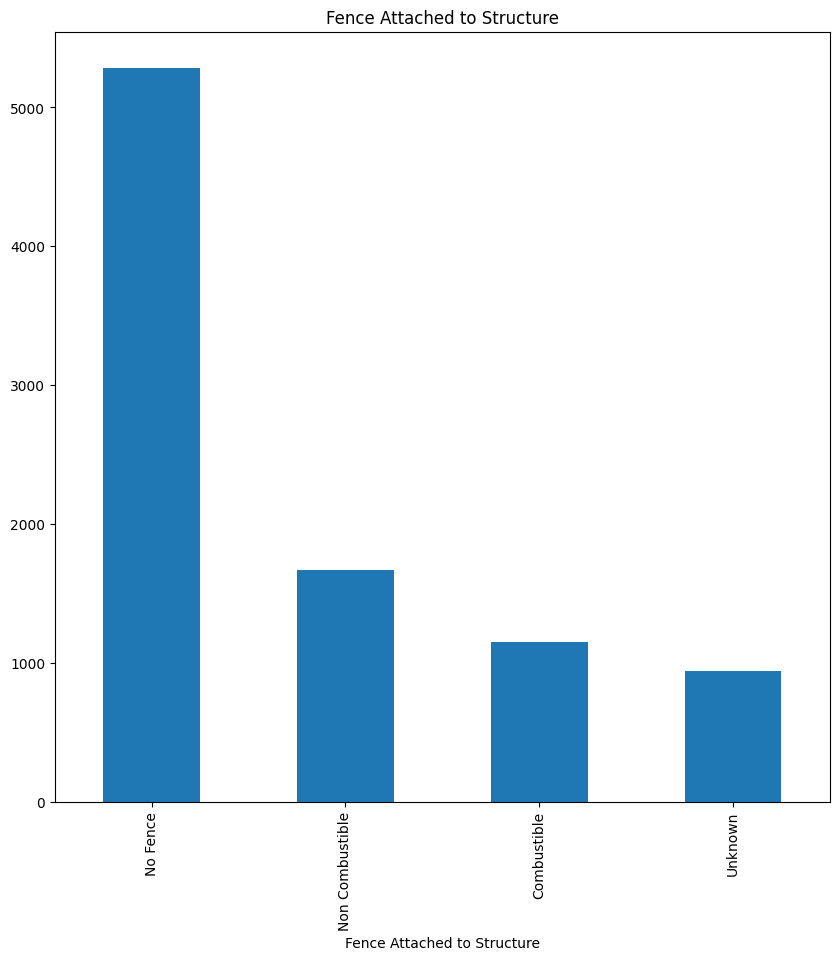

In [72]:
for column in category_columns:
    f = df[column].value_counts(dropna=False).plot(kind='bar', title=column, figsize=(10,10))
    plt.show()

In [73]:
df.to_csv("cal-wildfires-24220492-round2-cleaned.csv", index=False)

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

I am gonna choose few feature pairs to see their relationship

1. County vs Damage - Check the percentage of damaged vs Un damaged buildings by their countys - Location based analysis
2. Structure category vs Damage - Check what type of structures were most affected
3. Year built vs Damage - Check if the age of the building contributed to its destruction
4. Assessed improved value vs Damage - Check if higher valued properties survived the fire
5. CAL FIRE Unit vs Damage - Check which fire department helped the most

Below are few feature pairs that provide data with respect to about materials used for construction and we can check if they offered any help

1. Roof construction vs Damage
2. Exterier siding vs Damage 
3. Vent screen vs Damage
4. Eaves vs Damage
5. Patio/Carport attached to structure vs Damage
6. Fence attached to structure vs Damage

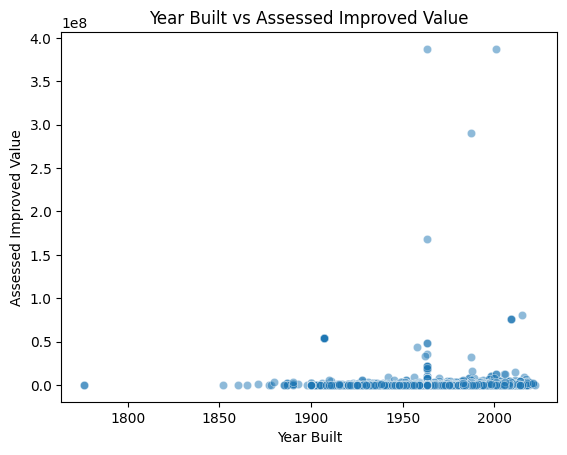

In [74]:
sns.scatterplot(data=df, x="Year Built", y="Assessed Improved Value", alpha=0.5)
plt.title("Year Built vs Assessed Improved Value")
plt.show()

To get a picture of which county was affected the most out of all, We can do a stacked bar plot for County vs Damage.

We can see certain counties where the damage percentage is 100% and some were not affected at all


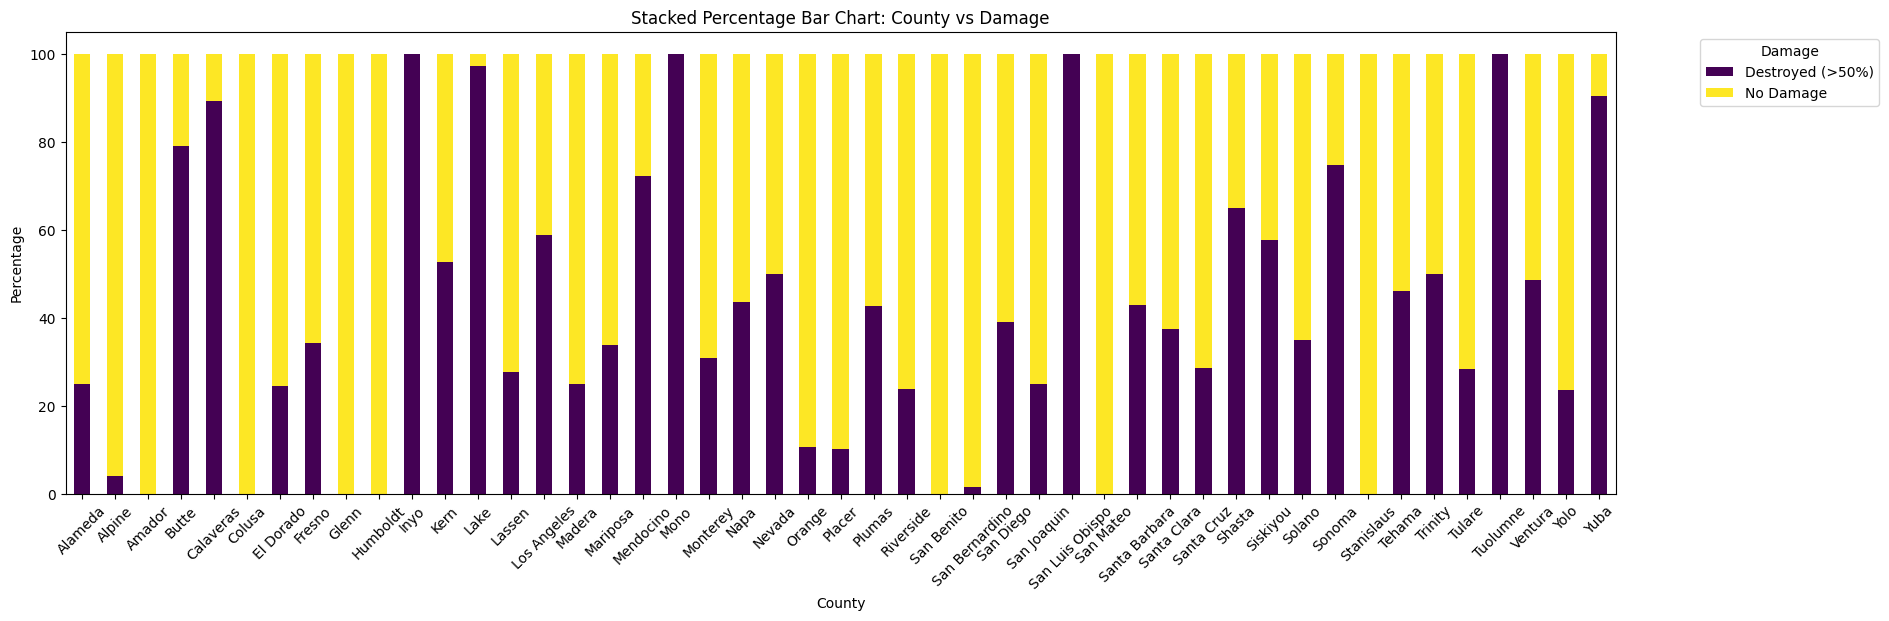

In [75]:
cat1 = "County"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(20, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

We can see what type of structure got affected the most.

We can see Single residence buildings got affected more than multiple residence buildings.

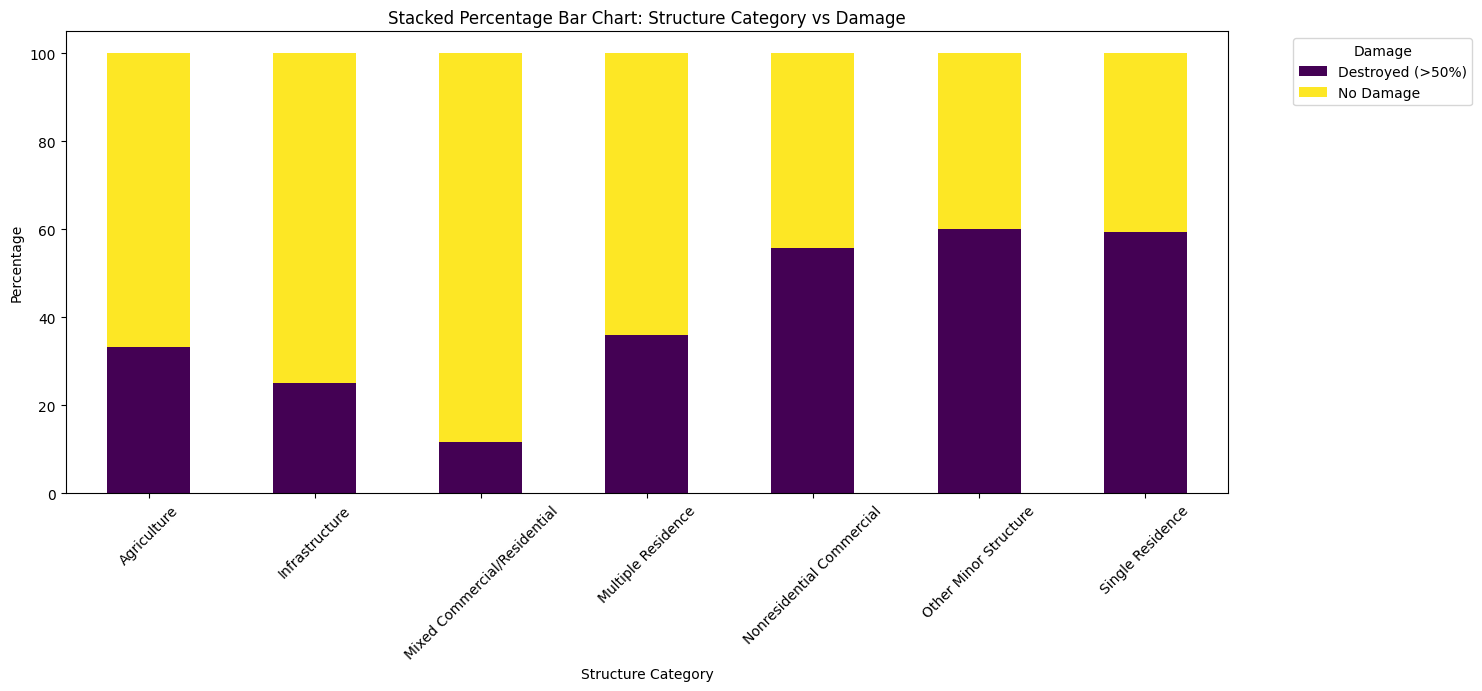

In [76]:
cat1 = "Structure Category"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

We have to check how higher valued buildings, which may seem to have more protection from fire got affected compared to lower valued buildings.

To our surprise, They both are affected almost equally.

C:\Users\luthe\AppData\Local\Temp\ipykernel_6176\2749877641.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_feature, y=cont_feature, palette="viridis")


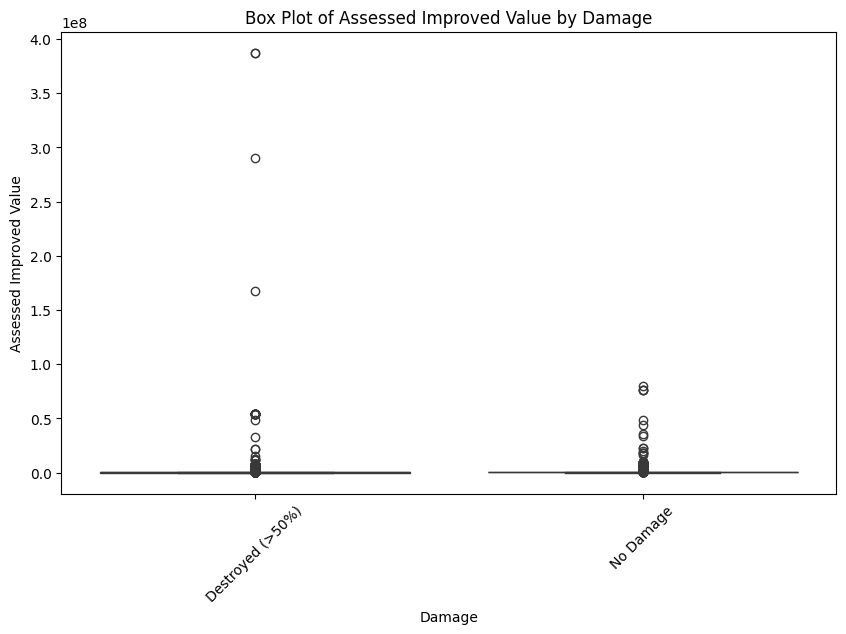

In [77]:
cat_feature = "Damage"
cont_feature = "Assessed Improved Value"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=cat_feature, y=cont_feature, palette="viridis")

plt.title(f"Box Plot of {cont_feature} by {cat_feature}")
plt.xticks(rotation=45)
plt.show()

We have to check if old buildings got affected more.

All of the buildings got affected equally over the years.

C:\Users\luthe\AppData\Local\Temp\ipykernel_6176\759613693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_feature, y=cont_feature, palette="viridis")


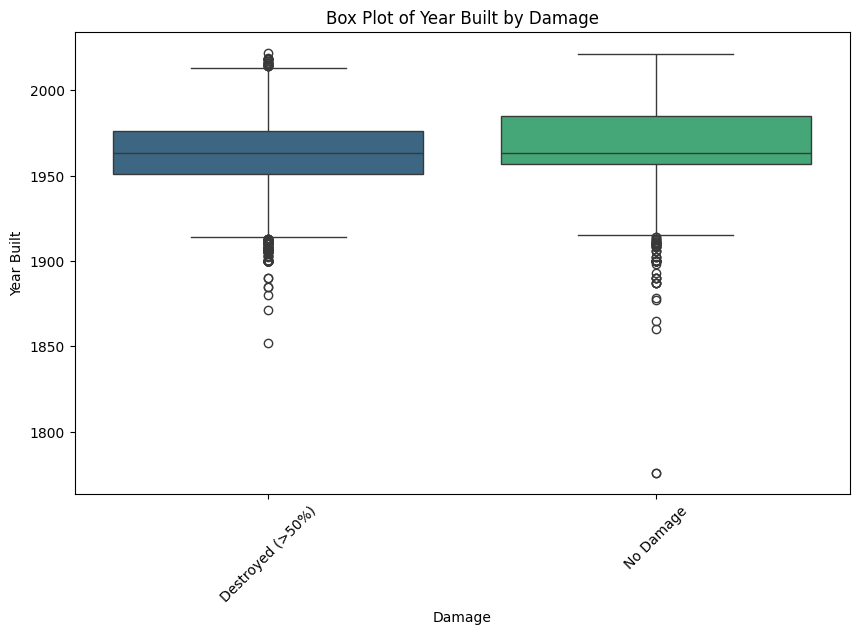

In [78]:
cat_feature = "Damage"
cont_feature = "Year Built"

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=cat_feature, y=cont_feature, palette="viridis")

plt.title(f"Box Plot of {cont_feature} by {cat_feature}")
plt.xticks(rotation=45)
plt.show()

We can see which fire unit got more success in stopping the fires.

We can see that some of the buildings associated with certain units did not get damaged at all.

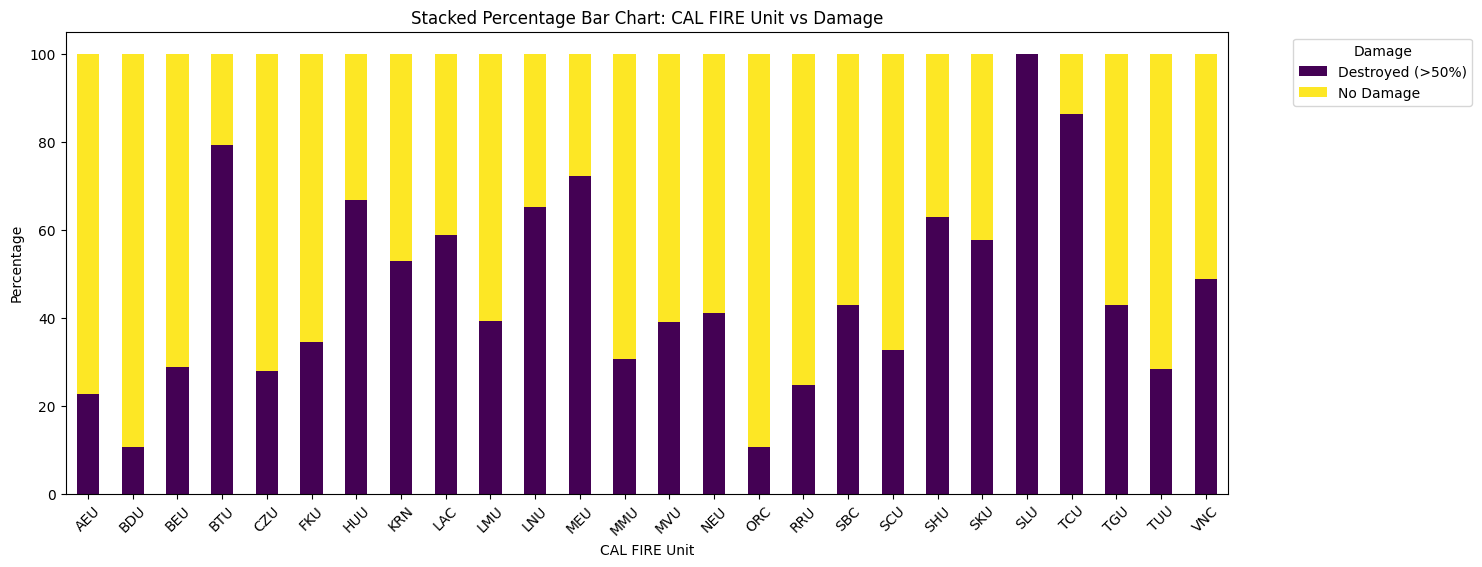

In [79]:
cat1 = "CAL FIRE Unit"
cat2 = "Damage" 

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

# Check if housing features contributed to destruction

The material used for roof construction may have contributed to the outcome
Top 3 material with high fire resistance is as follows

Concrete < Metal < Fire resistance < rest

We can see that roofs made with concrete and metal offered considerable protection
But to our surprise, We can see that the roof with fire resistant material got affect more than some of the other categories.

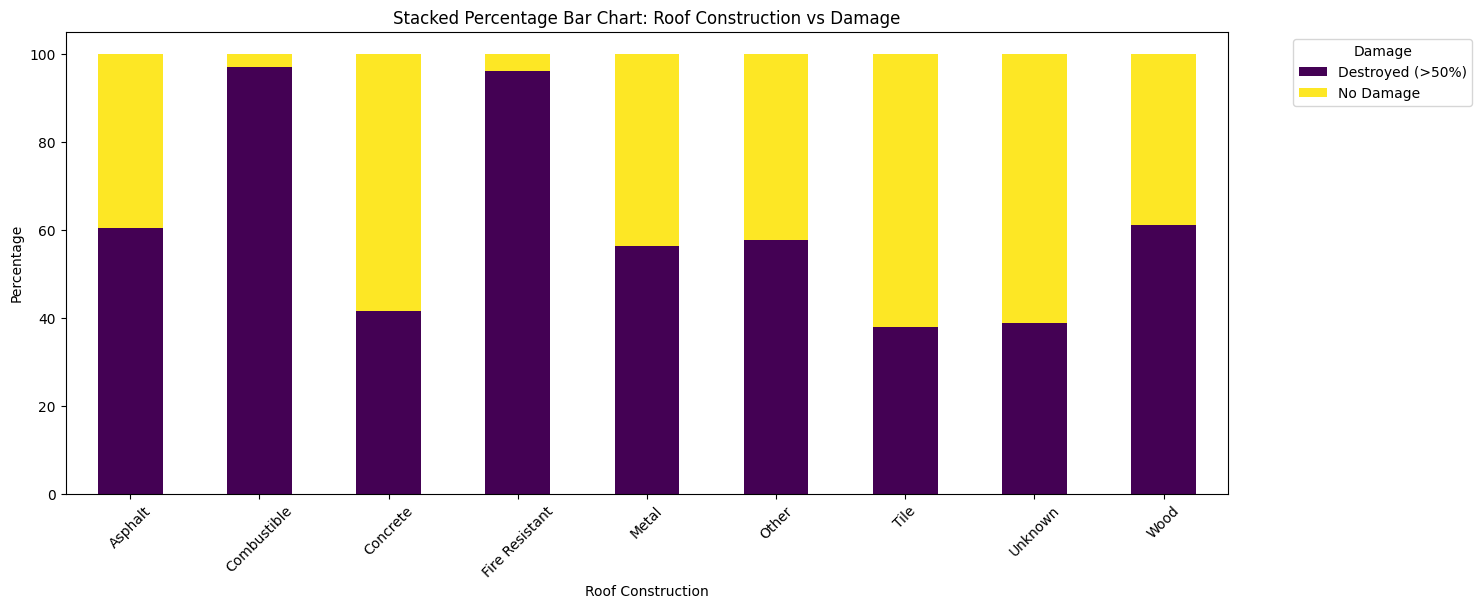

In [80]:
cat1 = "Roof Construction"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

Enclosed eaves generally offer better fire protection than unenclosed eaves. 

We can see that the more percentage buildings with Enclosed Eaves have not been damaged. 

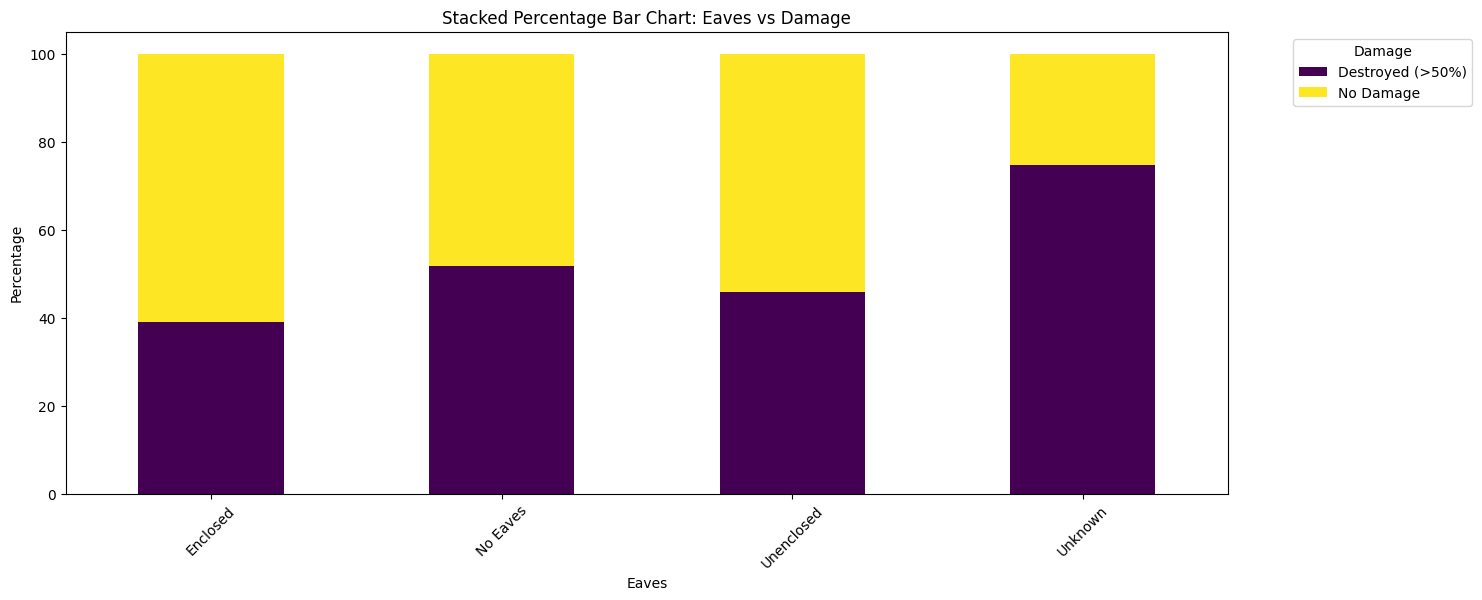

In [81]:
cat1 = "Eaves"
cat2 = "Damage" 

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

A vent screen in housing refers to a protective mesh or perforated covering installed over vents to prevent pests, debris, and embers from entering while still allowing airflow.

Top 3 material for vents that resist fire 

No vents <--- (Mesh screen <= 1 / 8) <--- Screened vents <--- Others

We can see that the percentage of houses with no vents that survived the fire are more. But houses with screened vents got affected more.

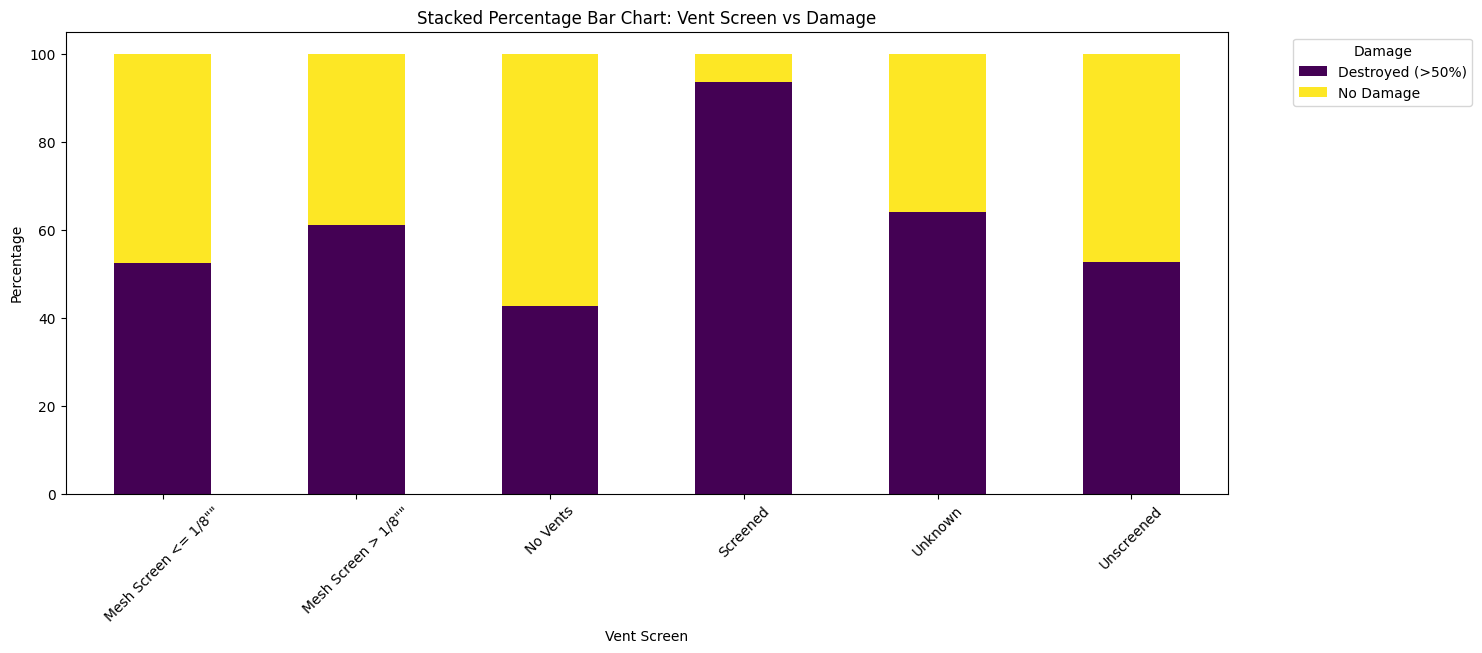

In [82]:
cat1 = "Vent Screen"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

A fence is a barrier or enclosure built to define boundaries, provide security, offer privacy, or enhance aesthetics. Fences can be made of various materials like wood, metal, vinyl, or stone and are commonly used around homes, businesses, and agricultural areas.

Top 3 materials for Patio cover/carport that resist fire

No fence <--- Non combustible <--- Combustible

The plot we got says quite the opposite of what we expected

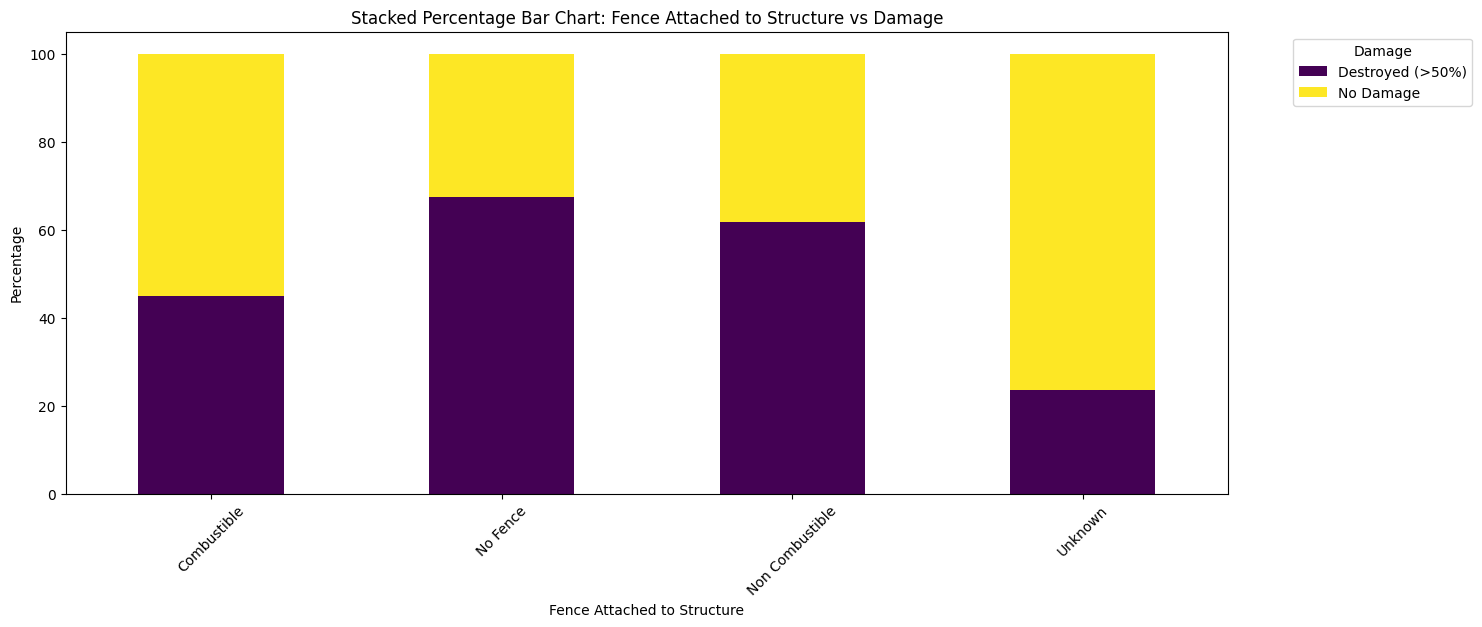

In [83]:
cat1 = "Fence Attached to Structure"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

Exterior siding refers to the outer protective material that covers the walls of a building. It serves both functional and aesthetic purposes

Top 3 materials for exterior siding that resist fire

Stucco/Brick/Cement <--- Metal Siding <--- Fire-Resistant Siding

We can see that Stucco/Brick/Cement and metal siding offered the best protection with comparitively low rates of destruction.
But when it comes to fire resistant siding, its actually the opposite of what we expected

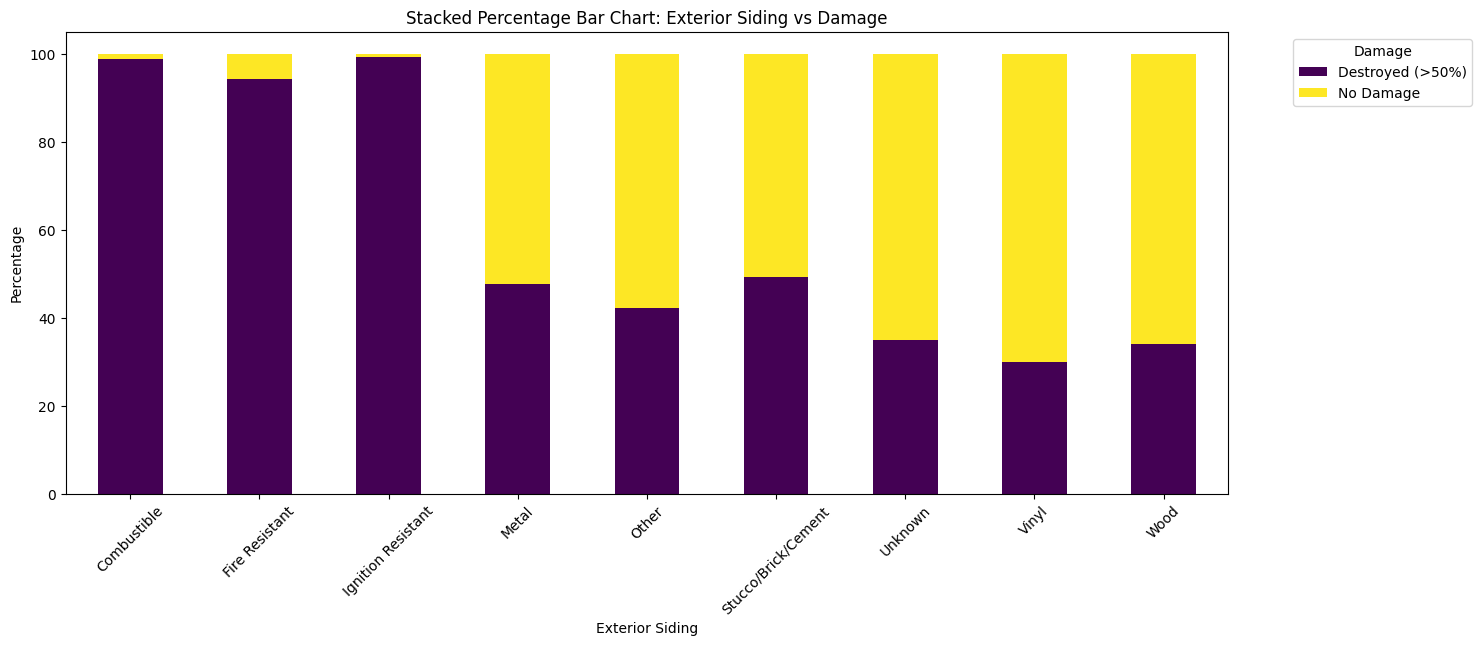

In [84]:
cat1 = "Exterior Siding"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

Both a patio cover and a carport are outdoor structures that provide shade and protection, but they serve different purposes

Top 3 materials for Patio cover/carport that resist fire

No patio cover/carport <--- Non combustible <--- Combustible

We can see that houses with no patio cover/carport was affected more according to our data, which is opposite of what we expected.
Combustible and non combustible materials have equal percentages more or less

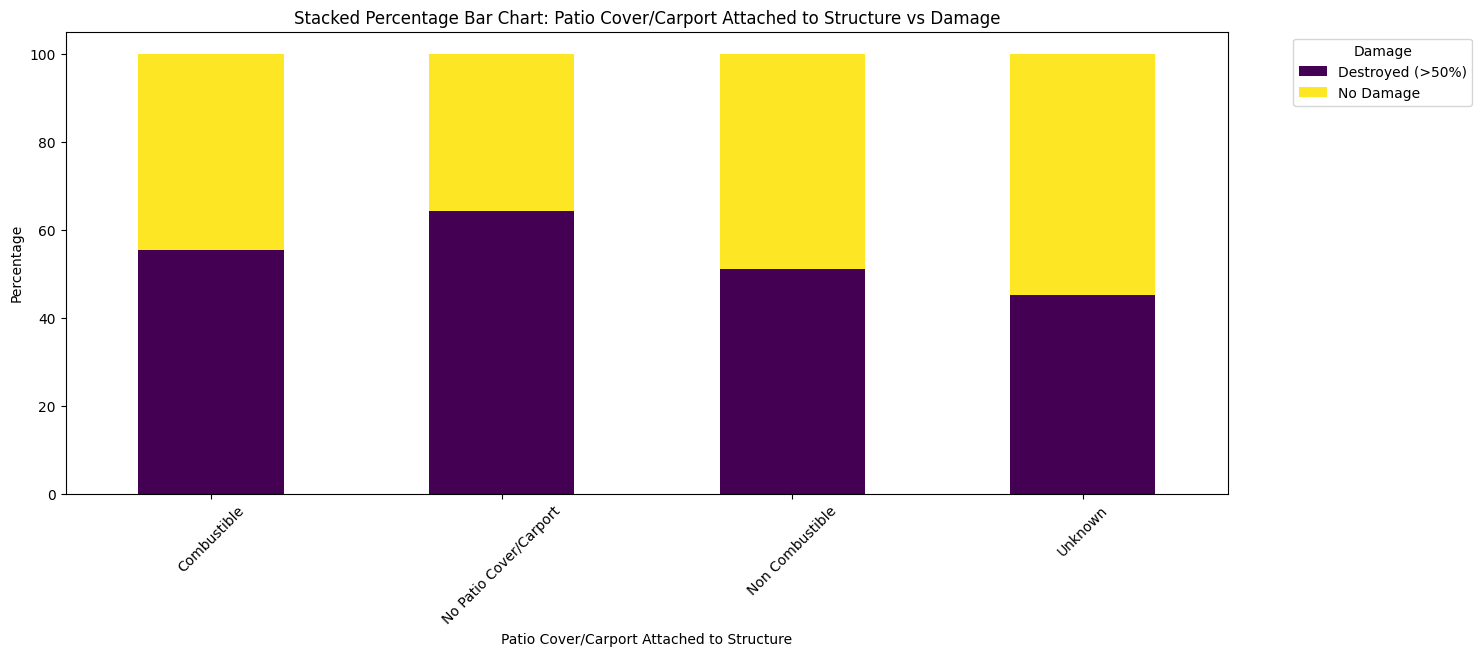

In [85]:
cat1 = "Patio Cover/Carport Attached to Structure"
cat2 = "Damage"

cross_tab = pd.crosstab(df[cat1], df[cat2], normalize="index") * 100

cross_tab.plot(kind="bar", stacked=True, colormap="viridis", figsize=(15, 6))

plt.title(f"Stacked Percentage Bar Chart: {cat1} vs {cat2}")
plt.ylabel("Percentage")
plt.xlabel(cat1)
plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.show()

# (4). Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome.

1. Alloting ranks for the 6 features that define the building structure

In [86]:
def getRank(feature_name):
    total_counts = df[feature_name].value_counts()
    no_damage_counts = df[df["Damage"] == "No Damage"][feature_name].value_counts()
    percentage_no_damage = (no_damage_counts / total_counts * 100).fillna(0)
    sorted_categories = percentage_no_damage.sort_values(ascending=False)
    sorted_categories = sorted_categories[sorted_categories.index != "Unknown"]
    ranked_dict = {category: i+1 for i, category in enumerate(sorted_categories.index)}

    return ranked_dict

In [87]:
roofContructionRank = getRank("Roof Construction")
eavesRank = getRank("Eaves")
ventScreenRank = getRank("Vent Screen")
exteriorSidingRank = getRank("Exterior Siding")
fenceRank = getRank("Fence Attached to Structure")
patioRank = getRank("Patio Cover/Carport Attached to Structure")

ranks = [roofContructionRank, eavesRank, ventScreenRank, exteriorSidingRank, fenceRank, patioRank]

def calculate_score(row):
    score = 0
    score += roofContructionRank.get(row["Roof Construction"], 0)
    score += eavesRank.get(row["Eaves"], 0)
    score += ventScreenRank.get(row["Vent Screen"], 0)
    score += exteriorSidingRank.get(row["Exterior Siding"], 0)
    score += fenceRank.get(row["Fence Attached to Structure"], 0)
    score += patioRank.get(row["Patio Cover/Carport Attached to Structure"], 0)
    return score

df["Fire Resistant Score"] = df.apply(calculate_score, axis=1)

df

,OBJECTID,Damage,Street Type,CAL FIRE Unit,County,Incident Start Date,Structure Type,Structure Category,Roof Construction,Eaves,...,Window Pane,Deck/Porch On Grade,Deck/Porch Elevated,Patio Cover/Carport Attached to Structure,Fence Attached to Structure,Assessed Improved Value,Year Built,Latitude,Longitude,Fire Resistant Score
0,40861,Destroyed (>50%),Road,BTU,Butte,2018-11-08 00:00:00,Single Family Residence Single Story,Single Residence,Asphalt,Unenclosed,...,Multi Pane,Masonry/Concrete,No Deck/Porch,Combustible,No Fence,82695,1956,40,-122,22
1,124543,No Damage,Road,LAC,Los Angeles,2025-01-07 08:02:01,Single Family Residence Single Story,Single Residence,Tile,Unenclosed,...,Multi Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,Non Combustible,403821,1960,34,-119,17
2,129444,Destroyed (>50%),Boulevard,LAC,Los Angeles,2025-01-07 08:02:01,Single Family Residence Multi Story,Single Residence,Asphalt,Unknown,...,Multi Pane,Masonry/Concrete,Masonry/Concrete,Combustible,No Fence,2459718,2016,34,-119,16
3,6617,Destroyed (>50%),Lane,FKU,Fresno,2020-09-04 00:00:00,Single Family Residence Single Story,Single Residence,Metal,Enclosed,...,Single Pane,Wood,Wood,No Patio Cover/Carport,No Fence,30827,1961,37,-119,13
4,84711,Destroyed (>50%),Street,LMU,Plumas,2021-07-13 00:00:00,Commercial Building Single Story,Nonresidential Commercial,Metal,No Eaves,...,Multi Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,88261,1963,40,-121,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20568,No Damage,Other,BEU,Monterey,2020-08-16 00:00:00,Single Family Residence Multi Story,Single Residence,Metal,No Eaves,...,Single Pane,Wood,No Deck/Porch,Combustible,No Fence,34056,1930,36,-122,16
9996,59723,Destroyed (>50%),Road,MEU,Mendocino,2017-10-08 00:00:00,Single Family Residence Single Story,Single Residence,Fire Resistant,Unknown,...,Unknown,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,270000,1963,39,-123,25
9997,90351,Destroyed (>50%),Road,RRU,Riverside,2022-09-05 00:00:00,Utility Misc Structure,Other Minor Structure,Metal,Unenclosed,...,Single Pane,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,No Fence,140743,2005,34,-117,14
9998,57949,Destroyed (>50%),Road,LNU,Sonoma,2017-10-08 00:00:00,Single Family Residence Single Story,Single Residence,Fire Resistant,Unknown,...,Single Pane,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,279593,1963,38,-123,21


2. Checking the distance of the incident to the major wild fire location

In [88]:
wildfire_latlon = (38.5, -120.0)

def calculate_distance(row):
    return geodesic((row["Latitude"], row["Longitude"]), wildfire_latlon).miles

df["Distance to Wildfire Zone"] = df.apply(calculate_distance, axis=1)

df

,OBJECTID,Damage,Street Type,CAL FIRE Unit,County,Incident Start Date,Structure Type,Structure Category,Roof Construction,Eaves,...,Deck/Porch On Grade,Deck/Porch Elevated,Patio Cover/Carport Attached to Structure,Fence Attached to Structure,Assessed Improved Value,Year Built,Latitude,Longitude,Fire Resistant Score,Distance to Wildfire Zone
0,40861,Destroyed (>50%),Road,BTU,Butte,2018-11-08 00:00:00,Single Family Residence Single Story,Single Residence,Asphalt,Unenclosed,...,Masonry/Concrete,No Deck/Porch,Combustible,No Fence,82695,1956,40,-122,22,124
1,124543,No Damage,Road,LAC,Los Angeles,2025-01-07 08:02:01,Single Family Residence Single Story,Single Residence,Tile,Unenclosed,...,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,Non Combustible,403821,1960,34,-119,17,317
2,129444,Destroyed (>50%),Boulevard,LAC,Los Angeles,2025-01-07 08:02:01,Single Family Residence Multi Story,Single Residence,Asphalt,Unknown,...,Masonry/Concrete,Masonry/Concrete,Combustible,No Fence,2459718,2016,34,-119,16,318
3,6617,Destroyed (>50%),Lane,FKU,Fresno,2020-09-04 00:00:00,Single Family Residence Single Story,Single Residence,Metal,Enclosed,...,Wood,Wood,No Patio Cover/Carport,No Fence,30827,1961,37,-119,13,103
4,84711,Destroyed (>50%),Street,LMU,Plumas,2021-07-13 00:00:00,Commercial Building Single Story,Nonresidential Commercial,Metal,No Eaves,...,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,88261,1963,40,-121,18,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20568,No Damage,Other,BEU,Monterey,2020-08-16 00:00:00,Single Family Residence Multi Story,Single Residence,Metal,No Eaves,...,Wood,No Deck/Porch,Combustible,No Fence,34056,1930,36,-122,16,164
9996,59723,Destroyed (>50%),Road,MEU,Mendocino,2017-10-08 00:00:00,Single Family Residence Single Story,Single Residence,Fire Resistant,Unknown,...,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,270000,1963,39,-123,25,183
9997,90351,Destroyed (>50%),Road,RRU,Riverside,2022-09-05 00:00:00,Utility Misc Structure,Other Minor Structure,Metal,Unenclosed,...,No Deck/Porch,No Deck/Porch,No Patio Cover/Carport,No Fence,140743,2005,34,-117,14,377
9998,57949,Destroyed (>50%),Road,LNU,Sonoma,2017-10-08 00:00:00,Single Family Residence Single Story,Single Residence,Fire Resistant,Unknown,...,Masonry/Concrete,No Deck/Porch,No Patio Cover/Carport,No Fence,279593,1963,38,-123,21,149


3. Checking if it is a fire season or not

In [89]:
def fire_season(month):
    if month in [5, 6, 7, 8, 9, 10]:  # Peak fire months
        return 1
    return 0

df["Fire Season"] = df["Incident Start Date"].dt.month.apply(fire_season)

In [90]:
df.to_csv("cal-wildfires-24220492-final-cleaned.csv")